### plot behavioural results

In [1]:
import os, sys
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t, norm
from math import atanh, pow
from numpy import tanh

In [2]:
sns.set_style("whitegrid")
#sns.s{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "### plot compare"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 1,
   "metadata": {},
   "outputs": [],
   "source": [
    "import os, sys\n",
    "import numpy as np\n",
    "import pandas as pd\n",
    "import matplotlib.pyplot as plt\n",
    "import seaborn as sns"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 19,
   "metadata": {},
   "outputs": [],
   "source": [
    "df = pd.read_csv('./local_output/fmri.csv')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 20,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>model_name</th>\n",
       "      <th>model_frequency</th>\n",
       "      <th>exceedance_prob</th>\n",
       "      <th>protected_exceedance_prob</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>io_fixed_freq</td>\n",
       "      <td>0.004631</td>\n",
       "      <td>0.00000</td>\n",
       "      <td>0.000029</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>io_fixed_trans</td>\n",
       "      <td>0.004631</td>\n",
       "      <td>0.00000</td>\n",
       "      <td>0.000029</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>io_jump_freq</td>\n",
       "      <td>0.563353</td>\n",
       "      <td>0.92378</td>\n",
       "      <td>0.923647</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>io_jump_trans</td>\n",
       "      <td>0.339934</td>\n",
       "      <td>0.07622</td>\n",
       "      <td>0.076236</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>random</td>\n",
       "      <td>0.048434</td>\n",
       "      <td>0.00000</td>\n",
       "      <td>0.000029</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>rw</td>\n",
       "      <td>0.039017</td>\n",
       "      <td>0.00000</td>\n",
       "      <td>0.000029</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "       model_name  model_frequency  exceedance_prob  protected_exceedance_prob\n",
       "0   io_fixed_freq         0.004631          0.00000                   0.000029\n",
       "1  io_fixed_trans         0.004631          0.00000                   0.000029\n",
       "2    io_jump_freq         0.563353          0.92378                   0.923647\n",
       "3   io_jump_trans         0.339934          0.07622                   0.076236\n",
       "4          random         0.048434          0.00000                   0.000029\n",
       "5              rw         0.039017          0.00000                   0.000029"
      ]
     },
     "execution_count": 20,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 21,
   "metadata": {},
   "outputs": [],
   "source": [
    "df.columns = df.columns.str.replace('_', ' ')\n",
    "df.columns = df.columns.str.replace('prob', 'probability')\n",
    "df.replace('_', ' ', regex=True, inplace=True)\n",
    "df.replace('io', 'Bayes', regex=True, inplace=True)\n",
    "df.replace('rw', 'Rescorla-Wagner', regex=True, inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 22,
   "metadata": {},
   "outputs": [],
   "source": [
    "dfs = df.sort_values('model frequency', ascending=False)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 23,
   "metadata": {},
   "outputs": [],
   "source": [
    "dfm = pd.melt(dfs, id_vars='model name', var_name='model evidence')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 24,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAUoAAAFJCAYAAAD9vWSrAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAABBv0lEQVR4nO3deXwUVbbA8d8BUVQWAdGnIosOIIQkQAKyr4KoCILwBOOCiArjNqgIbgjouIDjPHFcBkdBEFzADRUUERABEQiGHQQ0Cugohn2T7bw/qrrthCTdCXSqOn2+n08+dFdVV5/uFCe37q06V1QVY4wxeSvhdQDGGON3liiNMSYMS5TGGBOGJUpjjAnDEqUxxoRhidIYY8KwRBklIlJbRDJEZLeI3OV1PCeaiLQUkXVex3GiiMgwEXkjwm3niEi/aMdUlERklYi08ToOv7JEGT33A7NVtayqjhaRcSKiItI1dCMR+ae7vI/7vI+IHBGRPSKyS0SWiUjnkO2ru9ufVLQfJztV/UpVa3sZgzlxVDVBVed4HYdfWaKMnmrAqhzLvgNuCDxxk93/AhtzbPe1qpYBzgBeBN4SkTOiFqmJW17/wY0VliijQERmAW2Bf7ktw1ruqo+AFiJSwX3eCVgO/De3/ajqUWACcDpQM8L37iMi37un/D+ISFrIur4iskZEtovIZyJSzV0ubsv2N7cVu0JE6rnrLheR1e7+tojIfe7yNiKyOWTfddxT0h3uaVyXkHXjROQFEfnE3c83InJhuPfO5bPNEZHHRWSB+71+JCKVRGSi+9rFIlI9ZPtm7rKd7r/NQtbVEJEv3Xg+B87M8V5N3PfZ4bbq20T4/ZcUkQdFZKO773QROT+CeAr62VRE7nJ/17+LyCgRKeGuu1BEZolIlrtuYugfWhHJFJHBIrIc2CsiJ7nLLnHXNxaRJe77/ioiz4a8tov7+93hxlwnx37vE5Hl7md8W0RKR/K9+Z6q2k8UfoA5QL+Q5+OAx4ExwAB32TtAb2Ae0Mdd1geY5z4uCdwOHATOcpdVBxQ4KZf3PB3YBdR2n58DJLiPuwIbgDrAScDDwAJ33aVAOk4LVtxtznHX/QK0dB9XABq6j9sAm93Hpdx9PwicDLQDdofEMQ7IAhq77z0ReCvce+fxnW4ALgTKA6txWumXuPsdD4x1t60IbAeud9f1dp9Xctd/DTwLnAK0cuN9w113nhvv5TiNiQ7u88q5/W5zxDgIWAHUdj9PMlApgngi/mzu9grMdvdb1d22n7vuL27MpwCVgbnA/4W8NhPIAM4HTg1ZdknId3O9+7gM0MR9XAvY6+67FE730gbg5JB9LALOdeNaA/T3+v/iifixFmXRGw/c4P6Fbw18kMs2TURkB3AAeAa4TlV/i3D/R4F6InKqqv6iqoHT//7Ak6q6RlUPA08A9d1W5SGgLHARIO42v7ivOwTUFZFyqrpdVZfmFi/Of6inVPWgqs4CPsZJBgHvq+oi970nAvVD9p/Xe+dmrKpuVNWdwHRgo6rOdPc7GWjgbncFsF5VJ6jqYVV9E1gLXCkiVYFGwCOq+oeqzsVp7QdcB0xT1WmqelRVPweW4CTOcPoBD6vqOnUsU9Ws/OIpxGcLeFpVt6nqT8D/4X7fqrpBVT93P9tWnD8IrXO8drSqblLV/bl8hkPAX0TkTFXdo6oL3eXXAJ+4+z6Ec2yeCjQLee1oVf1ZVbfhfKf1I/jOfM8SZRFT1Xk4f+UfAj7O40BdqKpn4LTgpgItI9z3XpyDuT/wi3uqe5G7uhrwnHvKtAPYhtPiOc9NbP8CXgB+E5ExIlLOfd3VOAniR/dUtWkub30usEmdroKAH3FaZgGh3Qv7cBIrYd47N7+GPN6fy/MyITH9mOO1gZjOBba731fouoBqQM/Ad+V+Xy1wWujhnM+xfc7h4gmI9LMFbMqxr3MBRORsEXlLnK6SXcAb5OhayPHanG7GaT2udU/5A4OJ2T6D+/veRAS/51hnidIbbwD34rQu86Sqe4ABwPUikrM1kddrPlPVDjj/qdcCr7irNgG3qeoZIT+nquoC93WjVTUFqIvzn2SQu3yxqnYFzsJp/b6Ty9v+DJwf6CNzVQW2RBhzru99nH7GSXihAjH9AlQQkdNzrAvYBEzI8V2drqpPRfC+m3BOnwsST2Gdn2NfP7uPn8A5NU9U1XI4LWTJ8do8y4ap6npV7Y3zO38amOJ+V9k+g4iIG8PxfIaYYInSG6Nx+nnmhtvQPYX5DzA03LZuS6Kre1D/AezBORUHeBl4QEQS3G3Li0hP93EjEblYRErh9EEdAI6KyMkikiYi5d1TrV0h+wv1DU7r4X4RKeUOfFwJvBVBzLm+d7jXRWAaUEtErnUHK67BScQfq+qPOKfSw93P2ILsp8Bv4JyiX+oOzpQWZ/CqSgTv+x/gMRGpKY4kEamUXzzH8RkHiUgFd7DobuBtd3lZnN/9ThE5jwL+4RGR60Skstti3OEuPorzR/IKEWnv/r7uxTnOFhzHZ4gJlig94PYrfaGqkRYD/T/gchFJCrNdCeAenL/823D6pQa47/k+TuvgLfd0bCVwmfu6cjgtz+04p1ZZwCh33fVApvua/kBwFD3k8xzESTSXAb/jXNJ0g6qujeCz5ffeheb2C3bG+c+chTPw0FlVf3c3uRa4GOd7epSQ1r2qbsIZ/HoQ2IrTShxEZP9fnsVJKDNw/rC8ijNgEi6ewvgQZyAsA/jEfS+A4UBDYKe7/L0C7rcTsEpE9gDPAb1Udb+qrsNpnT6P83u+ErjS/f0XaxL5/1VjjF+IiAI1VXWD17HEA2tRGmNMGFFLlCLymjgXEa/MY72IyGgR2eBeoNowWrEYY8zxiGaLchxOX0deLsO526QmcCvwUhRjMaZYUVWx0+6iE7VE6V7Euy2fTboC492LchcCZ4hIJNepGWNMkfKyj/I8sl/0upnsF64aY4wvxETlEBG5Fef0nNNPPz3loosuCvMKY4wpmPT09N9VtXJu67xMlFvIfmdBFfK4wl9Vx+AUkyA1NVWXLFkS/eiMMXFFRHLeYhrk5an3VJziECIiTYCdYYohGGOMJ6LWohSRN3FKcZ0pTt3CR3FKM6GqL+Pc0nU5TpmmfcBN0YrFGGOOR9QSpXtTfX7rFafWojHG+FpMDOaYyBw6dIjNmzdz4MABr0MxxrdKly5NlSpVKFWqVMSvsURZjGzevJmyZctSvXp1nApYxphQqkpWVhabN2+mRo0aEb/O7vUuRg4cOEClSpUsSRqTBxGhUqVKBT7rskRZzFiSNCZ/hfk/YonSmByqV6/O77/nXyYykm0icfnll7Njx45jlg8bNoxnnnnmuPdvTgzrozTGQ9OmTfM6BBMBa1GamJeZmclFF11Enz59qFWrFmlpacycOZPmzZtTs2ZNFi1aBMC2bdu46qqrSEpKokmTJixfvhyArKwsOnbsSEJCAv369SO0mPUbb7xB48aNqV+/PrfddhtHjhzJN5YZM2bQtGlTGjZsSM+ePdmzZw+ffvopPXv2DG4zZ84cOnd25usKbZn+/e9/p1atWrRo0YJ169YFt9+4cSOdOnUiJSWFli1bsnatUzi+T58+3HXXXTRr1owLLriAKVOmBF/z9NNPk5iYSHJyMkOGDMl3PyYC6oM5cwvyk5KSoiZ3q1ev9joET/zwww9asmRJXb58uR45ckQbNmyoN910kx49elQ/+OAD7dq1q6qq3nHHHTps2DBVVf3iiy80OTlZVVXvvPNOHT58uKqqfvzxxwro1q1bdfXq1dq5c2c9ePCgqqoOGDBAX3/9dVVVrVatmm7dujVbHFu3btWWLVvqnj17VFX1qaee0uHDh+uhQ4f0/PPPDy7v37+/TpgwIdt+lixZovXq1dO9e/fqzp079cILL9RRo0apqmq7du30u+++U1XVhQsXatu2bVVV9cYbb9QePXrokSNHdNWqVXrhhReqquq0adO0adOmunfvXlVVzcrKync/8Si3/yvAEs0j79iptykWatSoQWJiIgAJCQm0b98eESExMZHMzEwA5s2bx7vvvgtAu3btyMrKYteuXcydO5f33nOmlbniiiuoUKECAF988QXp6ek0atQIgP3793PWWWflGcPChQtZvXo1zZs3B+DgwYM0bdqUk046iU6dOvHRRx/Ro0cPPvnkE0aOHJnttV999RXdunXjtNNOA6BLly4A7NmzhwULFmRrkf7xxx/Bx1dddRUlSpSgbt26/PqrM7vtzJkzuemmm4L7qlixYtj9mPxZojTFwimnnBJ8XKJEieDzEiVKcPjw4ULtU1W58cYbefLJJyPevkOHDrz55pvHrOvVqxf/+te/qFixIqmpqZQtWzaifR49epQzzjiDjIyMXNeHfm7NZ/6rcPsx+YvLRPnTiMQCv6Z3hXIF2n7+nfML/B4mulq2bMnEiRN55JFHmDNnDmeeeSblypWjVatWTJo0iYcffpjp06ezfft2ANq3b0/Xrl0ZOHAgZ511Ftu2bWP37t1Uq5Zzem5HkyZNuP3229mwYQN/+ctf2Lt3L1u2bKFWrVq0bt2avn378sorr9CrV69jXtuqVSv69OnDAw88wOHDh/noo4+47bbbKFeuHDVq1GDy5Mn07NkTVWX58uUkJyfn+Tk7dOjAiBEjSEtL47TTTmPbtm1UrFixwPsxf7LBHBM3hg0bRnp6OklJSQwZMoTXX38dgEcffZS5c+eSkJDAe++9R9WqVQGoW7cujz/+OB07diQpKYkOHTrwyy95F7iqXLky48aNo3fv3iQlJdG0adPggEnJkiXp3Lkz06dPDw7khGrYsCHXXHMNycnJXHbZZcHTfYCJEyfy6quvkpycTEJCAh9++GG+n7NTp0506dKF1NRU6tevH7zMqKD7MX+KuelqT0Q9yuLaolyzZg116tQp8vc1Jtbk9n9FRNJVNTW37a1FaYwxYViiNMaYMCxRGmNMGJYojTEmDEuUxhgThiVKY4wJwxKl8a3jKXc2efJk6tSpQ9u2baMVnokjcXlnTrxIGTT+hO4vfdQNJ3R/0fTqq6/yyiuv0KJFi2zLDx8+zEkn2WFvCsZalOaE8Uu5sxEjRjBv3jxuvvlmBg0axLhx4+jSpQvt2rWjffv27N27l759+9K4cWMaNGgQvENl//799OrVizp16tCtWzcuvvhiAjc3lClTJrj/KVOm0KdPHwC2bt3K1VdfTaNGjWjUqBHz5zs3GgwbNoy+ffvSpk0bLrjgAkaPHh18/fjx40lKSiI5OZnrr7+e3bt3U6NGDQ4dOgTArl27sj033rNEaU6oDRs2cO+997J27VrWrl3LpEmTmDdvHs888wxPPPEE4Nwy2KBBA5YvX84TTzzBDTc4LdXhw4fTokULVq1aRbdu3fjpp58A5y6Kt99+m/nz55ORkUHJkiWZOHFinjEMHTqU1NRUJk6cyKhRowBYunQpU6ZM4csvv+Tvf/877dq1Y9GiRcyePZtBgwaxd+9eXnrpJU477TTWrFnD8OHDSU9PD/t57777bgYOHMjixYt599136devX3Dd2rVr+eyzz1i0aBHDhw/n0KFDrFq1iscff5xZs2axbNkynnvuOcqWLUubNm345JNPAHjrrbfo3r17gWYJNNFl5yDmhPJDubPcdOjQgYoVKwJOcd2pU6cG74E+cOAAP/30E3PnzuWuu+4CICkpiaSkpLD7nTlzJqtXrw4+37VrF3v27Al+hlNOOYVTTjmFs846i19//ZVZs2bRs2dPzjzzTIBgTP369WPkyJFcddVVjB07lldeeaVAn89ElyVKc0L5odxZbk4//fRs+3v33XepXbt2xK8PnZAqdAa/o0ePsnDhQkqXLn3Ma0K/i5IlS+b7+Zs3b05mZiZz5szhyJEj1KtXL+LYTPTZqbcpcoFyZ0Cu5c6AY8qdTZkyhd9++w1w+jh//PHHQr//pZdeyvPPPx/sA/32228Bsr3/ypUrg32nAGeffTZr1qzh6NGjvP/++8HlHTt25Pnnnw8+D1fvsV27dkyePJmsrKzgZwm44YYbuPbaa7npppsK/dlMdFiiNEUu2uXOwnnkkUc4dOgQSUlJJCQk8MgjjwAwYMAA9uzZQ506dRg6dCgpKSnB1zz11FN07tyZZs2acc455wSXjx49miVLlpCUlETdunV5+eWX833vhIQEHnroIVq3bk1ycjL33HNPcF1aWhrbt2+nd+/ehf5sJjqszFqErMxa/GnTpg3PPPMMqam5Vt464aZMmcKHH37IhAkTiuT94llBy6xZH6UxPnDnnXcyffp0m77Wp6KaKEWkE/AcUBL4j6o+lWN9VeB14Ax3myGqakeK8YU5c+YU2XuF9nMa/4laH6WIlAReAC4D6gK9RaRujs0eBt5R1QZAL+DFaMVjjDGFFc3BnMbABlX9XlUPAm8BXXNso0Cg86888HMU4zHGmEKJ5qn3ecCmkOebgYtzbDMMmCEidwKnA5dEMR5jjCkUry8P6g2MU9UqwOXABBE5JiYRuVVElojIkq1btxZ5kMaY+BbNRLkFOD/keRV3WaibgXcAVPVroDRwZs4dqeoYVU1V1dTKlStHKVxTXIQWsIglkZSVCzVs2LDgbZihfv75Z3r06AE4A1KB6XGnTp3KU08546kffPBBtlsvTf6ieeq9GKgpIjVwEmQv4Noc2/wEtAfGiUgdnERpTcYTpDDXi+an6tAVJ3R/8agoyryde+65TJky5ZjlXbp0oUuXLoCTKDt37kzdujnHV01uotaiVNXDwB3AZ8AanNHtVSIyQkS6uJvdC9wiIsuAN4E+GmtXwJtsciuHtnjxYpKSkjhw4AB79+4lISGBlStXcuTIEe677z7q1atHUlJS8BKZ9PR0WrduTUpKCpdeemnwLpyNGzfSqVMnUlJSaNmyJWvXrgXghx9+oGnTpiQmJvLwww8HY9mzZw/t27enYcOGJCYmBsupZWZmUqdOHW655RYSEhLo2LEj+/fvB5zqR5dccgnJyck0bNiQjRs3AjBq1CgaNWpEUlISjz76aK6fvUyZMgwcODBYDCTQTdSmTRv+9re/kZqaynPPPccXX3xBgwYNSExMpG/fvvzxxx/BfYwcOZLExEQaN27Mhg0bAPjoo4+4+OKLadCgAZdccgm//vprcPtly5bRtGlTatasGSykkZmZmeu94uPGjeOOO+5gwYIFTJ06lUGDBlG/fn02btxIw4YNg9utX78+23MT5T5KVZ2mqrVU9UJV/bu7bKiqTnUfr1bV5qqarKr1VXVGNOMx0ZVXObRGjRrRpUsXHn74Ye6//36uu+466tWrx5gxY8jMzCQjI4Ply5eTlpbGoUOHuPPOO5kyZQrp6en07duXhx56CIBbb72V559/nvT0dJ555hn++te/Ak6pswEDBrBixYpstxeWLl2a999/n6VLlzJ79mzuvffe4P3d69ev5/bbb2fVqlWcccYZwWpGaWlp3H777SxbtowFCxZwzjnnMGPGDNavX8+iRYvIyMggPT2duXPnHvP59+7dS2pqKqtWraJ169YMHz48uO7gwYMsWbKE22+/nT59+vD222+zYsUKDh8+zEsvvRTcrnz58qxYsYI77riDv/3tbwC0aNGChQsX8u2339KrVy9GjhwZ3H758uXMmjWLr7/+mhEjRvDzz+EvHGnWrBldunRh1KhRZGRkcOGFF1K+fPngfepjx461+81zsDtzzAmTXzm0oUOH0qhRI0qXLh0sYjtz5kz69+8fPBWtWLEiK1euZOXKlXTo0AGAI0eOcM4557Bnzx4WLFhAz549g+8XaInNnz8/mOiuv/56Bg8eDDhVgh588EHmzp1LiRIl2LJlS7A1VqNGDerXrw9ASkoKmZmZ7N69my1bttCtWzeAYEWgGTNmMGPGDBo0aAA4LdX169fTqlWrbJ+/RIkSXHPNNQBcd911dO/ePbgusHzdunXUqFGDWrVqAXDjjTfywgsvBJNi4D7v3r17M3DgQAA2b97MNddcwy+//MLBgwepUaNGcL9du3bl1FNP5dRTT6Vt27YsWrQo+LkKol+/fowdO5Znn32Wt99+O1hk2TgsUZoTJr9yaFlZWezZs4dDhw5x4MCBbGXPcu4jISGBr7/+OtvyXbt2ccYZZ+RZnSe0DFrAxIkT2bp1K+np6ZQqVYrq1asHS6TlLIEWOPXOK6YHHniA2267Lc9twsWU1+fN7zWBx3feeSf33HMPXbp0Yc6cOQwbNizX7XN7Hqmrr76a4cOH065dO1JSUqhUqVKh9lNceX15kClG8iuHdtttt/HYY4+RlpYWbPF16NCBf//738E6jdu2baN27dps3bo1mCgDVcHLlStHjRo1mDx5MuAkr2XLlgFOLce33noLIFvl8507d3LWWWdRqlQpZs+eHbY0W9myZalSpQoffPAB4LRY9+3bx6WXXsprr70WLMi7ZcuW4GcMdfTo0eAgyqRJk46Zrwegdu3aZGZmBvsfJ0yYQOvWrYPr33777eC/TZs2DX6O8847DyBYaSngww8/5MCBA2RlZTFnzpxgaz6csmXLsnv37uDz0qVLc+mllzJgwAA77c6FJUpzwuRVDm38+PGUKlWKa6+9liFDhrB48WJmzZpFv379qFq1anD+mEmTJnHyySczZcoUBg8eTHJyMvXr12fBggWAkwRfffVVkpOTSUhICA7OPPfcc7zwwgskJiayZcufV6ClpaWxZMkSEhMTGT9+PBdddFHYzzBhwgRGjx5NUlISzZo147///S8dO3bk2muvDQ4Y9ejRI1uSCTj99NNZtGgR9erVY9asWQwdOvSYbUqXLs3YsWPp2bMniYmJlChRgv79+wfXb9++naSkJJ577jn++c9/As5lQD179iQlJSVYGT0gKSmJtm3b0qRJEx555BHOPffcCH5T0KtXL0aNGkWDBg2CA1ZpaWmUKFGCjh07RrSPeGJl1iJkZdZMOGXKlAm2OmPRM888w86dO3nssce8DiXqrMyaMabAunXrxsaNG5k1a5bXofiSJUpjTpBYbk2GTm9hjmV9lMYYE4YlSmOMCcMSpTHGhGGJ0hhjwrBEaXzliSeeKPRr58yZE7zmsiAKWt6sKPk5tvy0adOGglzGFyjYkZtmzZoB2Yt9LFmyhLvuugso/O+9IGzUuxhr/nzzE7q/E3Vt6JEjRyhZsmSu65544gkefPDBQu13zpw5lClTJvgfy0RXUZSMA3JNgqmpqcFphIvi924tSnPCZGZmctFFF5GWlkadOnXo0aMH+/btA5yW0eDBg2nYsCGTJ0/mzTffJDExkXr16gVvaRwyZAj79++nfv36pKWlAbmXbQP49NNPadiwIcnJybRv357MzExefvll/vnPf1K/fn2++uortm7dytVXX02jRo1o1KgR8+c7iT4rK4uOHTuSkJBAv379yOumixkzZtC0aVMaNmxIz5492bNnDz/++CM1a9bk999/5+jRo7Rs2ZIZM5yiV08//TSJiYkkJyczZMgQIO/ScIWJ7aqrriIlJYWEhATGjBkTXF6mTBkeeughkpOTadKkSbDwx6+//kq3bt1ITk4mOTk5mHDy+k5DVa9enfvvv/+Ykm99+vShf//+XHzxxdx///1kZGTQpEkTkpKS6NatG9u3bw/uY8KECdSvX5969eoFi2wsWrSIpk2b0qBBA5o1a8a6deuC22/atIk2bdpQs2bNbJWXcivEHChInNvvvUaNGhw6dAhwagSEPi8sS5TmhFq3bh1//etfWbNmDeXKlePFF/+cWLNSpUosXbqUVq1aMXjwYGbNmkVGRgaLFy/mgw8+4KmnnuLUU08lIyODiRMn5lm2bevWrdxyyy28++67LFu2jMmTJ1O9enX69+/PwIEDycjIoGXLltx9990MHDiQxYsX8+6779KvXz8Ahg8fTosWLVi1ahXdunXjp59+OuZz/P777zz++OPMnDmTpUuXkpqayrPPPku1atUYPHgwAwYM4B//+Ad169alY8eOTJ8+nQ8//JBvvvmGZcuWcf/99wP5l4YraGyvvfYa6enpLFmyhNGjR5OVlQU45d2aNGnCsmXLaNWqVbAu5V133UXr1q1ZtmwZS5cuJSEhIc/vNDe5lXwDp5rRggULePbZZ7nhhht4+umnWb58OYmJidkS3L59+8jIyODFF1+kb9++AFx00UV89dVXfPvtt4wYMSLb2cOiRYt49913Wb58OZMnT47o1D2333ubNm345JNPAHjrrbfo3r07pUqVCruv/Niptzmhzj//fJo3d075r7vuOkaPHs19990H/FlqbPHixbRp04bAtB5paWnMnTuXq666Ktu+8irbtnDhQlq1ahUsN1axYsVcY5k5c2a26Q527drFnj17mDt3Lu+99x4AV1xxBRUqVDjmtQsXLmT16tXBz3Lw4MFgkYp+/foxefJkXn755WA1o5kzZ3LTTTdx2mmnBWPKrzRcYWIbPXp08MLwTZs2sX79eipVqsTJJ58cnO4hJSWFzz//HIBZs2Yxfvx4wKmQVL58eSZMmJBnKbycciv5BtCzZ09KlizJzp072bFjR7Cox4033pjtswZe36pVK3bt2sWOHTvYvXs3N954I+vXr0dEsrX0OnToEKxa1L17d+bNmxc8vS6Ifv36MXLkSK666irGjh0b/MNxPCxRmhMqv7JfkZYaC8irbNtHH30U0euPHj3KwoULg3UlC/reHTp04M033zxm3b59+9i8eTPg3I1TtmzZPN8/r9JwBY1tzpw5zJw5k6+//prTTjuNNm3aBEvGlSpVKvg9lyxZMliNKa/PlVcpvJxyK/kGhSsZF3j+yCOP0LZtW95//30yMzNp06ZNvtsXRvPmzcnMzGTOnDkcOXIk12rvBWWn3uaE+umnn4Il0vIqNda4cWO+/PJLfv/9d44cOcKbb74ZbJWUKlUq2MrIq2xbkyZNmDt3Lj/88ENwORxbOqxjx47B6SWAYMJq1aoVkyZNAmD69OnZ+tUCmjRpwvz584N9c3v37uW7774DYPDgwaSlpTFixAhuueUWwGkNjR07Ntgnu23btnxLwxU0tp07d1KhQgVOO+001q5dy8KFC/P+Jbjat28frJ5+5MgRdu7cmW8pvJxyK/kWqnz58lSoUIGvvvoKyLtk3Lx58yhfvjzly5fPVjJu3Lhx2fb3+eefs23bNvbv388HH3wQbM2Hk/P3DnDDDTdw7bXXnrCScZYozQlVu3ZtXnjhBerUqcP27dsZMGDAMducc845PPXUU7Rt25bk5GRSUlLo2rUr4PTpJSUlkZaWlmfZtsqVKzNmzBi6d+9OcnJy8JT+yiuv5P333w926o8ePZolS5aQlJRE3bp1efnllwF49NFHmTt3LgkJCbz33ntUrVr1mBgrV67MuHHj6N27N0lJSTRt2pS1a9fy5Zdfsnjx4mCyPPnkkxk7diydOnWiS5cupKamUr9+/eDsiHmVhitobJ06deLw4cPUqVOHIUOG0KRJk7C/i+eee47Zs2eTmJhISkoKq1evzvM7zU1uJd9yev311xk0aBBJSUlkZGRkKy1XunRpGjRoQP/+/Xn11VcBuP/++3nggQdo0KDBMS3fxo0bc/XVV5OUlMTVV18d8Wl3zt87ON0527dvD57+Hy8rsxYhK7MWXmZmJp07d2blypWexWBOjOrVq7NkyZJj6l/GiilTpvDhhx8yYcKEXNdbmTVjTFy78847mT59OtOmTTth+7REaU6Y6tWrW2uymMjMzPQ6hEIL7fs9UayP0hhjwrBEWczEWp+zMUWtMP9HLFEWI6VLlyYrK8uSpTF5UFWysrIKfG2t9VEWI1WqVGHz5s1s3brV61CM8a3SpUtTpUqVAr3GEmUxUqpUqeBtfcaYE8dOvY0xJgxLlMYYE0ZUE6WIdBKRdSKyQUSG5LHN/4rIahFZJSKTohmPMcYURtT6KEWkJPAC0AHYDCwWkamqujpkm5rAA0BzVd0uIrnXezLGGA9Fs0XZGNigqt+r6kHgLaBrjm1uAV5Q1e0AqvpbFOMxxphCiWaiPA/YFPJ8s7ssVC2glojMF5GFItIpivEYY0yheH150ElATaANUAWYKyKJqrojdCMRuRW4Fci1JJYxxkRTNFuUW4DzQ55XcZeF2gxMVdVDqvoD8B1O4sxGVceoaqqqpgamDzDGmKISzUS5GKgpIjVE5GSgFzA1xzYf4LQmEZEzcU7Fv49iTMYYU2BRS5Sqehi4A/gMWAO8o6qrRGSEiHRxN/sMyBKR1cBsYJCqZkUrJmOMKYyo9lGq6jRgWo5lQ0MeK3CP+2OMMb5kd+YYY0wYliiNMSYMry8POiFSBo0v0Pbv5z4NszHG5Cpsi1JEzhaRV0Vkuvu8rojcHP3QjDHGHyI59R6HMzp9rvv8O+BvUYrHGGN8J5JEeaaqvgMcheBlP0eiGpUxxvhIJIlyr4hUAhRARJoAO6MalTHG+Egkgzn34NxRc6GIzAcqAz2iGpUxxvhI2ESpqktFpDVQGxBgnaoeinpkxhjjE2ETpYjckGNRQxFBVQt2TY4xxsSoSE69G4U8Lg20B5YCliiNMXEhklPvO0Ofi8gZONXKjTEmLhTmFsa9gE0ebYyJG5H0UX6Ee2kQTmKtC7wTzaCMMcZPIumjfCbk8WHgR1XdHKV4jDHGdyLpo/yyKAIxxhi/yjNRishu/jzlzrYKp+ZuuahFZYwxPpJnolRVK0ZmjDEUoB6liJyFcx0lAKr6U1QiMsYYn4mkHmUXEVkP/AB8CWQC06MclzHG+EYk11E+BjQBvlPVGjh35iyMalTGGOMjkSTKQ+4UsiVEpISqzgZSoxyXMcb4RiR9lDtEpAzwFTBRRH7DuTvHGGPiQiQtytlAeeBu4FNgI3BlNIMyxhg/iSRRngTMAOYAZYG33VNxY4yJC2ETpaoOV9UE4HbgHOBLEZkZ9ciMMcYnClI96Dfgv0AWcFZ0wjHGGP+J5DrKv4rIHOALoBJwi6omRTswY4zxi0hGvc8H/qaqGVGOxRhjfCmSPsoHCpskRaSTiKwTkQ0iMiSf7a4WERURuz7TGOM7halwHhERKQm8AFyGU+y3t4jUzWW7sjiXHn0TrViMMeZ4RC1RAo2BDar6vaoexJlnp2su2z0GPA0ciGIsxhhTaNFMlOcBm0Keb3aXBYlIQ+B8Vf0kinEYY8xxiWaizJeIlACeBe6NYNtbRWSJiCzZunVr9IMzxpgQ0UyUW3BGzAOquMsCygL1gDkikolToWhqbgM6qjpGVVNVNbVy5cpRDNkYY44VzUS5GKgpIjVE5GSgFzA1sFJVd6rqmapaXVWr45Ru66KqS6IYkzHGFFjUEqWqHgbuAD4D1gDvqOoqERkhIl2i9b7GGHOiRTwVRGGo6jRgWo5lQ/PYtk00YzHGmMLybDDHGGNihSVKY4wJwxKlMcaEYYnSGGPCsERpjDFhWKI0xpgwLFEaY0wYUb2O0uQvZdD4Ar8mfdQNUYjEGJMfa1EaY0wYliiNMSYMS5TGGBOGJUpjjAnDEqUxxoRhidIYY8KwRGmMMWFYojTGmDAsURpjTBiWKI0xJgxLlMYYE4YlSmOMCcMSpTHGhGGJ0hhjwrBEaYwxYViiNMaYMCxRGmNMGJYojTEmDEuUxhgThiVKY4wJwxKlMcaEEdVEKSKdRGSdiGwQkSG5rL9HRFaLyHIR+UJEqkUzHmOMKYyoJUoRKQm8AFwG1AV6i0jdHJt9C6SqahIwBRgZrXiMMaawotmibAxsUNXvVfUg8BbQNXQDVZ2tqvvcpwuBKlGMxxhjCiWaifI8YFPI883usrzcDEyPYjzGGFMoJ3kdAICIXAekAq3zWH8rcCtA1apVizAyY4yJbotyC3B+yPMq7rJsROQS4CGgi6r+kduOVHWMqqaqamrlypWjEqwxxuQlmolyMVBTRGqIyMlAL2Bq6AYi0gD4N06S/C2KsRhjTKFFLVGq6mHgDuAzYA3wjqquEpERItLF3WwUUAaYLCIZIjI1j90ZY4xnotpHqarTgGk5lg0NeXxJNN/fGGNOBLszxxhjwrBEaYwxYViiNMaYMCxRGmNMGJYojTEmDEuUxhgThiVKY4wJwxKlMcaEYYnSGGPCsERpjDFhWKI0xpgwLFEaY0wYliiNMSYMS5TGGBOGJUpjjAnDEqUxxoRhidIYY8KwRGmMMWFYojTGmDB8Ma+3idxPIxILtH3vCuUKtP38O+cXaHtj4oG1KI0xJgxLlMYYE4YlSmOMCcMSpTHGhGGDOaZQUgaNL9D26aNuiFIkxkSftSiNMSYMa1GauFLQljBYa9hYi9IYY8KyRGmMMWFENVGKSCcRWSciG0RkSC7rTxGRt93134hI9WjGY4wxhRG1RCkiJYEXgMuAukBvEambY7Obge2q+hfgn8DT0YrHGGMKK5otysbABlX9XlUPAm8BXXNs0xV43X08BWgvIhLFmIwxpsCimSjPAzaFPN/sLst1G1U9DOwEKkUxJmOMKbCYuDxIRG4FbnWf7hGRdcezv2p5rzoT+P149h0gd0WnYRzt2KMVtzxzY16rTth3Hi2xHHseYjVuiG7sef73imai3AKcH/K8irsst202i8hJQHkgK+eOVHUMMCZKcQaJyBJVTY32+0RDrMYeq3FD7MYeq3GDd7FH89R7MVBTRGqIyMlAL2Bqjm2mAoE/1z2AWaqqUYzJGGMKLGotSlU9LCJ3AJ8BJYHXVHWViIwAlqjqVOBVYIKIbAC24SRTY4zxlaj2UarqNGBajmVDQx4fAHpGM4YCivrpfRTFauyxGjfEbuyxGjd4FLvYma4xxuTPbmE0xpgwLFEaY0wYliiNMb4lIqeLSAn3cS0R6SIipYo8jnjuoxSRj4A8vwBV7VKE4RSIiNwNjAV2A/8BGgBDVHWGp4EVY279glWqepHXsRSEiDTMb72qLi2qWApKRNKBlkAFYD7OZYcHVTWtKOOIiTtzouh74H+AN9znvYFfgQ+8CqgA+qrqcyJyKc5BdD0wAfB9ohSRVOAhnDshTgIEUFVN8jSwMFT1iFsNq6qq/uR1PAXwItAQWI7zXScC6cABnIZCO+9CC0tUdZ+I3Ay8qKojRSSjqIOI90TZPMdV/h+5V/4P9CyiyAXuNbwcmOBeoxorBUUmAoOAFcBRj2MpqArAKhFZBOwNLPTz2QfwM3CLqq4AEJF6wDBV7eFtWBEREWkKpOFUGwPnuuwiFe+J8nQRuUBVvwcQkRrA6R7HFKl0EZkB1AAeEJGyxE7S2erecBCLHvE6gEKoHUiSAKq6UkTqeBlQAdwNPAC87zYGLgBmF3UQ8d5H2QnnAtbvcVpo1YDbVPUzTwOLgNvBXR/4XlV3iEgl4DxVXe5tZOGJSHucbo4vgD8Cy1X1Pc+CKgARqQbUVNWZInIaUFJVd3sdV15E5E2c1m+giykNKKOqvb2LKrbEdaIEp8o6EOicX6uqf+S3vZ+IyHn82c8HgKrO9S6iyIjIGzjf+Sr+bAWrqvb1LqrIiMgtOJWsKqrqhSJSE3hZVdt7HFqeRKQ0MABo5S6aC7zk3hnnayJSC7gPqE7247xI+1XjOlG6rYF7gGqqeot70NdW1Y89Di0sEXkauAZYDRxxF6vP+8oAEJF1qlrb6zgKwx1IaAx8o6oN3GUrVDXR08DCEJFTgaqqelwlCouaiCwDXsYZfAoc56hqelHGEe99lGNxfgFN3edbgMmA7xMlcBVOUo+ZFnCIBSJSV1VXex1IIfyhqgcD42ZueUBftzZEpAswCjgZqCEi9YERsfBHFTisqi95HUS8X3B+oaqOBA4BqOo+/hxN9rvvgSK/8PYEaQJkuJfaLBeRFSLi+75V15ci8iBwqoh0wPnD+pHHMYXzKE4reAeAqmbgDALGgo9E5K8ico6IVAz8FHUQ8d6iPOiekiiAiFxIyOCCz+3DSTY5B0Tu8i6kiHXyOoDjMATnMpUVwG041bH+42lE4R1S1Z05rh7zdSs4RKBe7aCQZQpcUJRBxHuifBT4FDhfRCYCzYE+nkYUuakcWwg5JqjqjyKSjHPHBcBXqrrMy5gipapHgVfcn1ixSkSuBUq6/fB3AQs8jikiquqLlm/cDua4l9f0wLlEpQnOKfdCVY3VuURihnv75S1A4HKgbsAYVX3eu6giIyLNgWEce1dRkbZwCsIdtHwI6Ogu+gx4PBZGvSF4gXxdoHRgmaqOL9IY4jVRQszPHVITeJJjDyDf/ocNcPsjm6rqXvf56cDXfr+FEUBE1gIDOXYU9pi5nvzAvT99pqq29TqWwhCRR4E2OMf5NOAyYF5R31UU74M5M0XkPhE538uO4kIaC7wEHAbaAuP584JivxNCkoz7OFYG0Xaq6nRV/U1VswI/XgeVF1U9AhwVkfJex1JIPYD2wH9V9SYgGWcSwiIV732U17j/3h6yrMg7igvpVFX9QkREVX8EhrmVVoaGe6EPjAW+EZH33edX4cyfFAtmi8gonG6D0EE031bgAfYAK0Tkc7Lfnx4LA3/7VfWoiBwWkXLAb2Sf3bVIxGWiFJGeqjoZaB+4zzsG/eH2s653J3HbApTxOKaIqOqzIjIHaOEuuklVv/UwpIK42P03tMvG7xV43uPP/uBYs0REzsAZPEvHSfpfF3UQcdlHKSJLVbVh4F+v4ykMEWkErAHOAB4DygGjVHWhl3HlJ1y3hqpuK6pY4oGIfKGq7UXkaVUd7HU8BeVWw6qiqpvc59WBcl7UM4jXRPk5TiugEfBVzvV+v2PB7aB/WlXv8zqWghCRH3C+dwGqAtvdx2cAP/nlUpD8iMg9uSzeCaS7F3L7hoisBvrhdGtcS45+YJ93FwD+uT00Lk+9gStwCplOAP7hcSwF5haQbRF+S38JJEIReQWnbNY09/llOP2UsSDV/QncjdMZpyBufxGZ7N7p5RdDccrCVQGezbHO790FAUtFpJGqLvYyiLhsUQaISGVV3ep1HIUhIi8B5+HcQhfaQe/7vqjcWgl+aTmEIyJzgctVdY/7vAzwCc7dRumqWtfL+HIjIo+o6mNex1EY7uVYfwF+xDnOPamGH68tSgBiNUm6SgNZZG8VKLHRaf+ziDxM9vqIP3sYT0GcRfbbXA8BZ6vqfhHx5e2vsZokXZd6HQDEeaKMcf9R1fmhC9y7RmJBb5zbRwOXB811l8WCiTiXNn3oPr8SmOReNB+L1ZD87nFVvT50gYhMwJkjqsjE9al3LMttxD6WR/FjiXvFQTP36XxVXeJlPMVZzmPaHchcUdRdHHHdonTn33gOpx7lUZzrswb6+dpKd6KlZkDlHCOw5fBg0qXC8EvV6sJS1cUi8iPuraPi01kZY/lyLBF5AAiUs9sVWAwcxJm+pUjFdaIEJgEv4BRlAOgFvMmfFxX70ck4F5afBJQNWb4L53avWDAZp2r1f8h+K6PvuUVw/wGci3OXSFVgLZDgZVx5SCefy7HwcU1KVX0SeFJEnlTVB7yOJ65PvUVkec7RMxFZpqrJXsUUKRGp5t66GHNEJF1VU7yOozDcqQna4RSaaCAibYHrVPXmMC/1TF6XY6nqbd5GFjvivSjGdBEZIiLVRaSaiNwPTIuF4hixmiRdvqhaXUiH3CIYJUSkhKrOJvvtjH7UJJAkAVR1On/2sZoIxHuL8od8Vvu6xmAsy+N7j4nvW0Rm4lwc/yRwJs7pdyNV9W3iEZHPcO5AC70cq5Wq+uLSm1gQ14nSmEiJSAVV3e5eBrQf52wsDafk10Q/l1pzW+uP4kxXqziXY43w+WCOrwai4jpRupcaXMGxo685b/fynVgcsQ/lh6rVBSEivwG/A/NxplGYr6rfeRtVwYjI6YFiyX7nt7oA8d5H+RHOHDmVcEaQAz+xYBLwDvA/OCOwk3FG7H3PrVr9vPvTFhgJ+LoQiaqehXPKPR/nj9N7IvKriHzo9m37log0cwtkrHGfJ4vIix6HlS9VreF2xcwErlTVM1W1Es699TOKOp54b1EeM+odK2J8xH4FTqXqb1U1WUTOBt5Q1Q4ehxYxcWbsvBy4GzhPVU/1OKQ8icg3OJeOTVXVBu6ylapaz9vIwvNLXYB4v45yuoh0VNUi/wt1AkwXkSHAWzinKNfgjtiDvy8mBg74oWp1QYhIM5yR4qY4sX4PLASuA3xfrkxVN0n26Wpj5fpVX9QFiPdEuRB4360Ufog/K5OU8zasiPyv+2/Oa+F64ePpLNxirMv9ULW6gObhJMR/4lyTuM/jeApik5voVURK4bSC13gcU6RC6wIEBqKKvC5AvJ96/wB0xbl3NH6/iCIWeurkZdXqghCR/8FpUTYDGuM0MpbiJPiv/TyIJiJn4gz8XYLTGJgB3O3nkfqcvB6IivdEORdoo86k9jElxkfsXwf+5XUx1uMhzlzZfYG/ATVU1bf32YvIWar6W45ltVV1nVcxRcptCf8HKKOqVUUkGbhNVf9alHHE+6n398AcEZlO9hn1fJ9scEbsDwArcC4PiiUXA2luYQnPirEWhDjTvQYKkjQDGgAbcH4P8/N5qR985RbvfQdARO4Fbsa5PMvv/olTk3IqgKouE5FWRR1EvCfKH9yfk92fWFLFz4kljFi8I2QD7mk2MAJYrKr7vQ0pYm2AMSLSEzgbp3+ysacRFYAfBqLiOlGq6nCvYzgOMTtiH4v3qatq5ZzLRORWVS3ykl8Fpaq/iMinwAM4Zx9DAlNZxABfDETFex/lbJyRtGxioS6iiHTDuWQiFkfsi4VYKZTs3p/+M3AXzqVNrwJzNQZm8fTLQFRctyhxiscGlAauBg57FEtBPYvTZ2Yj9t6R8Jv4wr9U9QP38Q63heZ5jccIlVDVtNAFIlIbZ76oIhPXLcrciMgiVfV9/00sj9gXFyJSRVU3ex1HcSYi64BjBqJsKogilKNCSQkgBacaTCyI5RH7mCYiV+BUNC8dGGRQ1RGeBpULEZmnqi1EZDfZu5hiqZumDT4YiIrrREn2UvmHcUbAfVupOodYHrGPWSLyMnAaTjGP/+DcQ73I06DydgOAqsZKoZdj+GUgyk69jSmAQDGSkH/LANNVtaXXseUUmHJDRL5Q1fZex1MYfhmIissWpYi0U9VZItI9l9UKbAPmqapvCwfE8oh9jAtcO7lPRM7FGVQ4x8N48lNCRB4Eakn2GTuBmOmm8cVAVFwmSqA1MAtn8vrcVAIeBvxc9iuWR+xj2cduQY9ROPd6K84puB/1wqmhmXPGzpgRkiQDzw8DjxV1HHbqnQcRedXPM+vlJlZG7IsLETkFKK2qO72OJT8icpk7oVjM8NtAlCXKGJXHiP1oVa3tUUjFWh7dNEGq+l5RxRIPROQCP1VkitdT7+IglkfsY1Fe3TTg/B4sUZ5YkwHfDERZi9KYCLkFnnsELn420SMi3+IkywE4FYSyKeqBqLieXExEeopIWffxwyLynoj4+t5dEWnn/ts9l59uItLarVVpTjD3LihfTySWm1g8znEGoo7w50BUzp8iFdctypBr4VoAj+OMZA5V1Ys9Di1PIjJcVR8VkbF5bFIJODWWJuqKJSLyFM60tW/j1NIE/D1HUSwe5wF+GYiK90T5rao2EJEncYpLTAos8zq24xGLI/axwp0+JCdVZ2pVXyqux3lRivdE+TGwBed6yYY4FxMv0hiY8tWYSNlxfvziPVGeBnTC+Su7XkTOARJjsRiuKRpu8dgBQGA6gjnAv1X1kGdBhWHH+fGL68Ecd8rR34AW7qLDwHrvIjIx4CWca1ZfdH9S3GW+FcvHuV8GouK9RfkokArUVtVa7r27k1W1ucehheWWnfpUVXeLM0F8Q+BxVV3qcWjFmogsy3nKmtsyP4nx49wXA1Fx3aIEugFdcEcvVfVnYuee2EfcJNkCp0z+q/i8ZVNMHBGRCwNPROQCPJjsqoBi+TgPfLdXAGNU9RM8KCsY74nyoDuNgoIzybrH8RSELw6gODQImC0ic0TkS5ziKvd6HFM4sXycbxGRfwPXANPc++uLPG/F+y2M77i/hDNE5BacCe1f8TimSAUOoA7A014dQPFGVb8QkZpA4J76dar6R36v8YFYPs7/F2cg6hlV3eEORA0q6iDiuo8SQEQ6AB1x7pn+TFU/9zikiNhIpjdE5HZgoqrucJ9XAHqr6oueBhZGrB7nAG73Uk1VHSsilYEyqprb9azRiyGeE6WI3Am8oarbvY6lMPxwAMUbEclQ1fo5lvn64u1YPs79MhAV76dqZwOLReQdEekkgZmiYoB7AA3mz2rPpXDm+TbRVTL0OHHvq/d733DMHuf4ZCAqrhOlqj4M1MQZMe4DrBeRJ0JHNX3MFwdQHPoUeFtE2otIe+BNd5lvxfhx7ouBqLhOlODcpAv81/05DFQApojISE8DC88XB1AcGowz0j3A/fmCGKgoFMPHec6BqJl4MBAV732Ud+NM6fk7zrwnH6jqIbfu4HpV9e1fXBG5D6eV0AF4Emckc5KqPu9pYHHErTJfRVWXex1LfmL5OAd/DETF++VBFYHuqvpj6EJVPSoinT2KKSKq+ox7AO3CuVRlaCyNZMYqEZmD0+VxEk6V+d9EZIGqDvQ0sPzF7HEeMhDl6bEd1y3KABE5C2cmQwBU9ScPw4lILI9kxrKQkmX9gPPd2qDLVTXJ69jCidHj/HGcIr5LgddwWpRFnrTiuo9SRK4UkfU48818CWQCnhcJjVAsj2TGspPca1b/F/jY62AiEcvHuV8GouI6UeLcZN8E+E5VawDtgYXehhQZvxxAcWgE8BmwUVUXu/d6+70ST8we5+CPgah4T5SHVDULKCEiJVR1Ns7FrTHBDwdQvFHVyaqapKoD3Offq+rVXscVRswe5yJyt4ikAyOB+Th3nw3AKW9XZN97vA/m7BCRMsBcYKKI/EbIPCh+lstI5qDQkUxi4JKVWCQitXCqNJ2tqvVEJAnooqqPexxafmL2OMcnA1FxPZjjXnu4H6dlnQaUx7mPN8vTwCIgIsOB13IeQO66Oqq6xoOwij23YtAgnKrmDdxlK1W1nreR5S2Wj/MArwei4jpRhhKRM4EsL0bUjofXB1C8EZHFqtoo9P7u3O7/9qtYO85F5ErgWeBcnCrt1YA1qppQlHHEZR+liDRx6wm+JyINRGQlsBL4VUQ6eR1fJGJ5JDPG/e4OmAXuiOoB/OJtSLkrDsc5fhmIUtW4+wGW4Fzp3xPYDjRxl18EfOt1fBF+hmU4c3h/6z5vC7zqdVzF/Qe4AOc2un04MxvOA6p5HVcesRaH43yJ++8yoETgcVHHEa+DOSepW7dRREao6kIAVV0bQ5cjHlLVLBEJjmSKyP95HVRxp6rfA5e4/X4lcBJmL+CYvmIfKA7HuS8GouLy1Bs4GvJ4f451MdF3w7EH0HPEzkhmzBGRciLygIj8y711dB9wI7AB5+JzPyoOx3lXnO96IE6Vpo3AlUUdRFwO5ojIEZykIsCpOL8I3OelVbWUV7FFqjiMZMYSEfkQ5/T1a5x+srNwjpe7VTXDw9DyVByO81BeDkTFZaIsbmJtJDMWicgKVU10H5fEGcCpqqoHvI2seBKRJsBTwDbgMWACcCZOw+AGVS3SGqDxeuods4rJSGYsOhR4oKpHgM2WJKPqX8ATOIWRZwH9VPV/gFY4ZQWLlLUoY4yILAEexDnVHgNcpqoLReQi4E318dwtsSzkNBayn8oKzt2k5byKrTgKvTZVRNaoap2Qdd8W9XEer6Pesaw4jGTGHFUt6XUMccZXA1GWKGOPrw4gY6IkWUR24bbe3ce4z0vn/bLosFPvGFPcRjKNiQWWKI0xJgwb9TbGmDAsURpjTBiWKI0xJgxLlCamiEimeyfScW1jTEFYojTGmDAsUZqoEpHqIrJWRMaJyHciMlFELhGR+SKyXkQau9tVFJEPRGS5iCx056JBRCqJyAwRWSUi/8G5DCqw7+tEZJGIZIjIv917sPOLZY+I/F1Elrnvcba7/EoR+UZEvhWRmSHLh4nI6yLylYj8KCLdRWSkiKwQkU9FpJS7XYqIfCki6SLymTjT2ZpixBKlKQp/Af6BUzD2IuBaoAVwH87tmADDcYrJJrnLxrvLHwXmqVP6/32gKjjzAgHXAM3dW92O4FRRys/pwEJVTcYpT3eLu3weTlHbBsBbZJ+Y7UKgHdAFeAOY7RbH2A9c4SbL54EeqpoCvAb8PeJvxsQEuzPHFIUfVHUFgIisAr5QVRWRFUB1d5sWuNOPquostyVZDqcIQnd3+Scist3dvj3OlKWL3Vs3T8WZUyU/B4GP3cfpQAf3cRXgbbcleDLO9BoB09WZ3XIFUBKnJiJAIPbaQD3gczeOQGUhU4xYojRF4Y+Qx0dDnh+l8MegAK+r6gMFeM2hkFJ0R0Le+3ngWVWdKiJtgGEhr/kDgtOjhr4+ELsAq1S1aaE+hYkJdupt/OIr3FNnN1n9rqq7cE6Rr3WXXwZUcLf/AughziyUgT7OaoV87/I489+AU7W8INYBlUWkqRtHKREp0hkCTfRZojR+MQxIEZHlOAVbAwlrONDKPWXvDvwEoKqrgYeBGe5rPgcKO4gyDJgsIunA7wV5oaoeBHoAT4vIMiADaFbIOIxP2b3exhgThrUojTEmDEuUxhgThiVKY4wJwxKlMcaEYYnSGGPCsERpjDFhWKI0xpgwLFEaY0wY/w8Cg/FKrh5C8gAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 360x252 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "f, ax = plt.subplots(figsize=(5,3.5))\n",
    "sns.barplot(data=dfm, x='model name', y='value', hue='model evidence', ax=ax)\n",
    "plt.xticks(rotation=90)\n",
    "plt.title('fMRI sessions model comparison')\n",
    "plt.ylim(0,1)\n",
    "plt.savefig('./figs/fmri_freq.png', bbox_inches='tight')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": 27,
   "metadata": {},
   "outputs": [],
   "source": [
    "df = pd.read_csv('./local_output/subject_fmri.csv')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 28,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "io_jump_freq     23\n",
       "io_jump_trans    12\n",
       "dtype: int64"
      ]
     },
     "execution_count": 28,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df.idxmax(axis=1).value_counts()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 29,
   "metadata": {},
   "outputs": [],
   "source": [
    "df.columns = df.columns.str.replace('_', ' ')\n",
    "df.columns = df.columns.str.replace('prob', 'probability')\n",
    "# df.replace('_', ' ', regex=True, inplace=True)\n",
    "# df.columns = df.columns.str.replace('io', 'IO')\n",
    "# df.columns = df.columns.str.replace('rw', 'RL')\n",
    "df.columns = df.columns.str.replace('io', 'Bayes')\n",
    "df.columns = df.columns.str.replace('rw', 'Rescorla-Wagner')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 30,
   "metadata": {},
   "outputs": [],
   "source": [
    "dfr = df[df.mean().sort_values(ascending=False).index]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 31,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAT0AAAEsCAYAAACxEWSjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAAAq3UlEQVR4nO3dd7xcVbn/8c+XhBKQKkUldIOoKIIhIHIVBQQboKLitYvEAooiehFBFPhdxe61oFGailfBixoVpElRpCTUQBSJQUpAEQQEwbTz/f2x9pDJmVP2Sc7MWjPzvHnNK2f2mZn9JOzznL3Ws4psE0II/WKV3AGEEEInRdILIfSVSHohhL4SSS+E0Fci6YUQ+kokvRBCX8mS9CTtK+lWSfMkHZUjhhBCf1Knx+lJmgD8CdgbuBuYBbzJ9tzh3nPqn3YvbjDhj9+4Z+4QWgzcOOw/YT4qsDHhgdwRdI0LB87Wirxv4K/b1vqZXeUpf1qhz18ZOa7IacA82/NtLwJ+BOyfIY4QQpsM1Pwvh4kZzrkpcFfT87uBXTLEEUJok6U176ZzJKAC2x6JpOmSZkuafdmP/5o7nBDCGAzgWo8cciTaBcBmTc8nV8eWY3sGMAPK7NMLIQxvsZfWet2kNscxlBxJbxYwRdJWpGR3EPCfI71hrVUWdiKuMfEtt+UOocXE7abkDqHFkj+W9+8U2i/XXVwdHU96tpdIOgw4H5gAnGr7lk7HEUJon6WR9JZn+1zg3BznDiG03+KChwVlSXohhN5WbsqLpBdCaINo3oYQ+sricnNedyS9U7ffNncILX56x+9yh9DigE0X5w4hBACW0vHZZbV1RdILIXSXgbjTCyH0k0XlTvaKpBdCGH8DjuZtCKGPRJ/eShpYtCh3CC0mafXcIYRQrMWekDuEYXVF0gshdJe40wsh9JXFLje1lBtZCKFrxZ1eCKGvLHUMWVkpn7792twhtHjlDvvkDqHFKms+ljuEFgOPlRdTaL/FRCEjhNBH4k4vhNBXBmJGRgihnyyKcXohhH4yEM3bEEI/WRrN25Vz3FbPzx1Ci/PvuTh3CC32edoOuUMIAYhpaCGEPhPV2xBCXxmIGRkhhH6yKObehhD6SSwiupLu+emzc4fQYp+n5Y6gO/zt8N1yh9Bik6/+PncIPS+qtyGEvhLV2xBCXyl5cHK5kYUQutZSVOsxGkn7SrpV0jxJRw3x/c0lXSLpekk3SXrFaJ8Zd3ohhHG3eGDlU4ukCcA3gL2Bu4FZkmbantv0smOAs2yfLOlZwLnAliN9bq07PUlbSNqr+nqSpLVX4O8QQugTA6jWYxTTgHm259teBPwI2H/QawysU329LnDPaB86ajqWdAgwHdgA2AaYDHwL2HO0946X66Z9r1Onqu1VlDc1ThPK6zyOSml/qjsjQ9J0Un5pmGF7RvX1psBdTd+7G9hl0Ed8CrhA0geAtYC9RjtnnXvQQ0kZ92oA27dJ2rjG+0IIfapu9bZKcDNGfeHw3gScbvuLkl4AfF/S9rYHhntDnaS30PYiKd2KSppIuqUMIYQhjdPg5AXAZk3PJ1fHmh0M7Atg+0pJawAbAvcN96F17kEvk3Q0MEnS3sDZwC/GEHgIoc8MsEqtxyhmAVMkbSVpNeAgYOag19xJ1dUm6ZnAGsDfR/rQOnd6R5Gy6RzgPaTqyHdrvC+E0KcWD6z8aDjbSyQdBpwPTABOtX2LpOOB2bZnAh8BviPpw6QW6Dtsj9gSrZP0JlUn+w48UUaeBKzwNldVgO+ugpwDvNP2v4d7/fO/9IEVPVXbPHbm47lDaPH0t9+cO4QWKq+2gpcuzR1Czxuvwcm2zyXdaDUf+2TT13OBF47lM+tEdjEpyTVMAi4ay0maSdoU+CAw1fb2pAx+0Ip+XgihPOM1OLkd6tzprWH70cYT249KWnMczjtJ0mJgTWqMrQkhdI8lAwXe4lfq3On9S9JOjSeSng+scNvO9gLgC6QOyHuBh21fMPh1kqZLmi1p9j9uvHJFTxdCyGCcBie3RZ2k9yHgbEm/lfQ74MfAYSt6Qknrk0ZVbwU8DVhL0lsGv872DNtTbU/dYIcXrOjpQggZLB6YUOuRw6jNW9uzJG0HPKM6dKvtxStxzr2A223/HUDSOcBuwA9W4jNDCAXphUVEdyZN4p0I7CQJ2ys6N+xOYNeqX/Bx0hib2SO9YbNX/2UFT9U+C094au4QWkzYZKPcIbRY+rcRh0xlEtXbduvqPTIkfZ805/YGll0tBlYo6dm+WtJPgOuAJcD1rNw0lBBCYUouZNS505sKPGu0AX9jYfs44Ljx+rwQQlm6vXl7M/AUUqU1hBBG1dXNW9Lk3bmSrgEWNg7a3q9tUYUQutqScZiG1i51kt6n2h3EaH42pbz1DV51cXnr6S3JHcAQSlzjL7RfVzdvbV8maQtgiu2LqqprXMkhhGF1ddIbYuXkTenwyskhhO6ypMt3QzuUtIrBPyGtnAzEyskhhGENWLUeOcTKySGEcdfVzVtaV05+Px1eOfnVW+zaydPV8rMFV+QOocUBm07LHUKLWLuuPy0tuHpbJ7KjSMsvN6+cfEw7gwohdLeSV1mpU70dAL5TPUIIYVRd2byVNIcR+u5sP7ctEYUQul7JzduR7vReVf15aPXn96s/30IUMkIII3A33unZvgNA0t62d2z61n9Juo7U1xdCCC26snnbRJJeaPuK6slu1CuAjJv9bvprJ09XywGTy6soa+qzc4fQwrPn5A4hZLC0y5PewcCpktYFBDwIvKutUYUQulpXNm8bbF8L7FAlPWw/3PaoQghdrSubt5LeYvsHko4YdBwA219qc2whhC41MNCFSQ9Yq/pz7U4EEkLoHV3ZvLX97erLbzZ2LsvlC1fum/P0Q1rrY6vmDqHF5K/dkDuEFlpttdwhtBhYtCh3CD2vK5u3Ta6Q9BfSfrfn2H6wvSGFELpdyc3bUYee2N6WNNf22cC1kn451ObcIYTQYKvWI4da4+1sX2P7CGAa8A/gjLZGFULoauO1np6kfSXdKmmepCEnREh6g6S5km6R9MPRPrPOysnrAK8BDiKtnPxTUvILIYShjcNEVUkTgG8AewN3A7MkzbQ9t+k1U4CPAy+0/aCkURc4rtOndyPwM+B421euSPAhhP4yTk3XacA82/MBJP0I2B+Y2/SaQ4BvNGoNtu8b7UPrJL2tbbvaECiLc/b8eq5TD+sTn3xN7hBaLHnssdwhhADUL2RImk7ag6dhhu0Z1debAnc1fe9uYJdBH7Ft9TlXkDYs+5TtX490zjpJb1dJpwBPAjaXtAPwHtvvr/HeEEI/qnmnVyW4GaO+cHgTgSnAHsBk4HJJz7H90HBvqFPI+AqwD/BAFeSNwItWIsgQQo+z6z1GsQDYrOn55OpYs7uBmbYX274d+BMpCQ6rbvX2rkGHYuODEMKwPKBaj1HMAqZI2krSaqRi6sxBr/kZ6S4PSRuSmrvzR/rQOknvrmo5KUtaVdKRwB9qvC+E0K9c8zHSR9hLgMOA80k55yzbt0g6XtJ+1cvOBx6QNBe4BPio7QdG+tw6fXrvBb5K6lRcAFzAstWUO+IT0141+os67ENXXpg7hBZf2Ka89fQmrLde7hBaLH3oodwh9LzxGnhs+1zSZmTNxz7Z9LWBI6pHLXWWlrofeHP9MEMIfa/L596GEMLYFLyLTiS9EML4i6QXQugnNSqz2Yy0cvKIHYOjrZws6VTSNpL32d6+6fgHSIWQpcCvbH9sTBGHEMrXpXd6K7ti8unA14HvNQ5Ieglp7twOthfWmRwM8LfXjDjWMIvDr39K7hBabDFpXu4QWjimxvWnbixk2P70ynyw7cslbTno8PuAz9peWL1m1MnBIYTuo4HcEQxv1MHJkraVdLGkm6vnz5V0zAqeb1vgPyRdLekySTuv4OeEEEpm1XtkUGdGxndI61UtBrB9E2k6yIqYCGwA7Ap8FDhLje3VBpE0XdJsSbPvnxsrWoXQVcZhRka71El6a9q+ZtCxJSt4vrtJ+2y4+swBYMOhXmh7hu2ptqdu+KwXrODpQghZDNR8ZFBnyMr9krahysuSDgTuXcHz/Qx4CXCJpG2B1YD7R3uT9hv1JR239tlPzh1CCxe4y1eJu6GFDujGQkaTQ0nrXW0naQFwOzDqxkCS/pe0+sGGku4GjgNOBU6t+gcXAW+v5s6FEHqICv6prjP3dj6wl6S1gFVsP1Lng22/aZhvxU5qIfS6bkx6ww1ObtQdRhucHELoX916p9cYnPwMYGeWLd73amBwYSOEEJbpxj69xuBkSZcDOzWatZI+BfyqI9GFELpTwYOT6xQyNiEVHRoWVcc65sn7/bmTp6vl53eOuqdwx+13+tTcIbTwvxfmDiFk0K3N24bvAddI+ikg0tzZ09sZVAihy3Vz0rP9/ySdB/wH6a/yTtvXtz2yEELXKnnubd319JaSWumm6NZ6CKEIBRcy6iw4cDhwJmm62MbAD6o18UIIYUgaqPfIoc6d3sHALrb/BSDpJOBK4GvtDKzZgp9s16lT1bbHx6blDqHFOro6dwgtJj61ozWvWpbcs6KzKENt3dynRypeNG/uvbQ6FkIIQ+r26u1pwNVV9RbgAOCUtkUUQuh+Bff816nefknSpcDu1aGo3oYQRtTtd3qQVlZZUr1eknayfV37wgohhPYYNelJOgF4B/BnlnVPGnhp+8Ja3pxdypv9sM9rdsgdQleIokF/6vZxem8AtrFd3gqVIYQyFdy8rbNc/M3Aem2OI4TQS7p8j4zPANdLOl/SzMaj3YGFELrXeA1OlrSvpFslzZN01Aive50kSxp11Y06zdszgJOAORRdiA4hlGI8qreSJgDfAPYmbSo2S9JM23MHvW5t4HCg1uj8OknvMdv/M8Z4Qwj9bHyartOAedWWFUj6EWmVp7mDXncC6cbso3U+tE7S+62kz5BWTn5icbRODlnZ+ZPv69Spanvg9PLqOlPeMTt3CC0mPuPpuUNoseTWeblD6Hl1q7eSpgPTmw7NsD2j+npT4K6m790N7DLo/TsBm9n+laRxS3o7Vn/u2nSso0NWQghdpuadXpXgZoz6wiFIWgX4EmlIXW11ZmS8ZEUCCiH0sfFp3i4ANmt6Prk61rA2sD1wabVh2VOAmZL2sz1ss6fujIwQQqhtnAYnzwKmSNqKlOwOAv6z8U3bD5OWvEvnTNNljxwp4UG9ISshhDAmcr3HSGwvAQ4Dzgf+AJxl+xZJx0vab0VjqzMNbXXbC0c71k4bXf2PTp2qtudPvzN3CC1uzx3AUJbGKKe+NE4Dj22fC5w76Ngnh3ntHnU+s86d3pU1j4UQAjA+d3rtMuydnqSnkErGkyTtyLKFQ9cB1uxAbCGEblXw3NuRmrf7kErBk4Evsizp/RM4ur1hhRC6WVeup2f7DOAMSa+z/X8djCmE0O0K7sqt06f3fEnrNZ5IWl/Sie0LKYTQ7bqyT6/Jy20/0Zy1/aCkVwDHtC+s5b3t/y7o1Klq+96B++QOYQh/yB1AiyXz5ucOIeTQjc3bJhOah6hImgSs3t6wQgjdrNtXTj4TuFjSadXzd5KWmwohhCF1ZSGjwfZJkm4E9qoOnWD7/PaGFULoal1+pweps2iJ7YskrSlpbduPtDOwEEL36uo7PUmHkNa72gDYhjRg+VvAnqO8bzPge8AmpG7NGba/2vT9jwBfADayff9In/XI0jVGC7PjdO/fc4fQYuLWW+YOocWS+X/JHULIoZuTHnAoaQXTqwFs3yZp4xrvWwJ8xPZ11XLO10q60PbcKiG+DChvAmsIYaVpoNysV2ec3sLm7R8lTaRGHrd9b2N15aop/AfSXSLAl4GP1fmcEEL3KXmcXp2kd5mko0lzcPcGzgZ+MZaTSNqStALz1ZL2BxbYvnGU90yXNFvS7N/+ODaMDqGrFLwFZJ3m7VHAwaTd0N5DWublu3VPIOlJwP8BHyI1eY8mNW1H1LyM9LdvfXHcEYbQRbp6nJ7tAeA71WNMJK1KSnhn2j5H0nOArYAbq+WdJwPXSZpm+69j/fwQQpm6snor6Szbb5A0h9YbUQP/AL5i++fDvF/AKcAfbH8JwPYcYOOm1/wFmDpa9XaDiY/W+Kt02KTyKsp+4MHcIYSQdGPSI22eC/CqYb6/IWm2xpBJD3gh8FZgjqQbqmNHVyuhhhB6WMnV25GWlrq3+vOOakHRaaT8Patqit4h6c0jvP93LFuDb7jXbLkiQYcQylZy83bU6q2kdwPXAK8FDgSukvQuANvXtje8EEJX6vLq7UeBHW0/ACDpycDvgVPbGVgIoXtpae4Ihlcn6T0ANM+zfaQ61jEfvfigTp6ulil3XpM7hBZ/+e/dcofQYsujf587hJBByc3bkaq3R1RfziMNKv456YZ0f+CmDsQWQuhWLjfrjXSnt3b155+rR8Nw1doQQgC6dHCy7U93MpAQQu/oyuZtg6RLGKLOYvulbYkohND9urR523Bk09drAK8jzaHtmKte+eVOnq6Wt03cI3cILbY+4frcIbQouJUT2qgrm7cNQ4zFu0JSeaXLEEIxur15u0HT01WA5wPrti2iEEL368ZpaE2uJfXpidSsvZ201FQIIQxpvJq3kvYFvgpMAL5r+7ODvn8E8G5Sbvo78C7bd4z0mXWat1utcMQhhP40DoUMSROAbwB7A3cDsyTNtD236WXXk1ZqekzS+4DPAW8c6XPrzL19fbXHBZKOkXSOpJ1W9C8SQuh947Rc/DRgnu351ZYVPyJNjniC7UtsP1Y9vYq0RueI6jRvj7V9tqTdSXvffh44GdilxnvHxQSNuFhLqHjRotFf1GGauGruEFp4yeLcIfS8uktLSZpO2m2xYUa1ajqkPXXuavre3Yycdw4GzhvtnHWSXmPq8CurgH4l6cQa7wsh9KuafXrN20KsDElvAaYCLx7ttXWS3gJJ3ya1q0+StDr1NhQKIfQpjc/g5AXAZk3PJ1fHlj+XtBfwCeDFtheO9qF1ktcbgPOBfWw/RNr0+6M13hdC6FcDrvcY2SxgiqStJK0GHATMbH6BpB2BbwP72b6vTmh1qrePAec0Pb8XiD0ZQwjDGo/BybaXSDqMdNM1ATjV9i2Sjgdm255JqjE8CTi72mzsTtv7jfS5dZq32e3xP0eO/qIOe/yMx3OH0GKbN5c3DU0ToyekH2np+AxOrvbUOXfQsU82fb3XWD+zK5JeCKHLdPmCAyGEMDbl5rxIeiGE8aeBcpdZiaQXQhh/5ea8SHohhPE3TuP02qIrkt7qL+ro5mu1rHfa+rlDaDFxk41zh9Bi4MGHcofQotwfxx4SzdsQQl8pN+dF0gshjL9o3oYQ+ks0b0MIfSXu9FbOf217fu4QWpzy8ym5Q2j19C1zR9Bi4G+15oCHXlPujV53JL0QQneJwckhhP7S5buhhRDC2ESfXgihrxTcvG3bYmeS1pB0jaQbJd0i6dPV8TMl3SrpZkmnSipv55gQwsoZn5WT26Kdd3oLgZfafrRKbL+TdB5wJvCW6jU/JG3Ue/JIH3ThQ89uY5grxkv+lTuEFo9uW97UuDX+mDuCkIXLvdNrW9KzbeDR6umq1cPVSqgASLqGGvtUhhC6zNJyk15b1/KWNEHSDcB9wIW2r2763qrAW4FftzOGEEIGdr1HBm1NeraX2n4e6W5umqTtm779TeBy278d6r2SpkuaLWn2H8/5UzvDDCGMt35Neg3V1pGXAPsCSDoO2Ag4YoT3zLA91fbU7V67bSfCDCGMl6VL6z0yaFufnqSNgMW2H5I0iWWbhb8b2AfY067X2/nb83ZoV5grbMudHs4dQou1Li/vjvieD+2WO4QWm3zl97lD6H19Ok7vqcAZkiaQ7ijPsv1LSUuAO4Arq30qz7F9fBvjCCF0Wj8mPds3ATsOcTwGRIfQ45yp6VpHJKAQwviLubchhL4Sd3orZ+sf/C13CC3ede6FuUNoMWPK1rlDaPHUk6/LHUKr1ddgYOG/c0fR2/qxTy+EUkXCaz8XvOBAJL0Qwvjr12loIYQ+5YF6j1FI2rdalWmepKOG+P7qkn5cff9qSVuO9pmR9EII484DrvUYSTXG9xvAy4FnAW+S9KxBLzsYeND204EvAyeNFlskvRDCuPPSpbUeo5gGzLM93/Yi4EfA/oNesz9wRvX1T4A9Vc16GD44u68ewPTcMURMEVO/xjVUnMDspsf0pu8dCHy36flbga8Pev/NwOSm538GNhzpnP14pzc9dwBDiJjqiZjqKzWu5bhpYZHqMaPd5+zHpBdC6A4LgM2ank+ujg35GkkTgXWBB0b60Eh6IYRSzQKmSNpK0mrAQcDMQa+ZCby9+vpA4Deu2rnD6cdxem2/fV4BEVM9EVN9pcZVm+0lkg4DzgcmAKfavkXS8cBs2zOBU4DvS5oH/IOUGEekUZJiCCH0lGjehhD6SiS9EEJfiaQXQugrPV/IkPQLYNiOS9v7dTAcACQdDpwGPAJ8l7TC9FG2L+h0LGFsJO000vdtZ1lLS9JawOO2ByRtC2wHnGd7cY54StbzhQxJXwWeAvygOvQm4G/AzwBsX5Yhphtt7yBpH+A9wLHA922P+APVgbimAp8AtiD9QhRpg/bnZopnAnCL7e1ynH8okq4CdgJuIv37PAe4Fvg36d/qpZniuhb4D2B94ArScI9Ftt+cI56S9fydHvBC21Obnv9C0mzbH84WUfphAXgFKdndMup8wc44E/goMAfIvjaQ7aXVChub274zdzyVe4BDbM8BqPZy/pTtA/OGhWw/Julg4Ju2PyfphswxFakfkt5akra2PR9A0lbAWpljulbSBcBWwMclrU0BSQb4ezX2qSTrA7dIugb4V+Ngjm6JyjMaCa+K42ZJz8wUSzNJegHwZtLKI5DGtoVB+iHpfRi4VNJ80h3WFqQmZU4HA88D5le/nZ8MvDNvSAAcJ+m7wMXAwsZB2+fkC4ljM557KDdV/0aN7pI3k5q6uR0OfBz4adVy2Bq4JHNMRer5Pj1ICw2SOnYB/mh74Uiv7wRJm7Ks7wwA25fniwgk/YD073QLy+48bftd+aICSVsAU2xfJGlNYILtRzLFsgbwPuBF1aHLgZNtxxr0XaLnk171Q3IEsIXtQyRNITVRfpkxppOANwJzgcaiYs7YZANA0q22n5EzhsEkHUJaMWQD29tU//++ZXvPjDFNAja3fWuuGAarKrZHAluy/C/SLIWVkvVD8/Y0UnXtBdXzBcDZQLakBxxASrzZ7zgH+b2kZ9memzuQJoeSFpO8GsD2bZI2zhWMpP2AzwOrAVtJeh5wfO5fWKRr+lukIVDl7r9YgH5IetvYfqOkNwFUfWi5K6XzgVVp6jcrxK7ADZJuJ8WWdchKZaHtRY3/ZdXyQTmbJ8eRkvClALZvqIpjuS2xfXLuILpBPyS9RVVzxACStiF/snmMlFwGFww+mC8kAPbNfP6hXCbpaGCSpL2B9wO/yBjPYtsPD/q9WUIf0S8kvR/4KctfU//IF1KZ+qFPb2/gGNLGIhcALwTeYfvSjDG9fajjts8Y6ngnSdqBNMgV4Le2b8wczyqkavfLSHee55OWEM9y4Uo6hVTdPgp4HfBBYFXb780RT1Nctw9x2LbL2wE+s55OetUPzIGki3RX0g/NVbbvzxpYoarpcYcAjSEqrwFm2P5avqjKUhXGPkFKwpCS8IlRve0ePZ30AKrZF1NHf2XnVBXIz5DuPtdoHM/9W1nSTcALbP+rer4WcGXOPj1JLwQ+RevUuI7/W1XT4i6y/ZJOn7uOanbI4Gvqe/kiKlM/9OldJOlI4McsP6I/Z1/HaaQO8S8DLyENTC5hxRuxfOVvKcumzOVyCmmA+bVkrkpW0+IGJK1r++GcsQwm6ThgD1LSO5e0V+zvgEh6g/TDnV5xfR2SrrX9fElzbD+n+ViumKoYjiDtN/DT6tABwOm2v5Ixpqtt75Lr/INJ+jlpVZwLWf6XaNYilKQ5wA7A9dViFpsAP7C9d864StSzd3qSXm/7bGDPxrzbgiys+htvq/YAWAA8KXNM2P6SpEuB3atD77R9fcaQAC6R9HlSP2NzVTLLEk5VHDmn5Q2nsazUEknrAPex/E5iodKzSY80D/Fs0q7nWZdsGsLhwJqkyt8JpCbukBXdTpC0QdPTv1SPJ76XuSugcZfX3C9roKMzDSRdXM0CeZbt/+rkuWuaLWk94DukroBHgSuzRlSonm3eSrqQ9MOxM/Dbwd/PNYK+6gw/yfaROc4/lKoLwKT+u82BB6uv1wPutF3C4NusJM0F3k3qY/xPBvV1ZrzzpBpsP9n2XdXzLYF1bJewEEJxejnprUa6w/s+6WJdTo7FQxskXWV711znH46k75BW6Ti3ev5y4ADb2ValqfoZB3sYuNb2DR2M40DSeMHdgdmDvp1t8dCG5v7hMLKeTXoNkjay/ffccTSTdDKwKan53dwZnrWvaKgfnNw/TJJ+SGraNmZhvIq0lNOWwNm2P9fheI61fUInz1mHpDOAr9uelTuW0vV80iuRpNOGOFzCEk7nk7oCmteKe5HtfTLGdDnwCtuPVs+fBPyKNGXuWtvPyhVbSST9EXg6cAfpF2kJ86aL1MuFjJJ91/YVzQeqQbi5vYk0frAxZOXy6lhOG7P8XOnFwCa2H5eUew51SbL9Yuo2kfTy+BqtFeWhjnVUVaU9PGcMQzgTuLoaHwfwauCH1WyRkpbAyu1E229tPiDp+8Bbh3l93+r5pFctm/1V0np6A6Qy/odzjN2r9jDYDdhoUAf9OhSwn0GJC1HaPkHSr0n/bgDvtd0oJHRsp69Bw3paFLCaybObn1SjBLIOdi9Vzyc94IfAN0iT5wEOAv6XZeO/Omk10iDkicDaTcf/SVoYIbciF6K0PUvSHVRzSpVnd7RrGWFYD2mTp46T9HGgsfTWPxuHgUXAjBwxla7nCxmSbhrcmatq39mMMW1h+45c5x9OCVPhBqtWKv4i8DTSLIPNSfucPHvEN7YvnuKG9VRxfMb2x3PG0C36IemdRPqt/CPSb+o3krYV/DwU0SwphqRPkRJLMQtRSrqRNPviIts7SnoJ8BbbB4/y1nbFU9ywnjA2/ZD0hlpwoCEWWWxS6OIMs21PrZLfjtX80mx36iUO6wlj0/N9ejGFqr5C/60eqsbmXQ6cKek+mgZ0Z9A8rMeUMawnjEE/3OlNAF5Ja0XySxljKqaiPFgpC1FKWt/2g9XQlMdJ6w2+GVgXONP2A52OaVB8azUWW80cR+lV5eL0/J0eafrSv4E5LNvAOreSKspPKGwhylsl3Q9cAfweuKKQPUR2I1W3nwRsXu0p8h7b788UUpFV5ZL1w51eS/U2txIrylUMRS1EWY0b3K3psRFwFSkBdnTObVNMV5OGF820vWN17Gbb2+eIpymuIqvKJSphifJ2O0/Sy0Z/WUedJ+koSVtK2kLSx4BzJW0wWnOlzf5tewAoYiFK23+yfbrt6cD+wImkQbifzhVTFdddgw6VMKZx10bCA7B9HssGdIcm/dC8vQr4abVS8WKWTcReJ2NMb6j+HPxb+CBSUyXHpjcCbiplIcqqGbkbqd9zM9IG6VcBbwGyrV0H3FXFZkmrkqbt/SFjPA33SDqG5avK92SMp1j90Ly9nXSXMMe9/pddSYP27NiSjAtRShogJbcvk5ptj+WIYzBJG5KKUHuRfoFeABxeQGFlA1JV+UUsqyofH4WMVv2Q9C4H9qiabUUosaIMZa3JJukpLOvLm0b6d7qOdOd5Za5Kt6SNbd836NgzbN+aI57BSqkql6wfkt7ppObieSw/yyDnkJVzGaKibDtrX1XJa7IpbbL9LuBDwFa2syzQIOlW4FjbZ1XPPwIcnHtdv+aqsu0SqsrF6oc+vdurx2rVowSTS0gkQyhmVoGkdUn9eY27vR2BeaQhSFeM8NZ22wOYIen1wCak/rxpGeNp+DLp/99MANs3SnpR3pDK1PNJL/fd0zDOk/Qy2xfkDqRZYYsgzKNqygLHA7NsP543JLB9b7XU1cdJd+lHNVZ1zs32Xake9YQSqsrF6fmkJ+kSUsfucjJv5FJiRbkotjcafEzSdNtZl0uSdBGpKro9qap8iqTLnX93u1KrysXphz695qWS1gBeByyx/bFMIUVFeQVJus521tWlJR1g+2dNzycCH3fmzYJKrSqXqOeT3lAkXWM7Wz9MiRXlbiDp+sYsiLC80qvKJemH5m3zDIdVSEtor5spnIb5wKWSiqkod4lX5zqxpN/Z3l3SIyzfXVJK18RvlbanXK6qTJpHHZr0fNJj+QnZS0iV3CwLUDYpsaJcLEmvJE0/W6PRUW/7+A6H8bbqvGuP9sJM9qDMqnJx+rJ5G7qHpG8BawIvIY1DOxC4ptMrJzeW0pd0se09O3nuuiQdyrKq8kG2f585pCL17J2epJfa/o2k1w7xbQP/AH5nu+Nl/UIryqXazfZzq5VpPi3pi6SB5p22iqSjgW21/E52QP6uiYKrysXp2aQHvBj4DcP3Az0ZOAbIsWxS84X4REU5QxzdoDE27zFJTwMeAJ6aIY6DgANo3cmuFF9vqio/VA1fiY2ChtDXzVtJp+TaYGaw3BXlUkk6lrQR+p6khVcNfNf2sZnieXm1bFPoUn2d9HIZpqL8P7afkSmkriBpdWAN2w/njqUUXVBVLk4vN29LVmJFuSjD9MU2voftczoZT8FKryoXJ+70QpEknTbCt237XR0LpmDdUFUuTc8nvWrc0q9tP1KtLLsTcKLtjq++W3JFuUTV3OQDGwNuS1DS9VTFcz1wNvA+0kory8ldVS5RP+yRcWx1ge5Ompd4CnByplheXP356iEe+wEfAX6dJ7TyVNP0ss2RHkZJ1xOkqvJSllWVBz/CIP1wp3e97R0lfYY0wf+HJc/hLKmiXAJJnwXuB35M0ybfuZZBL/V6iqpyff2Q9H4JLCCNx9uJNO7rGmfebjHUU61IM5htd3zzJIjrqRf0Q9JbE9iX9Fv5NklPBZ5T2gKeoTvE9dT9er5Pr9pF6z5g9+rQEuC2fBGFsZC0qqQPSvpJ9TisWiQzi7ieul/PJz1JxwH/xbIpOauybG/QLCS9XtLa1dfHSDpHUtbFMQt2Mmnw9jerx/PJWDgo8XqCuKbGoueTHvAaUmX0XwC27yF/Vau0CmDJdrb9dtu/qR7vBHbOGE+J1xPENVVbPyS9RdWS7Ia0L2jmeGDZhi2vBGbY/hWxrt5wlkrapvFE0tbk3fCmxOsJ4pqqrR+moZ0l6dvAepIOIe2d+p3MMS2oYtobOKmaU9oPv4BWxEeBSyTNJ03b2wJ4Z8Z4SryeIK6p2nq+egsgaW/gZaQfmvNtX5g5nqgAjkH1A9xYjOFW2wtHen0H4inqeoK4psai5+/0JH0A+EEJF2aD7cckNSqAtxEVwGFVqwGfafum6vn6kg62/c1M8RR3PUFcU2PRD7e/mwCzJJ0laV9p+d2Qcyi1AlioQ2w/1Hhi+0HgkHzhlHc9QVxTY9HzSc/2McAUUjXrHcBtkv67uXM8g1IrgCWa0JxYJE0gYwd9odcTxDVVW88nPUhzloC/Vo8lwPrATyR9LlNIpVYAS/Rr4MeS9pS0J/C/ZF6UocDrCeKaqq3nCxmSDicttHg/aTetn9leXC1bdJvtjv+GlnQk6W5hb+AzpArgD21/rdOxlK76/zSdNPYM4ELScvFZhq2UeD1VccU1VVM/JL1PA6favmOI7z3T9h8yhFVkBbB01TL7kxtFjUwxFHk9VeePa6qGnk96DZI2Ju08BoDtOzPG0qgAPpgrhm4h6VJSX9VE0jL79wG/t/3hzHEVcz1BXFNj0fN9epJeLek20j4UlwF/Ic++qc2KrAAWal3b/wReC3zP9i6kndGyKPR6grimauv5pAecCOwK/Mn2VqQfmKtyBlRwBbBEE6uBtm8Afpk7GAq8niCuqbHoh6S32PYDpB3qV7F9CTA1d1CFVgBLdDxwPvBn27Oqubc5B90WeT1BXFN19XyfnqSLSDvTfwbYkNQntLPt3TLGVGQFMIyuxOupiiuuqZr6IemtRVrSexXgzcC6pGlND2SMqdgKYGkkbUtaImkT29tLei6wn+0TM8VT3PVUxRXXVE09n/SaSdoQeMCF/KVLqwCWSNJlpJVWvt3YfEfSzba3zxtZedcTxDVVR8/26UnaVdKl1QqyO0q6GbgZ+JukfTPHVmoFsERr2r5m0LElnQ6i5Oupii+uqZp6NukBXwf+mzRt6TfAu20/BXgRqT8mpyIrgIW6v6pANqZXHQjcmyGOkq8niGuqtl5OehNtX2D7bOCvtq8CsP3HzHFBwRXAAh0KfBvYTtIC4EPAezPEUfL1BHFN1dbL6+kNNH39+KDv5e6DeUjSk4DLgTOrddD+Ncp7+pLt+cBeVQFhFeAx4CCgpcO+zUq+niCuqdp6tpAhaSnpf7qASaQfFqrna9jOto1gqRXAkkhah3SXtynwc+Ci6vlHgJts79/heIq9niCuqbHo2aTXLUqsAJZA0s+BB4ErSf1TG5MSzOG2b8gYWvHimhpZJL0OkrQr8FngH8AJwPdJA1xXAd5mO+s6cSWRNMf2c6qvJ5CKF5vb/nfeyMoS19TY9XKfXom+DhxNanr8Bni57askbUcBi2MWZnHjC9tLJd0dCW9IcU2NUdzpdZCkG2w/r/r6D7af2fS96xuDb8NyfWiwfD+aSNNM18kVW0nimhq7uNPrrNIrgMWwPSF3DF0irqkxiju9Diq9Ahi6T1xTYxdJL4TQV3p5RkYIIbSIpBdC6CuR9EIIfSWSXgihr0TSCyH0lUh6IYS+8v8BpNJ1rYN25N0AAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 360x252 with 2 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "f, ax = plt.subplots(figsize=(5,3.5))\n",
    "sns.heatmap(dfr, cmap = 'viridis', ax=ax)\n",
    "plt.ylabel('subject model evidence')\n",
    "ax.set_yticks(ax.get_yticks()[::4])\n",
    "plt.savefig('./figs/fmri_subject.png', bbox_inches='tight')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  },
  {
   "cell_type": "code",
   "execution_count": 25,
   "metadata": {},
   "outputs": [],
   "source": [
    "df = pd.read_csv('./local_output/practice.csv')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 26,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/html": [
       "<div>\n",
       "<style scoped>\n",
       "    .dataframe tbody tr th:only-of-type {\n",
       "        vertical-align: middle;\n",
       "    }\n",
       "\n",
       "    .dataframe tbody tr th {\n",
       "        vertical-align: top;\n",
       "    }\n",
       "\n",
       "    .dataframe thead th {\n",
       "        text-align: right;\n",
       "    }\n",
       "</style>\n",
       "<table border=\"1\" class=\"dataframe\">\n",
       "  <thead>\n",
       "    <tr style=\"text-align: right;\">\n",
       "      <th></th>\n",
       "      <th>model_name</th>\n",
       "      <th>model_frequency</th>\n",
       "      <th>exceedance_prob</th>\n",
       "      <th>protected_exceedance_prob</th>\n",
       "    </tr>\n",
       "  </thead>\n",
       "  <tbody>\n",
       "    <tr>\n",
       "      <th>0</th>\n",
       "      <td>io_fixed_freq</td>\n",
       "      <td>0.004903</td>\n",
       "      <td>0.00000</td>\n",
       "      <td>0.000940</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>1</th>\n",
       "      <td>io_fixed_trans</td>\n",
       "      <td>0.004903</td>\n",
       "      <td>0.00000</td>\n",
       "      <td>0.000940</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>2</th>\n",
       "      <td>io_jump_freq</td>\n",
       "      <td>0.503897</td>\n",
       "      <td>0.97182</td>\n",
       "      <td>0.967281</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>3</th>\n",
       "      <td>io_jump_trans</td>\n",
       "      <td>0.154513</td>\n",
       "      <td>0.00389</td>\n",
       "      <td>0.004808</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>4</th>\n",
       "      <td>random</td>\n",
       "      <td>0.105289</td>\n",
       "      <td>0.00048</td>\n",
       "      <td>0.001417</td>\n",
       "    </tr>\n",
       "    <tr>\n",
       "      <th>5</th>\n",
       "      <td>rw</td>\n",
       "      <td>0.226495</td>\n",
       "      <td>0.02381</td>\n",
       "      <td>0.024615</td>\n",
       "    </tr>\n",
       "  </tbody>\n",
       "</table>\n",
       "</div>"
      ],
      "text/plain": [
       "       model_name  model_frequency  exceedance_prob  protected_exceedance_prob\n",
       "0   io_fixed_freq         0.004903          0.00000                   0.000940\n",
       "1  io_fixed_trans         0.004903          0.00000                   0.000940\n",
       "2    io_jump_freq         0.503897          0.97182                   0.967281\n",
       "3   io_jump_trans         0.154513          0.00389                   0.004808\n",
       "4          random         0.105289          0.00048                   0.001417\n",
       "5              rw         0.226495          0.02381                   0.024615"
      ]
     },
     "execution_count": 26,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 217,
   "metadata": {},
   "outputs": [],
   "source": [
    "df.columns = df.columns.str.replace('_', ' ')\n",
    "df.columns = df.columns.str.replace('prob', 'probability')\n",
    "df.replace('_', ' ', regex=True, inplace=True)\n",
    "df.replace('io', 'IO', regex=True, inplace=True)\n",
    "df.replace('rw', 'RL', regex=True, inplace=True)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 218,
   "metadata": {},
   "outputs": [],
   "source": [
    "dfs = df.sort_values('model frequency', ascending=False)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 219,
   "metadata": {},
   "outputs": [],
   "source": [
    "dfm = pd.melt(dfs, id_vars='model name', var_name='model evidence')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 220,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAUoAAAE1CAYAAACBXakRAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAAA6mElEQVR4nO3deXgUZdb38e8PRFFZFEFfFRGcQYWQBEhAEAQEQRwVReVRxF3c9x13wOVxG33EccZlFIQRcQAXHEUREREQgWBA2QQ1IugoIrIJsp33j6o0nZCkk5hOd+jzua5cdFdVV5/eDnfd912nZGY455wrXrVEB+Ccc8nOE6VzzsXgidI552LwROmcczF4onTOuRg8UTrnXAyeKKsAScdIWpzoOMpL0jOS7k50HBVFUp6k40qxXWNJJmm3yoirMlT172J5yedRlp6kPOAAYBuwARgPXG1m6yv4eQxoamZLK3K/rmKE34P+ZjYxxnaNgW+AGma2tRJCc3HiLcqyO9nMagGtgWzgrsIb7EotCOfypfL32hNlOZnZCoIWZQsIWoGSrpK0BFgSLntS0neS1krKkXRM/uMlVZd0h6SvJK0L1x8iaUq4yVxJ6yWdKamLpOVRjz1E0muSVkpaJelvUesukrRQ0mpJ70k6tKj4JdWU9K/w8b9KmiXpgHBdXUkvSPpB0gpJ90uqHq77s6SPJK2R9LOkV8PlkvSEpJ/C1/u5pPz3Zpik+6Oe+xJJSyX9ImmcpIOi1pmkyyUtCeN6WpJKeu4iXlv+Ie+F4fu/OtxnG0nzwv1Gv2fVJN0l6dsw/uGS6katPzdct0rSnYWeq5qkAeHnuErSvyXVKyquIuIs8nMsKZ5yvLYLJE2T9LfwfVskqVvU+gvD78s6SV9LuixqXRdJyyXdJum/wFDt/F28LfyOrJO0OH/fkvaQ9H+Svg///k/SHoX2e1P4+n6QdGFp3rOEMTP/K+UfkAccF94+BJgP3BfeN+B9oB6wZ7jsHGA/YDfgJuC/QM1w3S3A58ARgIBMYL+off056nm7AMvD29WBucATwN5ATaBjuO4UYCnQLHzOu4DpxbyWy4C3gL3CfWYBdcJ1rwPPhvvfH5gJXBauewW4k+A/2ejnPh7IAfYJX08z4MBw3TDg/vB2V+Bnghb5HsBTwJSouAz4T7ifRsBKoGdJz13Ea2sc7ueZcLsewCbgjfD1HAz8BHQOt78ofN8OA2oBrwEjwnXNgfVApzDex4GtUd+D64AZQMNw/bPAK4Xi2K2IGEv6HEuKp6yv7YIw3huAGsCZwBqgXrj+ROBP4WfWGfgNaB31vdsKPBy+tj0p+F08AvgOOCgqtj+FtweH78v+QANgOjt+K/n7HRzG9JfwefdN9G+82N9+ogOoSn8EiXI98CvwLfB3diRFA7rGePxqIDO8vRg4pZjtSkqU7QmSR1E/vvHAxVH3q4VfwEOL2Pai8MubUWj5AcDv+a8rXNYX+DC8PRx4DmhY6HFdgS+BdkC1QuuGsSNRvgA8ErWuFrAFaBz12jtGrf83MKCk5y7itTUO93Nw1LJVwJlR98cC14e3PwCujFp3RBjTbsA9wKiodXsDm9mRKBcC3aLWHxj12Pw4ivqsSvocS4qnrK/tAuB7wvGIcNlM4Nxi3rs3gOuivnebCf9zL+K7+GeCpHwcQT9s9H6+Av4Sdf94IC9qHxujX3u4n3bx/g2X988PvcvuVDPbx8wONbMrzWxj1LrvojeUdHN4WLNG0q9AXaB+uPoQgi9TWR0CfGtFDw4cCjwZHn79CvxC0FI4uIhtRwDvAaPCQ6NHJNUI91ED+CFqP88StAwAbg33OVPSfEkXAZjZJOBvwNPAT5Kek1SniOc9iOA/GcLHrSf4oUfH+N+o278RJNNin7sEP0bd3ljE/fz9FogpvL0bwX8aBxH1uZrZhjDefIcCr0e9VwsJBvsOiBFbSZ9jSfGU9bUBrLAwG0Xt7yAASSdImhF2g/xK0LqrH7XtSjPbVNQLsGCw8XpgIMFnPko7ulGKeg0HRd1fVei1R3/OSccTZcWKfBkV9EfeCvwPwSHFPgSHPAo3+Y7gkKesvgMaqeiO9e8IDpH3ifrb08ym7xSo2RYzG2RmzYGjgZOA88J9/A7Uj9pHHTNLCx/3XzO7xMwOIjh8/7ukP4frhphZFsHh6uEE3QuFfU+QXACQtDdB98SKWC+8pOf+gwrERHDIv5Ug+fxAkNTy490rjDffd8AJhd7zmhb0YZekpM+xpHjK42BJirrfCPg+7DMcCzwGHBB+R99hx3cUor7TRTGzkWbWMYzXCA7Ti3sN35cz/oTzRBk/tQm+3CuB3STdA0S3sP4J3CepqQIZkvJ/gD8S9E8VZSbBj/chSXsrGJTpEK57BrhdUhpEBmX6FLUTScdKSlcwSLOW4NBuu5n9AEwA/iqpTjiw8CdJncPH9ZHUMNzNaoIfx/ZwMOGosFW6gaDfbHsRT/0KcKGkluEP9UHgUzPLK+b1Rsdc5HPHelwpvALcIKmJpFphTK+GLZ4xwEmSOkranaBfLfp38wzwgMJBM0kNJJ1Siucs6XMsKZ7y2B+4VlKN8PvQjCAh7k7Q97gS2CrpBII+z1KRdISkruHnuImgJZv/ebwC3BW+H/UJujD+Vc74E84TZfy8B7xL0G/3LcEXKfrQ/HGC/rcJBInqBYLOcggOZV4KD+f+J3qnZrYNOJmgf2gZsJyggx4ze53gf/RRktYCXwAnFBPf/yNIAmsJDhc/Ijgch6BluTuwgCAhjSHoewNoA3wqaT0wjqA/62uC/wSeD7f/luDw9NHCT2rB3MO7CVoyPxC0qs8qJsbCinvuP+pFgtc+hWDe4ybgmjDe+cBVwMgw3tUE73m+J8NYJkhaRzCAcVSsJyzpcywpnnL6FGhKMIj2AHCGma0ys3XAtQTfw9XA2eFrKa09gIfC/f6XICHfHq67H5gNzCMYtJwTLquSfMK5c7swSRcQTI7vmOhYqjJvUTrnXAyeKJ1zLgY/9HbOuRi8RemcczF4onTOuRjiVg1E0osEk5h/MrMWRawXwdSK/PM8LzCzObH2W79+fWvcuHEFR+ucS3U5OTk/m1mDotbFs2zSMIJT2oYXs/4EgrldTQnmnf2DUsw/a9y4MbNnz66gEJ1zLiDp2+LWxe3Q28ymEJxrXJxTgOEWmAHsI+nAErZ3zrmESGQf5cEUPFNlOUUXb3DOuYSqEoM5ki6VNFvS7JUrVyY6HOdciklkafcVRFVlISh8WmTFFTN7jqAOIdnZ2T7xsxhbtmxh+fLlbNpUZFUs5xxQs2ZNGjZsSI0aNUr9mEQmynHA1ZJGEQzirAkr17hyWr58ObVr16Zx48YUrKrlnIOgUPmqVatYvnw5TZo0KfXj4jk96BWCSsb1FVxj416CgrCY2TMEZZ7+QlDy/jcgua+ZUQVs2rTJk6RzJZDEfvvtR1m78OKWKM2sb4z1RlC+ylUgT5LOlaw8v5GUvPzkssHpZX5Mo3s+j0MkLhnlz9WtX7/+H9qmNP7yl78wcuRI9tlnnwLLBw4cSK1atbj55pv/0P5dxUjJRFkeHZ7qEHujKNOumRanSNyu5J133kl0CK4UqsT0IOdKkpeXx5FHHskFF1zA4YcfTr9+/Zg4cSIdOnSgadOmzJw5E4BffvmFU089lYyMDNq1a8e8efMAWLVqFT169CAtLY3+/fsTXVHrX//6F23btqVly5ZcdtllbNu2rcRYJkyYQPv27WndujV9+vRh/fr1vPvuu/Tps+OKHJMnT+akk04Cgpbpzz//DMADDzzA4YcfTseOHVm8eHFk+6+++oqePXuSlZXFMcccw6JFiwC44IILuPbaazn66KM57LDDGDNmTOQxDz/8MOnp6WRmZjJgwIAS9+Ni80TpdglLly7lpptuYtGiRSxatIiRI0cydepUHnvsMR588EEA7r33Xlq1asW8efN48MEHOe+88wAYNGgQHTt2ZP78+fTu3Ztly5YBsHDhQl599VWmTZtGbm4u1atX5+WXXy42hp9//pn777+fiRMnMmfOHLKzs3n88cc57rjj+PTTT9mwYQMAr776KmedVfDqFzk5OYwaNYrc3FzeeecdZs2aFVl36aWX8tRTT5GTk8Njjz3GlVdeGVn3ww8/MHXqVP7zn/9EEuL48eN58803+fTTT5k7dy633nprzP24kvmht9slNGnShPT0oO85LS2Nbt26IYn09HTy8vIAmDp1KmPHjgWga9eurFq1irVr1zJlyhRee+01AE488UT23XdfAD744ANycnJo06YNABs3bmT//fenODNmzGDBggV06BB002zevJn27duz22670bNnT9566y3OOOMM3n77bR555JECj/3444/p3bs3e+21FwC9evUCYP369UyfPr1Ai/T333+P3D711FOpVq0azZs358cfg4s0Tpw4kQsvvDCyr3r16sXcjyuZJ0q3S9hjjz0it6tVqxa5X61aNbZuLd/FC82M888/n//93/8t9fbdu3fnlVde2WndWWedxd/+9jfq1atHdnY2tWvXLtU+t2/fzj777ENubm6R66Nfd0lFuGPtx5XMD71dyjjmmGMih86TJ0+mfv361KlTh06dOjFy5EggOGxdvXo1AN26dWPMmDH89NNPQNDH+e23xRaYoV27dkybNo2lS5cCsGHDBr788ksAOnfuzJw5c3j++ed3OuwG6NSpE2+88QYbN25k3bp1vPXWWwDUqVOHJk2aMHr0aCBIhnPnzi3xdXbv3p2hQ4fy22+/ReIuz37cDp4oXcoYOHAgOTk5ZGRkMGDAAF566SUg6LucMmUKaWlpvPbaazRq1AiA5s2bc//999OjRw8yMjLo3r07P/xQ/MljDRo0YNiwYfTt25eMjAzat28fGTCpXr06J510EuPHj48M5ERr3bo1Z555JpmZmZxwwgmRw32Al19+mRdeeIHMzEzS0tJ48803S3ydPXv2pFevXmRnZ9OyZUsee+yxcu3H7VDlrpmTnZ1tf7QeZXnmUfbdt06Ztk/E9KCFCxfSrFmzSn9e56qaon4rknLMLLuo7b1F6ZxzMXiidM65GDxROudcDJ4onXMuBk+UzjkXgydK55yLwROlS1rRBSPKus3o0aNp1qwZxx57bLzCcynET2HchWXdUtwl1csn59HzKnR/8fTCCy/w/PPP07FjxwLLt27dym67+dfelY23KF2FSZZyZ4MHD2bq1KlcfPHF3HLLLQwbNoxevXrRtWtXunXrxoYNG7joooto27YtrVq1ipyhsnHjRs466yyaNWtG7969Oeqoo8g/uaFWrVqR/Y8ZM4YLLrgAgJUrV3L66afTpk0b2rRpw7RpwYkGAwcO5KKLLqJLly4cdthhDBkyJPL44cOHk5GRQWZmJueeey7r1q2jSZMmbNmyBYC1a9cWuO8SzxOlq1DJUO7snnvuITs7m5dffplHH30UgDlz5jBmzBg++ugjHnjgAbp27crMmTP58MMPueWWW9iwYQP/+Mc/2GuvvVi4cCGDBg0iJycn5uu97rrruOGGG5g1axZjx46lf//+kXWLFi3ivffeY+bMmQwaNIgtW7Ywf/587r//fiZNmsTcuXN58sknqV27Nl26dOHtt98GYNSoUZx22mllukqgiy8/BnEVKhnKnRWle/fu1KtXDwiK644bNy5yDvSmTZtYtmwZU6ZM4dprrwUgIyODjIyMmPudOHEiCxYsiNxfu3Yt69evj7yGPfbYgz322IP999+fH3/8kUmTJtGnT5/IJSTyY+rfvz+PPPIIp556KkOHDuX5558v0+tz8eWJ0lWoZCh3VpS99967wP7Gjh3LEUccUerHR1+QKvq66du3b2fGjBnUrFlzp8dEvxfVq1cv8fV36NCBvLw8Jk+ezLZt22jRokWpY3Px54fertLFu9xZLMcffzxPPfVUpA/0s88+Ayjw/F988UWk7xTggAMOYOHChWzfvp3XX389srxHjx489dRTkfux6j127dqV0aNHs2rVqshryXfeeedx9tlnc+GFfuXmZOOJ0lW6eJc7i+Xuu+9my5YtZGRkkJaWxt133w3AFVdcwfr162nWrBn33HMPWVlZkcc89NBDnHTSSRx99NEceOCBkeVDhgxh9uzZZGRk0Lx5c5555pkSnzstLY0777yTzp07k5mZyY033hhZ169fP1avXk3fviVe6dklgJdZKyUvs5Z6unTpwmOPPUZ2dpGVtyrcmDFjePPNNxkxYkSlPF8qK2uZNe+jdC4JXHPNNYwfP94vX5ukPFE6V4zJkydX2nNF93O65ON9lM45F4MnSueciyGuiVJST0mLJS2VNKCI9Y0kfSjpM0nzJP0lnvE451x5xC1RSqoOPA2cADQH+kpqXmizu4B/m1kr4Czg7/GKxznnyiueLcq2wFIz+9rMNgOjgFMKbWNA/rybusD3cYzHpYjoAhZVSWnKykUbOHBg5DTMaN9//z1nnHEGEAxI5V8ed9y4cTz00EMAvPHGGwVOvXQli+eo98HAd1H3lwNHFdpmIDBB0jXA3sBxcYwn5ZRnvmhJGt3zeYXuLxVVRpm3gw46iDFjxuy0vFevXvTq1QsIEuVJJ51E8+aFD/JcURI9mNMXGGZmDYG/ACMk7RSTpEslzZY0e+XKlZUepCu9osqhzZo1i4yMDDZt2sSGDRtIS0vjiy++YNu2bdx88820aNGCjIyMyBSZnJwcOnfuTFZWFscff3zkLJyvvvqKnj17kpWVxTHHHMOiRYsA+Oabb2jfvj3p6encddddkVjWr19Pt27daN26Nenp6ZFyanl5eTRr1oxLLrmEtLQ0evTowcaNG4Gg+tFxxx1HZmYmrVu35quvvgLg0UcfpU2bNmRkZHDvvfcW+dpr1arFDTfcECkGkv9d7dKlC9dffz3Z2dk8+eSTfPDBB7Rq1Yr09HQuuugifv/998g+HnnkEdLT02nbti1Lly4F4K233uKoo46iVatWHHfccfz444+R7efOnUv79u1p2rRppJBGXl5ekeeKDxs2jKuvvprp06czbtw4brnlFlq2bMlXX31F69atI9stWbKkwH0X30S5Ajgk6n7DcFm0i4F/A5jZJ0BNoH7hHZnZc2aWbWbZDRo0iFO47o8qrhxamzZt6NWrF3fddRe33nor55xzDi1atOC5554jLy+P3Nxc5s2bR79+/diyZQvXXHMNY8aMIScnh4suuog777wTgEsvvZSnnnqKnJwcHnvsMa688kogKHV2xRVX8Pnnnxc4vbBmzZq8/vrrzJkzhw8//JCbbropcn73kiVLuOqqq5g/fz777LNPpJpRv379uOqqq5g7dy7Tp0/nwAMPZMKECSxZsoSZM2eSm5tLTk4OU6ZM2en1b9iwgezsbObPn0/nzp0ZNGhQZN3mzZuZPXs2V111FRdccAGvvvoqn3/+OVu3buUf//hHZLu6devy+eefc/XVV3P99dcD0LFjR2bMmMFnn33GWWedxSOPPBLZft68eUyaNIlPPvmEwYMH8/33sXuvjj76aHr16sWjjz5Kbm4uf/rTn6hbt27kPPWhQ4f6+eaFxPMYYBbQVFITggR5FnB2oW2WAd2AYZKaESRKbzJWUSWVQ7vnnnto06YNNWvWjBSxnThxIpdffnnkULRevXp88cUXfPHFF3Tv3h2Abdu2ceCBB7J+/XqmT59Onz59Is+X3xKbNm1aJNGde+653HbbbUBQJeiOO+5gypQpVKtWjRUrVkRaY02aNKFly5YAZGVlkZeXx7p161ixYgW9e/cGiFQEmjBhAhMmTKBVq1ZA0FJdsmQJnTp1KvD6q1WrxplnngnAOeecw2mnnRZZl7988eLFNGnShMMPPxyA888/n6effjqSFPPP8+7bty833HADAMuXL+fMM8/khx9+YPPmzTRp0iSy31NOOYU999yTPffck2OPPZaZM2dGXldZ9O/fn6FDh/L444/z6quvRoosu0DcEqWZbZV0NfAeUB140czmSxoMzDazccBNwPOSbiAY2LnAqtrJ5y6ipHJoq1atYv369WzZsoVNmzYVKHtWeB9paWl88sknBZavXbuWffbZp9jqPNFl0PK9/PLLrFy5kpycHGrUqEHjxo0jJdIKl0DLP/QuLqbbb7+dyy67rNhtYsVU3Ost6TH5t6+55hpuvPFGevXqxeTJkxk4cGCR2xd1v7ROP/10Bg0aRNeuXcnKymK//fYr1352VXHtozSzd8zscDP7k5k9EC67J0ySmNkCM+tgZplm1tLMJsQzHhdfJZVDu+yyy7jvvvvo169fpMXXvXt3nn322Uidxl9++YUjjjiClStXRhJlflXwOnXq0KRJE0aPHg0EyWvu3LlAUMtx1KhRAAUqn69Zs4b999+fGjVq8OGHH8YszVa7dm0aNmzIG2+8AQQt1t9++43jjz+eF198MVKQd8WKFZHXGG379u2RQZSRI0fudL0egCOOOIK8vLxI/+OIESPo3LlzZP2rr74a+bd9+/aR13HwwQcDRCot5XvzzTfZtGkTq1atYvLkyZHWfCy1a9dm3bp1kfs1a9bk+OOP54orrvDD7iIkejDH7UKKK4c2fPhwatSowdlnn82AAQOYNWsWkyZNon///jRq1Chy/ZiRI0ey++67M2bMGG677TYyMzNp2bIl06dPB4Ik+MILL5CZmUlaWlpkcObJJ5/k6aefJj09nRUrdnSD9+vXj9mzZ5Oens7w4cM58sgjY76GESNGMGTIEDIyMjj66KP573//S48ePTj77LMjA0ZnnHFGgSSTb++992bmzJm0aNGCSZMmcc899+y0Tc2aNRk6dCh9+vQhPT2datWqcfnll0fWr169moyMDJ588kmeeOIJIJgG1KdPH7KysiKV0fNlZGRw7LHH0q5dO+6++24OOuigUnxScNZZZ/Hoo4/SqlWryIBVv379qFatGj169CjVPlKJl1krJS+z5mKpVatWpNVZFT322GOsWbOG++67L9GhxJ2XWXPOlVnv3r356quvmDRpUqJDSUqeKJ2rIFW5NRl9eQu3M++jdM65GDxROudcDJ4onXMuBk+UzjkXgydKl1QefPDBcj928uTJkTmXZVHW8maVKZljK0mXLl0oyzS+/IIdRTn66KOBgsU+Zs+ezbXXXguU/3MvCx/13oV1eKpDhe6vouaGbtu2jerVqxe57sEHH+SOO+4o134nT55MrVq1Ij8sF1+VUTIOKDIJZmdnRy4jXBmfu7coXYXJy8vjyCOPpF+/fjRr1owzzjiD3377DQhaRrfddhutW7dm9OjRvPLKK6Snp9OiRYvIKY0DBgxg48aNtGzZkn79+gFFl20DePfdd2ndujWZmZl069aNvLw8nnnmGZ544glatmzJxx9/zMqVKzn99NNp06YNbdq0Ydq0INGvWrWKHj16kJaWRv/+/SnupIsJEybQvn17WrduTZ8+fVi/fj3ffvstTZs25eeff2b79u0cc8wxTJgQnHn78MMPk56eTmZmJgMGBFc+Ka40XHliO/XUU8nKyiItLY3nnnsusrxWrVrceeedZGZm0q5du0jhjx9//JHevXuTmZlJZmZmJOEU955Ga9y4MbfeeutOJd8uuOACLr/8co466ihuvfVWcnNzadeuHRkZGfTu3ZvVq1dH9jFixAhatmxJixYtIkU2Zs6cSfv27WnVqhVHH300ixcvjmz/3Xff0aVLF5o2bVqg8lJRhZjzCxIX9bk3adKELVu2AEGNgOj75eWJ0lWoxYsXc+WVV7Jw4ULq1KnD3/++4+oe++23H3PmzKFTp07cdtttTJo0idzcXGbNmsUbb7zBQw89xJ577klubi4vv/xysWXbVq5cySWXXMLYsWOZO3cuo0ePpnHjxlx++eXccMMN5Obmcswxx3Dddddxww03MGvWLMaOHUv//v0BGDRoEB07dmT+/Pn07t2bZcuW7fQ6fv75Z+6//34mTpzInDlzyM7O5vHHH+fQQw/ltttu44orruCvf/0rzZs3p0ePHowfP54333yTTz/9lLlz53LrrbcCJZeGK2tsL774Ijk5OcyePZshQ4awatUqICjv1q5dO+bOnUunTp0idSmvvfZaOnfuzNy5c5kzZw5paWnFvqdFKarkGwTVjKZPn87jjz/Oeeedx8MPP8y8efNIT08vkOB+++03cnNz+fvf/85FF10EwJFHHsnHH3/MZ599xuDBgwscPcycOZOxY8cyb948Ro8eXapD96I+9y5duvD2228DMGrUKE477TRq1KgRc18l8UNvV6EOOeQQOnQIDvnPOecchgwZws033wzsKDU2a9YsunTpQn5t0X79+jFlyhROPfXUAvsqrmzbjBkz6NSpU6TcWL169YqMZeLEiQUud7B27VrWr1/PlClTeO211wA48cQT2XfffXd67IwZM1iwYEHktWzevDlSpKJ///6MHj2aZ555JlLNaOLEiVx44YXstddekZhKKg1XntiGDBkSmRj+3XffsWTJEvbbbz923333yOUesrKyeP/99wGYNGkSw4cPB4IKSXXr1mXEiBHFlsIrrKiSbwB9+vShevXqrFmzhl9//TVS1OP8888v8FrzH9+pUyfWrl3Lr7/+yrp16zj//PNZsmQJkgq09Lp37x6pWnTaaacxderUyOF1WfTv359HHnmEU089laFDh0b+4/gjPFG6ClVS2a/SlhrLV1zZtrfeeqtUj9++fTszZsyI1JUs63N3796dV155Zad1v/32G8uXLweCs3Fq165d7PMXVxqurLFNnjyZiRMn8sknn7DXXnvRpUuXSMm4GjVqRN7n6tWrR6oxFfe6iiuFV1hRJd+gfCXj8u/ffffdHHvssbz++uvk5eXRpUuXErcvjw4dOpCXl8fkyZPZtm1bkdXey8oPvV2FWrZsWaREWnGlxtq2bctHH33Ezz//zLZt23jllVcirZIaNWpEWhnFlW1r164dU6ZM4Ztvvoksh51Lh/Xo0SNyeQkgkrA6derEyJEjARg/fnyBfrV87dq1Y9q0aZG+uQ0bNvDll18CcNttt9GvXz8GDx7MJZdcAgStoaFDh0b6ZH/55ZcSS8OVNbY1a9aw7777stdee7Fo0SJmzJhR/IcQ6tatW6R6+rZt21izZk2JpfAKK6rkW7S6deuy77778vHHHwPFl4ybOnUqdevWpW7dugVKxg0bNqzA/t5//31++eUXNm7cyBtvvBFpzcdS+HMHOO+88zj77LMrrGScJ0pXoY444giefvppmjVrxurVq7niiit22ubAAw/koYce4thjjyUzM5OsrCxOOSW4QOell15KRkYG/fr1K7ZsW4MGDXjuuec47bTTyMzMjBzSn3zyybz++uuRTv0hQ4Ywe/ZsMjIyaN68Oc888wwA9957L1OmTCEtLY3XXnuNRo0a7RRjgwYNGDZsGH379iUjI4P27duzaNEiPvroI2bNmhVJlrvvvjtDhw6lZ8+e9OrVi+zsbFq2bBm5OmJxpeHKGlvPnj3ZunUrzZo1Y8CAAbRr1y7mZ/Hkk0/y4Ycfkp6eTlZWFgsWLCj2PS1KUSXfCnvppZe45ZZbyMjIIDc3t0BpuZo1a9KqVSsuv/xyXnjhBQBuvfVWbr/9dlq1arVTy7dt27acfvrpZGRkcPrpp5f6sLvw5w5Bd87q1asjh/9/lJdZKyUvsxZbXl4eJ510El988UXCYnAVo3HjxsyePXun+pdVxZgxY3jzzTcZMWJEkeu9zJpzLqVdc801jB8/nnfeeafC9umJ0lWYxo0be2tyF5GXl5foEMotuu+3ongfpXPOxeCJchdT1fqcnats5fmNeKLchdSsWZNVq1Z5snSuGGbGqlWryjy31vsodyENGzZk+fLlrFy5MtGhOJe0atasScOGDcv0GE+Uu5AaNWpETutzzlUcP/R2zrkYPFE651wMniidcy4GT5TOOReDJ0rnnIshrolSUk9JiyUtlTSgmG3+R9ICSfMljYxnPM45Vx5xmx4kqTrwNNAdWA7MkjTOzBZEbdMUuB3oYGarJRVdatk55xIoni3KtsBSM/vazDYDo4BTCm1zCfC0ma0GMLOf4hiPc86VSzwT5cHAd1H3l4fLoh0OHC5pmqQZknoWtSNJl0qaLWm2n3XinKtsiR7M2Q1oCnQB+gLPS9qn8EZm9pyZZZtZdv4FqZxzrrLEM1GuAA6Jut8wXBZtOTDOzLaY2TfAlwSJ0znnkkY8E+UsoKmkJpJ2B84CxhXa5g2C1iSS6hMcin8dx5icc67M4pYozWwrcDXwHrAQ+LeZzZc0WFKvcLP3gFWSFgAfAreY2ap4xeScc+UR1+pBZvYO8E6hZfdE3TbgxvDPOeeSUswWpaQDJL0gaXx4v7mki+MfmnPOJYfSHHoPIzhEPii8/yVwfZzicc65pFOaRFnfzP4NbIdI3+O2uEblnHNJpDSJcoOk/QADkNQOWBPXqJxzLomUZjDnRoJpPX+SNA1oAJwR16iccy6JxEyUZjZHUmfgCEDAYjPbEvfInHMuScRMlJLOK7SotSTMbHicYnLOuaRSmkPvNlG3awLdgDmAJ0rnXEoozaH3NdH3w6IVo+IVkHPOJZvynMK4AfCLRzvnUkZp+ijfIpwaRJBYmwP/jmdQzjmXTErTR/lY1O2twLdmtjxO8TjnXNIpTR/lR5URyB+RdUvZxpVerx2nQJxzu6RiE6Wkdew45C6wiqDwT524ReWcc0mk2ERpZt7ucs45ylCPMryUbM38+2a2LC4ROedckilNPcpekpYA3wAfAXnA+DjH5ZxzSaM08yjvA9oBX5pZE4Izc2bENSrnnEsipUmUW8Lr2FSTVM3MPgSy4xyXc84ljdL0Uf4qqRbwMfCypJ8Izs5xzrmUUJoW5YdAXeA64F3gK+DkeAblnHPJpDSJcjdgAjAZqA286peUdc6lkpiJ0swGmVkacBVwIPCRpIlxj8w555JEWaoH/QT8F1gF7B+fcJxzLvmUZh7llZImAx8A+wGXmFlGvANzzrlkUZpR70OA680sN86xOOdcUipN9aDbKyMQ55xLVuWpcO6ccyklrolSUk9JiyUtlTSghO1Ol2SS/Iwf51zSiVuilFQdeBo4geDyEX0lNS9iu9oEk9k/jVcszjn3R8SzRdkWWGpmX5vZZoIrN55SxHb3AQ8Dm+IYi3POlVs8E+XBwHdR95eHyyIktQYOMbO3S9qRpEslzZY0e+XKlRUfqXPOlSBhgzmSqgGPAzfF2tbMnjOzbDPLbtCgQfyDc865KPFMlCsI5mDmaxguy1cbaAFMlpRHUPNynA/oOOeSTTwT5SygqaQmknYHzgLG5a80szVmVt/MGptZY4JiwL3MbHYcY3LOuTKLW6I0s63A1cB7wELg32Y2X9JgSb3i9bzOOVfRSn1xsfIws3eAdwotu6eYbbvEMxbnnCsvPzPHOedi8ETpnHMxeKJ0zrkYPFE651wMniidcy4GT5TOOReDJ0rnnIvBE6VzzsXgidI552LwROmcczF4onTOuRg8UTrnXAyeKJ1zLgZPlM45F4MnSueci8ETpXPOxeCJ0jnnYvBE6ZxzMXiidM65GDxROudcDJ4onXMuBk+UzjkXgydK55yLwROlc87F4InSOedi8ETpnHMxeKJ0zrkYdkt0AKks65bhZX5MzqPnxSES51xJ4tqilNRT0mJJSyUNKGL9jZIWSJon6QNJh8YzHuecK4+4JUpJ1YGngROA5kBfSc0LbfYZkG1mGcAY4JF4xeOcc+UVzxZlW2CpmX1tZpuBUcAp0RuY2Ydm9lt4dwbQMI7xOOdcucQzUR4MfBd1f3m4rDgXA+PjGI9zzpVLUgzmSDoHyAY6F7P+UuBSgEaNGlViZM45F98W5QrgkKj7DcNlBUg6DrgT6GVmvxe1IzN7zsyyzSy7QYMGcQnWOeeKE89EOQtoKqmJpN2Bs4Bx0RtIagU8S5Akf4pjLM45V25xS5RmthW4GngPWAj828zmSxosqVe42aNALWC0pFxJ44rZnXPOJUxc+yjN7B3gnULL7om6fVw8n9855yqCn8LonHMxeKJ0zrkYPFE651wMSTGP0lU9ZS3o4cU8XFXmLUrnnIvBE6VzzsXgidI552LwROmcczF4onTOuRg8UTrnXAyeKJ1zLgZPlM45F4NPOHcpxa986crDW5TOOReDJ0rnnIvBE6VzzsXgidI552LwROmcczF4onTOuRg8UTrnXAyeKJ1zLgZPlM45F4MnSueci8ETpXPOxeCJ0jnnYvBE6ZxzMXiidM65GLzM2i6uw1MdyrT9tGumxSkS56quuCZKST2BJ4HqwD/N7KFC6/cAhgNZwCrgTDPLi2dMVd2ywelle8C+deITiHMpJG6H3pKqA08DJwDNgb6Smhfa7GJgtZn9GXgCeDhe8TjnXHnFs4+yLbDUzL42s83AKOCUQtucArwU3h4DdJOkOMbknHNlFs9D74OB76LuLweOKm4bM9sqaQ2wH/BzHONyCVDmLgOgbxm7DXb1/tWyXsYiWS5hsStcfkNmFp8dS2cAPc2sf3j/XOAoM7s6apsvwm2Wh/e/Crf5udC+LgUuDe8eASyOS9BQn6qbpKtq7FU1bqi6sVfVuCG+sR9qZg2KWhHPFuUK4JCo+w3DZUVts1zSbkBdgkGdAszsOeC5OMUZIWm2mWXH+3nioarGXlXjhqobe1WNGxIXezz7KGcBTSU1kbQ7cBYwrtA244Dzw9tnAJMsXk1c55wrp7i1KMM+x6uB9wimB71oZvMlDQZmm9k44AVghKSlwC8EydQ555JKXOdRmtk7wDuFlt0TdXsT0CeeMZRR3A/v46iqxl5V44aqG3tVjRsSFHvcBnOcc25X4ed6O+dcDJ4onXMuhpQuiiGpXknrzeyXyoolFUnaFzjEzOYlOhbnSpLSfZSS8gjmca4GBOwDLAtXm5kdlpjIyk/S6WY2NtFxFEfSZKAXwX/SOcBPwDQzuzGRce3KJPUB3jWzdZLuAloD95vZnASHFpOkISWtN7NrKyOOVD/0fh842czqm9l+wEnABDNrUhWTZOiJRAcQQ10zWwucBgw3s6OA4xIcU6lJypb0uqQ5kuZJ+lxSsreI7w6TZEeC9/oF4B8Jjqm0ahIk9iXhX0tgd4L/ZHMqK4iUPvQG2pnZJfl3zGy8pEcSGVAFSPaiIrtJOhD4H+DORAdTDi8DtwCfA9sTHEtpbQv/PRF4zszelnR/IgMqgwygo5ltBZD0DPCxmV1emUGkeqL8PjwU+Vd4vx/wfQLjqQjJ3pcymOAkhKlmNkvSYQQthapiZXiyRFWyQtKzQHfg4bAObFU5mtwXqENwQgpArXBZpUr1Psp6wL1AJ4IEMwUYnOyDOJI+p+iEKOBwM9ujkkNKGZK6AX2BD4Df85eb2WsJCyoGSXsBPYHPzWxJ2KJPN7MJCQ4tJkkXAgOBDwm+352AgWb2UkmPq/A4UjlR5pO0t5ltSHQcpSXp0JLWm9m3lRVLWUlqAFwCNCbqiMbMLkpUTGUh6V/AkcB8dhx6W7LHHxbSPoCC7/my4h+RPCT9P3aUaPzUzP5b2TGk9KG3pKOBfxI05xtJygQuM7MrExtZyYpLhJKqEbR2kjZRAm8CHwMT2dF3VpW0MbMjEh1EWUi6huDI6UeikjtB/19SCwt5HwccZmaDJTWS1NbMZlZqHKncopT0KUHVonFm1ipc9oWZtUhsZCWTVAe4iqDw8TiC0furgZuAuWZWuJJ80pCUa2YtEx1HeUkaCjxqZgsSHUtphUVnjjKznUoYJjtJ/yBI7l3NrFk493aCmbWpzDhSukUJYGbfFbr6RFVo5YwgmPv5CdAfuIOg/+ZUM8tNYFyl8R9JfwkLplRF7YBcSd8Q9FGK4NA7mVtn3wFrEh1EOR1lZq0lfQZgZqvDso2VKtUT5Xfh4bdJqgFcByxMcEylcZiZpQNI+ifwA9AorMaU7K4D7pD0O7CFHYmmqlwusmeiAyiHr4HJkt6m4ADU44kLqdS2hP2rBpE+7kqflpXqifJygsvpHkxQbX0CwSFtstuSf8PMtklaXkWSJGZWO9Ex/BFm9m3Yl31MuOhjM5ubyJhKYVn4t3v4V5UMAV4H9pf0AEFX2V2VHUTK9lGG/0sNN7N+iY6lrCRtA/JH6QXsCfxGFWmdhf1MTQnOugDAzKYkLqLSk3Qdwah9/nSg3gSTuJ9KXFS7pnBwsh3BHMpuBN/vD8ys0o/6UjZRAkiaStBJvDnRsaQKSf0JDr8bArkEP4RPzKxrIuMqrfB0xfb508kk7U0Qf9L2UYaHq7cCaRT8zynp33NJn+UPtCZSVZmdHy9fA9Mk3S3pxvy/RAe1i7sOaAN8a2bHAq2AXxMaUdmIggN+20j+00ZfBhYBTYBBQB7BNa2qgg8kna5CI66VLdX7KL8K/6oBVbrvrArZZGabJCFpDzNbJKkqzUscCnwq6fXw/qkERSaS2X5m9oKk68zsI+AjSVUlUV4G3AhslbSJBHUvpWSilDTCzM4FfjWzJxMdT4pZLmkf4A3gfUmrSe4J8gWY2eNhqbiO4aILzeyzBIZUGvmDfz9IOpGgnkGJtVgTTVIHM5sGNEiGgcqU7KOUtIBgtv94oAuFDp2S/VzvXYWkzgTXcn832fuJq3KRZ0knEZwNdQjwFEGRiUHJXNxDUo6ZZUmaY2atEx1PSrYogWcIihocRlDTLjpRWrjcVbBwpsF8MzsSIDwMrCpyCL4bAhqxc7HnJgmLrAThe97UzP5DMOn82ASHVFpbJD0HNCyqeG9lFezNl5KDOWY2xMyaEVxr/LCwUG/+nyfJODGzbcBiSY0SHUtZRX03JlJEsefERle88D3vm+g4yuEkYBKwkR1FeqP/KlVKHnq7xJE0hWCkeyY75oJiZr0SFlQZSPo8/6yokpYlE0lPADWAVyn4nleFS0FkJsOEfk+UrlKF/ZI7qSqH4ZLeI+jviy723MnMjk9cVCWT9GERi60qzKNMFqnaR+kS5y9mdlv0AkkPA1UiURIcxt5LcFodBMWek/3Q9mIz+zp6QVhZ3pVSyrcow6KgbQk66mcloihoKilqFFPSvGQ+s6WqK+Y9zzGzrETFVNWkdIsyPJ3uHoJOYwFPSRpsZi8mNrJdj6QrgCuBwwpdtbA2MC0xUZWdpMOBm9m5QnvSHcZKOpLgtMW6kk6LWlWHqFMZk1GsM+Qqu/JRSidKgqvptcovaCppP2A64Imy4o0kmLf6v8CAqOXrknkOYhFGE0wv+yfJX7v0CILR432Ak6OWryMo7JHM8s+UO4LglNf8OZ8nEwwEVqqUPvSWNB3okj/ZOSwIOtnMjk5sZC5ZVcVDVkntzeyTRMdRHuEsiRPNbF14vzbwtpl1qsw4Ur1FuZTgvN03CfooTwHm5Tf7q0hhU1e53pJ0JcFgTnQR3KRtFVfVJBk6AIg+a2tzuKxSpXqizC+Kke/N8F8vkOGKc3747y1Ry/xsrvgZDswsVISkUi9VCyl+6O0Sw2cauLKQ1JodFeWnJKIISUq3KCVlA3cCh1JwBNOnqsTJrjDTQFILoDkFi+AOT1xERUu2keM/YC9grZkNldRAUhMz+6YyA0jpRElQ0PQW4HMScMGiFFWlZxpIupeg4lRz4B3gBGAqwSFiskmqkePyCN/vbILXMJTgVMx/AR0qM45UT5Qrk7nU1C5qFcH0lHzrwmVVxRlAJvCZmV0o6QB2nM6YVMxsEERGjltHjRwPBN5OYGhl0ZugNsAcADP7Phz5rlSpnijvDS/3+gEFRzBfK/4h7g+q6jMNNpnZdklbJdUBfiKo85jMkmLkuJw2m5lJyr9c7d6JCCLVE+WFwJEEzfn8Q29jxxX2XMWrsjMNwuu2zAsrtD9PUO5rPZDs02+SYuS4nP4t6VlgH0mXABcRTPavVCk96i1psZlVpeu1uASLLqkmqTFQx8zmlfyoxEuGkePyktQd6EEw+Peemb1f2TGkeotyuqTmZrYg0YGkil1gpsEcSW3MbJaZ5SU6mDJI+MhxeUi62MxeAN4P71eXdG9+/2ulxZHiLcqFwJ+Abwj6KPOv8FZVfrRVjqTFFDHTwMyqxAXGJC0C/kxwQbQNVIHvTPTIsZkdLukgYLSZVerIcXlIGklwrvrFBBdEGwZ8ZGY3V2Ycqd6i7JnoAFJQVZ9pkLQFekuQFCPH5WFmZ0s6k+A/1g3A2eHVGStVqifK1G1OJ06VnmlQVVq+hSTFyHF5SGoKXAeMBZoB50r6zMx+q8w4Uj1Rvs2OK+vVJLiS3mKCGn4uPnymQeVLipHjcnoLuMrMPghnHdwIzKKSf6Mp3UdZWDgyeKWZ9U90LLsqn2mQGMkwclwekuqY2dpCyw43sy8rM45Ub1EWYGZzJB2V6Dh2cT7ToJIly8hxWUjqamaTgOOChuROPFFWlkJFA6oBrYHvExROqmgH5ErymQaVp5uk0yk0cpzQiGLrRFA45eQi1lV6V01KJ0oKng2ylaDPcmyCYkkVPtOgkiXLyHEZrQ7/fcHMpiY0EryP0lUySY2KWm5myyo7llQRjhy/RJAomwELgBsre+S4LCTlmlnLoq4gmQgp2aKU9H9mdr2kt9h5ipABvwDPmtmMyo9ul+czDSpfUowcl9FCSUuAgwpdtTMhXTUp2aKUlGVmOZI6F7NJfeA+M2temXGlIp9pEH/JMnJcVmEl/PeAXoXXVfZ81pRsUZpZTvhvsR3akjYXt85VHJ9pED/JNnJcVuElQjITHQekaKIsDTN7K9Ex7Ip8pkGlSqqR46rME6WrbD7ToPIk1chxVZaSfZTRJNUCMLP1iY7FuYqUbCPH5ZUMv9GUbVGGF7EfAOwd3NU64GEz+3tiI9s1+UyDhEiqkeOySqbfaEomSkl3AUcDXczs63DZYcCTkuqZ2f0JDXDXNCL897Fi1tcnuBKjzzSoIGbWt6SR42SWbL/RlDz0DovHZprZpkLL9wTmmtnhiYkstUk62QfRHCTfb7RaZT5ZErHCH0C4cCN+fe+E8STpoiTVbzRVE+UKSd0KL5TUFfghAfE45wpKqt9oqh56pxFcJnUqwSVHIbimSAfgFDObn6jYUkEyjGKmmqr2nifbbzQlW5Thm9wCmAI0Dv+mAC08ScaPpCslLSO4MNcySd+GI5suTqrqe55sv9GUbFG6yhc1inl14VFM4FOfaVDx/D2vOCmZKMP5WEW98Pz5ZXUqOaRdXrKNYqaCqvyeJ9tvNCXnUZpZlbhU5y6m2FFMST7TID6q7HuebL/RlOyjdAmRVKOYKcLf8wqSkofervIl2yhmKvD3vOJ4onSVRlJN4Gx2VNZeALxc1OGhqxj+nlcMT5TOORdDSg7muMqXbKOYqcDf84rjLUrnnIvBR72dcy4GT5TOOReDJ0rnnIvBE6WrUiTlSar/R7dxriw8UTrnXAyeKF1cSWosaZGkYZK+lPSypOMkTZO0RFLbcLt6kt6QNE/SDEkZ4fL9JE2QNF/SPwmmtuTv+xxJMyXlSnpWUvUYsayX9ICkueFzHBAuP1nSp5I+kzQxavlASS9J+jgsT3aapEckfS7pXUk1wu2yJH0kKUfSe5IOjNPb6RLEE6WrDH8G/gocGf6dDXQEbgbuCLcZBHwWXhnwDmB4uPxeYKqZpQGvA40AJDUDzgQ6mFlLYBvQL0YcewMzzCyToLbhJeHyqUA7M2sFjAJujXrMn4CuBBfn+hfwoZmlAxuBE8Nk+RRwhpllEVwg7YFSvzOuSvAJ564yfGNmnwNImg98YGYm6XOCgqwQJM7TAcxsUtiSrAN0Ak4Ll78taXW4fTcgC5glCWBP4KcYcWwG/hPezgG6h7cbAq+GLcHdgW+iHjPezLaEsVYH3g2X58d+BEGB2ffDOKrjBSd2OZ4oXWX4Per29qj72yn/d1DAS2Z2exkes8V2nGGxLeq5nwIeN7NxkroAA6Me8zuAmW2XFP34/NgFzDez9uV6Fa5K8ENvlyw+Jjx0DpPVz2a2luAQ+exw+QnAvuH2HwBnSNo/XFdP0qHlfO66wIrw9vllfOxioIGk9mEcNcKqPW4X4onSJYuBQJakecBD7EhYg4BO4SH7acAyADNbANwFTAgf8z5Q3kGUgcBoSTnAz2V5oJltBs4AHpY0F8gluPyC24X4ud7OOReDtyidcy4GT5TOOReDJ0rnnIvBE6VzzsXgidI552LwROmcczF4onTOuRg8UTrnXAz/H5NN18h2s4/OAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 360x252 with 1 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "f, ax = plt.subplots(figsize=(5,3.5))\n",
    "sns.barplot(data=dfm, x='model name', y='value', hue='model evidence', ax=ax)\n",
    "plt.xticks(rotation=90)\n",
    "plt.title('Practice sessions model comparison')\n",
    "plt.savefig('./figs/practice_freq.png', bbox_inches='tight')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 347,
   "metadata": {},
   "outputs": [],
   "source": [
    "df = pd.read_csv('./local_output/subject_practice.csv')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 348,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "io_jump_freq     23\n",
       "rw                6\n",
       "io_jump_trans     4\n",
       "dtype: int64"
      ]
     },
     "execution_count": 348,
     "metadata": {},
     "output_type": "execute_result"
    }
   ],
   "source": [
    "df.idxmax(axis=1).value_counts()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 321,
   "metadata": {},
   "outputs": [],
   "source": [
    "df.columns = df.columns.str.replace('_', ' ')\n",
    "df.columns = df.columns.str.replace('prob', 'probability')\n",
    "# df.replace('_', ' ', regex=True, inplace=True)\n",
    "df.columns = df.columns.str.replace('io', 'IO')\n",
    "df.columns = df.columns.str.replace('rw', 'RL')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 322,
   "metadata": {},
   "outputs": [],
   "source": [
    "df_tmp = pd.DataFrame([[0,0,0,0,0,0],\n",
    "                       [0,0,0,0,0,0]])\n",
    "df_tmp.columns = df.columns"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 323,
   "metadata": {},
   "outputs": [],
   "source": [
    "dfn = pd.concat([df_tmp,df], axis=0).reset_index().drop(columns='index')"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 324,
   "metadata": {},
   "outputs": [],
   "source": [
    "dfr = dfn[dfn.mean().sort_values(ascending=False).index]"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 325,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAT0AAAEYCAYAAAAu+iEYAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAAAk/0lEQVR4nO3deZxcZZX/8c+XZgsQNnGDsAQnARkQiYEgiwuLgAs4g+Ow+ZphMc4AiuKoDDKi6IzDb9wdZAyLwzYiKmoYQEBEQLYkbIkEkBgEEmFAAQkiIen+/v64t0ilq7vqplNVz71V5+3rvrrr1nKPTffJvfc8z3lkmxBC6BdrpA4ghBC6KZJeCKGvRNILIfSVSHohhL4SSS+E0Fci6YUQ+kqSpCfpQEkPSlog6ZQUMYQQ+pO6PU5P0gDwa2B/YBEwGzjc9vzR3rP/Gn8TgwlDSOC6oe9rLO8bemJyob/ZNV7z6zF9/upIcaa3G7DA9kLbLwGXAockiCOE0CFDBf+XwpoJjrkF8Fjd40XAtARxhBA6ZNDFElqKBFTaQoak6ZLmSJqzyAtThxNCWAXLGSy0pZAi6S0Gtqx7PCHftxLbM2xPtT11grbtWnAhhNU3aBfaUkhxdjkbmCRpIlmyOww4IkEcIYQOWZbofl0RXU96tpdLOhG4BhgAzrd9X7fjCCF0zhDlHXCR4kwP21cBV6U4dgih81JduhaRJOmFEHrbsjjTCyH0k8Hy5rxqJL2Hvrl76hAaTPrui6lDaPDklPVSh9DgVf95a+oQQgLlLWNUJOmFEKplmbs+u6ywSHohhLYbJJJeCKGPRNILIfSVZS7tDNdIeiGE9hss77T+aiS9gT+X71T52cnjUofQ4JX3vJA6hAZrTtgidQgNli9qmOod2mwoChkhhH7ykgdShzCqSHohhLYbisvbEEI/ieptCKGvLIvL29Wz/nbPpg6hwcafvD91CJXw6Kf2SB1Cg83PjEJGp0X1NoTQVwZjnF4IoZ/E5W0Ioa/E5W0Ioa8MxeXt6nnpzk1Sh9Bg0Wnlu0H/2luWpg6hweZnRj+9fhSDk0MIfaXMg5PLG1kIobIGvUahrRVJB0p6UNICSaeM8PxWkm6QdLekuZLe2eoz40wvhNB27ajeShoAzgL2BxYBsyXNtD2/7mWnAZfZPlvSDmSrLG7T7HMj6YUQ2q5N1dvdgAW2FwJIuhQ4BKhPegY2zL/fCPhdqw+NpBdCaLuiraUkTQem1+2aYXtG/v0WwGN1zy0Cpg37iM8C10r6MLA+sF+rY1Yi6U285PHUITT48s8vSR1Cg49+ce/UITQo8UqAoYOWuVhqyRPcjJYvHN3hwH/b/rKkNwMXSdrR9qgLslUi6YUQqqVNXVYWA1vWPZ6Q76t3LHAggO3bJK0LbAY8OdqHRvU2hNB2yzxQaGthNjBJ0kRJawOHATOHveZRYF8ASa8H1gWeavahcaYXQmi7dszIsL1c0onANcAAcL7t+ySdAcyxPRP4OHCOpI+R3U35e9tN76pE0gshtF27uqzYvopsGEr9vs/UfT8f2HNVPrNQ0pO0NTDJ9s8kjQPWtL1kVQ60Or5346XdOlRhh04o3zQ0GEwdQIM1X/2q1CE0WP5/o97uCW1S5i4rLdOxpA8CPwC+ne+aAPy4gzGFECpuyCq0pVDkTO8EskGCdwDYfkhS+f75DiGURtVbSy21/ZKUZWVJaxLDr0IITSwv8eVtkaR3o6RTgXGS9geOB67obFghhCobLPFi30XOQU8hG/cyD/gQWSXltE4GFUKotqrf0xtHNj7mHHi588E44IWxHjQfU3Mc2WXyPOBo2y+O9vppZ39srIfqGP9L6ggaTbyshFXJpctSRxASqHT1FrieLMnVjAN+NtYDStoC+Agw1faOZIMODxvr54UQyqfqZ3rr2n6+9sD285LWa8Nxx0laBqxHgXYwIYTqKPMaGUUi+5OkKbUHkt4E/HmsB7S9GPgS2Zy5x4E/2r52+OskTZc0R9KcZ++6bayHCyEksMxrFNpSKHLUjwLfl3SzpF8C3wNOHOsBJW1C1ghwIrA5sL6ko4a/zvYM21NtT914ypvHergQQgJDXqPQlkLLy1vbsyVtD2yX73rQ9urcnd4PeNj2UwCSLgf2AC4e7Q1b/cec1ThcZ1z929mpQ2hw4Benpg4hBKB4E9EUijYc2JWs7/yawBRJ2L5wjMd8FNg9vy/4Z7K2MOXLaiGEMVte4nt6LZOepIuA1wH3sGJGu4ExJT3bd0j6AXAXsBy4m9XrnBpCKJkyFzKKnOlNBXZo1aNqVdg+HTi9XZ8XQiiXql/e/gp4DVmlNYQQWqr05S1Zv/n5kmYBS2s7bR/csahCCJVW9TO9z3Y6iFb+eOiU1i/qsv2O3Cl1CA0Wnlu+X7RJfx81qn5U6aRn+8ZhnZPXI5s6FkIIIyrz5e1YOidvQXRODiE0Uea5t0XS8QlkC288B1nnZCA6J4cQRlXmpBedk0MIbbd8qLyXt5XonPzEW4e6ebhCXv+FJ1KH0GD83K1Th9BgYOONU4fQYPDZZ1OH0PNc5UIGWefkY1m5c/K5nQwqhFBtZS5kFKneDgHn5FsIIbRUyTM9SfNocu/O9hs6ElEIofKqOk7v3fnXE/KvF+VfjyIKGSGEJgarWMiw/QiApP1t71L31Kck3UV2ry+EEBq0rz1J+xUpZEjSnrZvyR/sQbHxfe0zVL5T5eembZk6hAab3/hc6hAa6BWbpA6hUVRvO26I8v3N1hRJescC50vaCBDwDHBMR6MKIVRaJS9va2zfCeycJz1s/7HjUYUQKq2Sl7eSjrJ9saSTh+0HwPZXOhxbCKGi2jVkRdKBwNfJmpyca/vfR3jN+8m6QRm41/YRzT6z2Zne+vnX8WOKNoTQt9pxeStpADgL2B9YBMyWNNP2/LrXTAL+GdjT9jOSWvYFaFa9rXVV+VZt5bJUNt3q2ZSHH9F6lz+UOoQG2mD91i/qsieOKl/fwc3Ofjh1CD2vTZe3uwELbC8EkHQp2fKx8+te80HgLNvPZMf1k60+tEg6vkXStZKOzdesDSGEpmwV2iRNlzSnbpte9zFbAI/VPV6U76s3GZgs6RZJt+eXw00VKWRMlrQbcBjwaUnzgUttj7pObQihvxWdkWF7Bqu3GuKawCTgbcAE4CZJO9l+drQ3FLrwtj3L9slkp5tPAxesRpAhhB5X9EyvhcVA/YDYCfm+eouAmbaX2X4Y+DVZEhxVkc7JG0r6O0lXA7eSrYq2W6v3hRD6mAtuzc0GJkmaKGltsqvNmcNe82OyszwkbUZ2ubuw2YcWGZx8b/7BZ9i+rcDr227qqx5r/aIue9jl6/FXxsFRG/xusPWLQs8ZasMsKtvLJZ0IXEM2ZOV82/dJOgOYY3tm/tw78ttug8AnbP+h2ecWSXrb2na+IFAIIbTUrnF6tq8i6+FZv+8zdd8bODnfCilyT2/3PIs+ACBpZ0nfKnqAEEIfsoptCRRJel8DDgD+AGD7XuAtHYwphFBxHiq2pVDk8hbbj9Wmn+XiRk0IYVSV7Jxc57G8nZQlrQWcBNzf2bBCCJVWvpray4okvX8gm/C7BdkYmWtZ0U25K+4+a+duHq6QgcPL91/1uW3K185n6xkPpg6hwfLUAfQBl7AHZk2RGRm/B47sQiwhhJ5R4aQXQgirrHwXQi+LpBdCaL8qX96GEMKqKuHkoJc165zcdIRzq87Jks4nW0bySds71u3/MFkhZBC40vYnWwX51LTyTfmadPwdqUNoUMZurw98Y/fUITT4i480naUU2qGiZ3qr+zf038B/AhfWdkh6O1kTwJ1tLy3S5TSEUD2q4pme7c+tzgfbvknSNsN2/yPw77aX5q9p2eU0hFBBJU56RVpLTZZ0vaRf5Y/fIOm0MR5vMrC3pDsk3Shp1ybHfbmj6pKbbx/j4UIISQyp2JZAkdGs55AtvLEMwPZcsr5WY7EmsCmwO/AJ4DINm99WY3uG7am2p47fu3z3hUIITbSnn15HFEl669meNWzfWAe1LwIud2YWMARsNsbPCiGUVYmTXpEhK7+X9DryECW9j6x78lj8GHg7cIOkycDawO9bvWnzn5evEjTw+smpQ2jw8OfXSR1Cg+2Ovi91CA2iW0bnqaLV25oTyBbu2F7SYuBh4KhWb5L0XbI2zptJWgScDpwPnJ/fH3wJ+Lu8CWAIoZeU+K+6yNzbhcB+ktYH1rC9pMgH2z58lKdaJswQQuiUVR6cXKs7tBqcHELoX1W9vK0NTt4O2JUVqxC9Bxhe2AghhBWqeHlbG5ws6SZgSu2yVtJngSu7El1uw/ue7ubhCvm3qy9KHUKDT20zLXUIDaJo0KeqmPTqvJqs6FDzUr4vhBBGpPJNl39ZkaR3ITBL0o/IOgMeQjavNoQQRlblMz3b/yrpamBvsv8rR9u+u+ORhRAqq5INB4YZJJs94fxrCCGMrsTV2yINB04CLiGbLvYq4OK8J14IIYxILralUORM71hgmu0/AUg6E7gN+GYnA6v3wPGbdutQhX345I+kDqHBBlOeTx1CA/15WeoQGgze/+vUIfS+il/eipVHHgxS5qWOQgjJVb16+x3gjrx6C/Be4LyORRRCqL4qn+nZ/oqkXwB75buiehtCaKrM1dsi/fQg66zyC+CXgCRN6VhEIYTqa1M/PUkHSnpQ0gJJpzR53aGSLGlqq89seaYn6fPA3wO/qQvTwD6tQ26P8QuL5ubuWbJl6ggaLdtgw9QhNNjowttShxASaMeZnqQB4Cxgf7IGxLMlzbQ9f9jrxgMnAYWWKCxyT+/9wOtsv9TylSGEAO26p7cbsCBvb4ekS8lmhM0f9rrPA2eSLUHRUpFTqF8BGxcOM4TQ9zRUbGthC+CxuseL8n0rjpPdatvSduEmKEXO9L4I3J13O15a22n74KIHCSH0mYJnepKmA9Prds2wPaPge9cAvkJ2+62wIknvArJTx3nEFLQQQgFF7+nlCW60JLcYqL97PiHfVzMe2BH4Rd7c+DXATEkH254z2jGLJL0XbH+jwOs6Zt2ny1f/fuagF1KH0GCLT5Wv76A33SR1CA0Gn34mdQi9rz2nR7OBSZImkiW7w4Ajak/a/iN1qynmQ+v+qVnCg2JJ72ZJXyTrnFx/eXvXqkQfQugf7aje2l4u6UTgGmAAON/2fZLOAObYntn8E0ZWJOntkn+tX3G7q0NWQggV06YbYbavAq4atu8zo7z2bUU+s8iMjLcX+aAQQqgp84yMov30QgihuEh6IYR+UukuK5LWsb201b5O2uxnj3TrUIUt22Cb1CE0WPjl8v2mbfW+x1q/KPSeEp/pFZmRMdLkyZhQGUIYlQpuKYx6pifpNWRTPsZJ2oUVMW4IrNeF2EIIFVXVy9sDyKZ3TAC+zIqk9xxwamfDCiFUWokvb0dNerYvAC6QdKjtH3YxphBC1VUx6dV5k6TrbT8LIGkT4OO2T+toZHWO+HmhNllddeH2T6QOocHAdzdKHUKjHbdLHUGDwV89mDqEnlfmy9sihYyDagkPwPYzwDs7FlEIofLKvARkkaQ3IGmd2gNJ44B1mrw+hNDv2tQuvhOKXN5eAlwv6Tv546PJ2k2FEMKIynx5W2Tu7ZmS7gX2y3d93vY1nQ0rhFBpFS9kANwPLLf9M0nrSRpve0knAwshVFelGw5I+iBZO+dNgdeRDVj+L2DfFu/bErgQeDVZ3p9h++t1z38c+BLwStu/b/ZZ66/RtRlvlaaBgdQhNFq6PHUEIQENlTfrFSlknADsSTYoGdsPAa8q8L7lZENbdiDrxXeCpB3g5YT4DuDRsQQdQii5EhcyiiS9pfXLP0pakwLh2n681l05vxS+nxUrGX0V+GSRzwkhVE/Vh6zcKOlUsjm4+wPfB65YlYNI2oasA/Mdkg4BFtu+t8V7pkuaI2nOtZc2vfoNIZRMm5aA7IgihYxTgGPJVkP7EFnr5nOLHkDSBsAPgY+SXfKeSnZp21T9KkmX/2aXOCMMoUpK/BdbZMjKEHBOvq0SSWuRJbxLbF8uaSdgInBvvmTbBOAuSbvZHnVe14z3lm8CyN73zksdQoPbDlo7dQgN/Pj/pQ4hJFDJ6q2ky2y/X9I8GvO2gaeBr9n+ySjvF3AecL/trwDYnkddEUTSb4Gpraq3IYRqqerg5JPyr+8e5fnNyGZrjJj0yCq+HwDmSbon33dqvrpRCKGXubynes1aSz2ef30kbyi6G9kZ3uz8UvQRSUc2ef8vadEc1fY2Ywk6hFBuZb68bVm9lXQcMAv4a+B9wO2SjgGwfWdnwwshVJEGi20pFKnefgLYxfYfACS9ArgVOL+TgYUQKqzEZ3pFkt4fgPp5tkvyfV3z8OfK18lq8A3li2nRadukDqHBhC/cmjqEkECZp6E1q96enH+7gGxQ8U/I8vchwNwuxBZCqKgy39NrdqY3Pv/6m3yrGa1aG0IImSomPduf62YgIYTeUcnL2xpJNzBC3ra9T0ciCiFUXlUvb2v+qe77dYFDyebQds01u53dzcMV8kH2Sh1Cgwn/envqEBqsudWE1CE0WP7ootQh9L4qJ70RxuLdImlWh+IJIfQADbYn60k6EPg6MACca/vfhz1/MnAc2YnYU8Axth9p9plFBidvWrdtJukAoIQLrIYQSqMNTUQlDQBnAQcBOwCH1xoR17mbbP7+G4AfAP+vVWhFLm/vzMMTWTZ9mKzVVAghjKhN9/R2AxbYXggg6VKyIXPzay+wfUPd628Hjmr1oUUubyeucqghhL5WtHoraTrZGjw1M/JempB1Wn+s7rlFwLQmH3cscHWrYxap3v4N8FPbSySdBkwBvlBrBd8Nd7xYvpvhpeXy9fRZPmGz1CGsLAoZnVfwTK++WfDqkHQUMBV4a6vXFmkX/y95wtuLbO3b84DylVNDJLxQGrILbS0sBrasezwh37fysaT9gE8DB9tuuXRikaRX64XwLrJTzyuB8rXoDSGUhgZdaGthNjBJ0kRJawOHATNXOo60C/BtsoT3ZJHYiiS9xZK+DfwtcJWkdQq+L4TQr9pQvbW9HDgRuIZsNcXLbN8n6QxJB+cv+w9gA+D7ku6RNHOUj3tZkert+4EDgS/ZflbSa8naTYUQwsja1Dk577R+1bB9n6n7fr9V/cwi1dsXgMvrHj8OPL6qBwoh9I9Kz70tg53W+V3qEBoMjN8pdQgNtN641CE0WH5bdCHrR1VdGCiEEMamigsDhRDCWMXlbQihv8SZXgihr8Q9vdXzzis/ljqEBq8f/2jqEBr4uSWtX9Rli/9599QhNNji32Kxok7TUHmzXiWSXgihYuLyNoTQV8p7ohdJL4TQfnF5G0LoL3F5G0LoK5H0Vs/H3vbT1CE0uPLD5esTN/AX5WtyvfXF5atyd3Upvz7VroWBOqESSS+EUDFxphdC6CuDUcgIIfSTONMLIfSVfkx6ktYFbgLWyY/zA9unS7qEbNWiZcAs4EO2lzX7rDeuW76b4VeP27L1i7rMTzyVOoQGWned1CGEFAYHW78mkU6udbEU2Mf2zsAbgQMl7Q5cAmwP7ASMA47rYAwhhBTsYlsCHTvTs23g+fzhWvnmvOc9AJJmkS3rFkLoJSXup9fRVc0kDUi6B3gSuM72HXXPrQV8ABhxEJ6k6ZLmSJpzxf/8sZNhhhDabWio2JZARwsZtgeBN0raGPiRpB1t/yp/+lvATbZvHuW9L698fuNvJ5f3n40QQqMSFzK6sn6t7WeBG8iWkkTS6cArgZO7cfwQQpf145mepFcCy/K1cscB+wNnSjoOOADY13ah/9fnP7l3p8Ics8E/Pd/6RV02sMH6qUNosOTN5ZsaN+7HT6YOoff1aZeV1wIXSBogO6O8zPb/SloOPALcJgngcttndDCOEEK3lbiQ0cnq7VxglxH2x4DoEHpcwYu4JCIBhRDaL+behhD6Sp/e02ubWYu3Sh1CgwlvLt+PbtlaXSnGr5Lxt/wmdQgNop9eF5R4yEr5/nJDCJXnEs+9jaQXQmi/Eldvy3c9FEKoPg8V21qQdKCkByUtkHTKCM+vI+l7+fN3SNqm1WdG0gshtJ0HBwttzeRjfM8CDgJ2AA6XtMOwlx0LPGP7L4CvAme2ii2SXgih7TzkQlsLuwELbC+0/RJwKXDIsNccAlyQf/8DYF/lsx5GD87uqw2YnjqGiCli6te4RooTmFO3Ta977n3AuXWPPwD857D3/wqYUPf4N8BmzY7Zj2d601MHMIKIqZiIqbiyxrUS2zNsT63bZnT6mP2Y9EII1bAYqF+XYUK+b8TXSFoT2Aj4Q7MPjaQXQiir2cAkSRMlrQ0cBswc9pqZwN/l378P+Lnz69zR9OM4vY6fPo9BxFRMxFRcWeMqzPZySScC1wADwPm275N0BjDH9kzgPOAiSQuAp8kSY1NqkRRDCKGnxOVtCKGvRNILIfSVSHqhgaRNJL0hdRwhdELP39OTtGmz520/3a1YWpF0qO0fJjr2L4CDyYpbd5It23mL7Vi8qY6kvwF+anuJpNOAKcAXbN+VOK5vNHve9ke6FUvZ9cOZ3l3AU8CvgYfy7+/MtzkJ4xrJVxMeeyPbzwF/DVxoexqwX8J4AJA0VdKPJN0laa6keZLmJgzpX/KEtxfZz+c84OyE8dSsS5aAH8q3NwJrs+J3PeT6YcjKdcCPbF8FIOkg4L22P5Q2rBE1nzPYWWtKei3wfuDTCeMY7hLgE8A8oAzteGuz5N8FzLB9paQvpAwo9wZgL9vLAST9F3Cz7X9IG1b59MOZ3u61hAdg+2pgj4TxNJPyXsMZZOOhFtieLWlbsjOG1J6yPdP2w7YfqW0J41ks6dvA3wJXSVqHcvwdbQJsWPd4g3xfGKYf7uldA9wMXJzvOhJ4i+0DEsUzj5GTm4DJttfpckilJmlf4HDgemBpbb/tyxPFsx7ZovXzbD+Unx3vZPvaFPHUxXU08FngBrLfpbcAn7V9QbP39aN+SHqbAqeT/RIYuAk4I1UBQ9LWzZ5PdRaTL87+QWAb6m572D4mRTw1ki4GtgfuY8XlrVPGlfd5ezUr/5weTRVPjaTXANPyh3fYfiJlPGXV80mvRtL6tv+UOo7RSFoDONz2JYmOfyvZGfGdrLhvRapqco2kB21vlzKGepI+TPaP6P+xchJOOsQn7yF3JLCt7TMkbQW8xvaslHGVUc8nPUl7AOcCG9jeStLOwIdsH58ong2BE4AtyCZLXwecCHwcuNf28CaJ3YrrHttvTHHsZiR9B/gP2/NTxwKQz/GcZrtpJ49uk3Q2WRLex/brJW0CXGt718ShlU4/VG+/ChxA3p3B9r2S3pIwnouAZ4DbgOOAU8nuwbzX9j0J4/pfSe+sL/qUxO7APZIeJrunJ9KeWT0G/DHRsZuZZnuKpLsBbD+TdyYJw/RD0sP2Y8M6SKdcn25b2zsBSDoXeBzYyvaLCWMCOAk4VdJSYBkrksuGzd/WcQcmPv5wC4FfSLqSlQsrX0kXEgDL8nuNhpfv0ZZhiE/p9EPSeyy/xLWktcj+uO9PGM+y2je2ByUtKkHCw/b41DGMxPYj+S2JvfNdN9u+N2FIj+bb2vlWFt8AfgS8StK/kvWWOy1tSOXUD/f0NgO+TjZ6XsC1wEmp7slIGgRqBRUB44AXKMGZVX4faBLZ6H7IAropVTwAkk4iqyrXhqj8Fdmg4G+mi6pc8iLY7mT95PYl+1263nbKf9xLq6eTXn66f6HtI1PHUnaSjiM7C54A3EP2R3Sb7X0SxzUXeHOt8i5p/TyuJPf08svGTwJ/ycr/OKT+Od1te5eUMVRFGUaSd4ztQWDruKFbyEnArsAjtt8O7AI8mzSijFj5HuwgaafrXQI8AEwEPgf8lqyteWrXSzq05fKHoS/u6S0EbpE0kxWXlWW48Vw2L9p+URKS1rH9gKQyjI/7DnCHpB/lj99LNsk/lVfYPk/SSbZvBG6UVIak9yHgZGC5pBcpwe2SsuqHpPebfFsDKOXN+pJYJGlj4MfAdZKeAVLOcQWyf5zytld75buOtn13wpBqhajHJb0L+B3QtH1ZJ0na0/YtwCvLUBCrgp69pyfpItsfyP9F/nrqeKpE0lvJltL7qbOV5VPEUMo+iJLeTTZzZUvgm2ST/D+XL1KTIp47bb9J0l22p6SIoWp6OenNJ6vYXg28jWH3gcrUPDS1vOBzn+3tU8dSkw9GNtl/t63IBnQL2Bh41PbEBDENAB+xnbLv4Uok3Q7MJbvsv3T489E8tFEvX97+F1lnjm3J5pPWJz3n+wMvjxd8UNJWZZg4D1BLapLOYYR+iIliGpR0OGmbvQ73brJ/3A8gmoUW0rNnejWSzrb9j6njKDtJN5FVbGexcsHn4GRBkbXiqs1gabavi/F8FVgL+B4r/5xSt4vfOfGg7cro+aQXisnv4zXIK5TJlLAf4g0j7HbqcXqhuF6+vA2r5p22P1W/Q9KZQNKkR9ZA9HSyKVaQ9UM8PF04HGt7Yf2OvMt0qIg40wsAjFT9kzQ3dZ+4shnl53Sn7Teliimsmr4408s7yu5GVsCYHR1lV5D0j8DxwLbDVhkbD9ySJqoVJE0G/onGjs5dvZyUtD3Z1LONJP113VMbUjcdrdskNV2iMwbhN+r5pJfPKf0M8HOyCu43JZ1h+/y0kZXG/5AN6/kicErd/iUlGdbzfbJK/LmkbQm2HVmldGPgPXX7l5A1REilNuB+O7JphLXxgu8hK0qFYXr+8lbSg8Aeta4qkl4B3FqmFuRhdGW7dJT0Ztu3pY5juLz6/i7bS/LH44ErbadsmFtKPd1wIPcHsn+Na5bk+0I1XCHpeEmvlbRpbUsVTBkTXu7VQP3smZfyfWGYfjjTuxDYCfgJ2T29Q8hGsM+FuOdRdvnMjOFsOyqmdSR9mmyh9vrGDJfZ/rdkQZVUPyS905s9b/tz3Yql7KLgU22SprCiw/RNiRszlFbPJ71QzAgFn7eSrQ+cvOAjaUdgB1Zu2nlhl2MofZVU0l7AJNvfyZudbmB7pDPlvtYP1dupwKeBrVl5yEOMP1vZJ4Bdhhd8gKRJLz9TfxtZ0rsKOAj4JdDVpEfJq6T5z2kqWXzfIZsqdzGwZ8q4yqjnkx5Zp9tPAPOI1aGaKWvB533AzsDdto+W9GpWTEnrmtptkLxKOqWuSvpZ4MpuxzOCvyKbO30XgO3f5RXcMEw/JL2nUvU6q5gFZB2KVyr41C7rEl6+vWh7SNLyfKH0J8l62aVS1irpS7YtqbYE5PqpAyqrfkh6p+fry17PyuuUXj76W/pSrcN0zU/yr8nOFvL1HubmHZ3PIWud9DzZQumpXAjMGta+/oJ04bzsMknfBjaW9EHgGLIB3WGYni9kSLoY2B64jxWXt7Z9TLqoQlH1baQkbQNsaHtu83d1PKZSVkkl7Q+8g6wQdY3t6xKHVEr9cKa3a8y+aK3EBZ+7JO1qe7bt3yaOpWY94LlalVTSxNRVUknH2j4PuC5/PCDp9BiS1agfkt6tknawPT91ICVX1oLPNOBISY+QNe2srfKVat3bslZJ95V0KHAs2UJF/036tmCl1A9Jb3fgnnxk/1IS/9GUWFkLPkmahTZRyiqp7SMk/S3ZP1p/Ao7IV0kLw/RD0jswdQAVUcqCj+3ky1AOU8oqqaRJZAu2/xB4PfABSXfbfiFtZOXTD0mvtys17XM0WcFnLeoKPkBUuVdW1irpFcAJtq/Pq94nA7PJegCGOv1QvZ3HiqUE1wUmAg/ajl+GOpIejIJPMWWskkra0PZzw/ZNtv3rVDGVVc+f6Y2wktYUsk7BYWVR8CmgbFVSSfvY/jmwX3aC1yCS3jA9n/SGs32XpGmp4yihKPgUU7Yq6VvImkS8Z4Tn4vbECHo+6Q3rjrEGMAX4XaJwyiwKPgWUsEr6TP71PNu/TBhHZfRD5+Txdds6ZJPDD0kaUTl5lC3UGVYlfYSsSrpewpCOzr9+I2EMldLzhYxQTBR8ipH0AI1V0mNS/ZwkfZdssPTmrDx3Om5PjKJnk56kr9n+qKQraDxjMfA08G3bt3c/uvKrFXxsH5c6ljIpY5U073h9DXDw8OdKOM4xuV5Oem+yfaekt47yks2Az9veoZtxVUn9ZP9+V6uSDlvz9mWpB3GH4nq2kGH7zvzrqJU1SS+N9ly/iYJPS1El7RE9m/SKsH1F6hhKpH7+6HKygs8PE8VSRlEl7RE9e3kbQjtJusf2GyXdZXtK6nhGImkDANvPp46lzPriTC9+GUYXBZ/C7pf0ELC5pPompsmrpJKOB04B1s8eaglwpu1vpYqpzHo66cUvQyEX5V+/NMrzm5GtiNbXBR/bhzerkqYi6TRgD+Btthfm+7YFvi5pU9tfSBpgCfXs5W3dL8OJw38ZgDvil6E4Se+J+5/lJOlBYGfbLw7bPw641/bkNJGVVy8nvfhlCD1P0gO2t1/V5/pZL09D8/CEl+/8M+Vqhx7C6lgsad/hOyXtAzyeIJ7S6+V7eosl7Wv7+vqd8cswuij4FFOyn9NHgJ9I+iXZEpmQTUvbk5hjPqJevrz9S7K1W0f8ZbB9X6rYymZ4wQeIgs8IyvpzkrQucAQruiTPBy4Z6Uon9HDSg/hlKCIKPsXEz6l39HTSC61FwaeYsv6c8mFYI/0R18YPbtjlkEqvZ+/pxS9DYaMWfCRFwWeFUv6cbCdffrJqerZ6a3u87Q1H2MZHwltJVP+KiZ9Tj4jL2z4XBZ9i4ufUOyLphSj4FBQ/p94QSS+E0Fd6tpARiomCTzHxc+odcaYXQugrPVu9DSGEkUTSCyH0lUh6IYS+EkkvhNBXIumFEPpKJL0QQl/5/8tFbp3Y/hNUAAAAAElFTkSuQmCC\n",
      "text/plain": [
       "<Figure size 360x252 with 2 Axes>"
      ]
     },
     "metadata": {
      "needs_background": "light"
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "f, ax = plt.subplots(figsize=(5,3.5))\n",
    "sns.heatmap(dfr, cmap = 'viridis', ax=ax)\n",
    "plt.ylabel('subject model evidence')\n",
    "ax.set_yticks(ax.get_yticks()[::4])\n",
    "plt.savefig('./figs/practice_subject.png', bbox_inches='tight')"
   ]
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.8.5"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 4
}
et_theme()

IndentationError: unexpected indent (35948285.py, line 3)

In [3]:
df = pd.read_csv('../data/fmri_behavioural_new.csv')

In [4]:
dfna = df.dropna(subset=['obs_p1g2', 'obs_p2g1'], how='all')

In [5]:
dfna.head()

,subject,session,trial,seq,rt,gen_p1g2,gen_p2g1,prob_pxl,prob_obs,obs_p1g2,obs_p2g1,obs_p1g1,obs_p2g2,obs_p1,obs_p2,obs_p,runtime
21,6,1,22,2,5.318199,0.75,0.40,690.0,0.800000,0.2,NaN,NaN,0.8,0.200000,0.800000,0.200000,40.25
42,6,1,43,1,4.738264,0.75,0.40,700.0,0.733333,NaN,0.266667,0.733333,NaN,0.733333,0.266667,0.266667,78.90
60,6,1,61,1,4.147888,0.75,0.40,755.0,0.366667,NaN,0.633333,0.366667,NaN,0.366667,0.633333,0.633333,112.80
79,6,1,80,2,3.889652,0.35,0.85,735.0,0.500000,0.5,NaN,NaN,0.5,0.500000,0.500000,0.500000,148.20
98,6,1,99,2,3.973970,0.35,0.85,690.0,0.800000,0.2,NaN,NaN,0.8,0.200000,0.800000,0.200000,183.55


In [6]:
dfna['gen_p1g1'] = 1 - dfna['gen_p2g1']
dfna['gen_p2g2'] = 1 - dfna['gen_p1g2']
dfna['gen_p1'] = (dfna['gen_p1g1'] + dfna['gen_p1g2'])/(dfna['gen_p1g1'] + dfna['gen_p1g2']+dfna['gen_p2g1'] + dfna['gen_p2g2'])
dfna['gen_p2'] = (dfna['gen_p2g1'] + dfna['gen_p2g2'])/(dfna['gen_p1g1'] + dfna['gen_p1g2']+dfna['gen_p2g1'] + dfna['gen_p2g2'])

/var/folders/k1/2d8rzzss1_ddg2hdtqqn58dc0000gn/T/ipykernel_78267/2560731832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfna['gen_p1g1'] = 1 - dfna['gen_p2g1']
/var/folders/k1/2d8rzzss1_ddg2hdtqqn58dc0000gn/T/ipykernel_78267/2560731832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfna['gen_p2g2'] = 1 - dfna['gen_p1g2']
/var/folders/k1/2d8rzzss1_ddg2hdtqqn58dc0000gn/T/ipykernel_78267/2560731832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [7]:
dfna.head()

,subject,session,trial,seq,rt,gen_p1g2,gen_p2g1,prob_pxl,prob_obs,obs_p1g2,...,obs_p1g1,obs_p2g2,obs_p1,obs_p2,obs_p,runtime,gen_p1g1,gen_p2g2,gen_p1,gen_p2
21,6,1,22,2,5.318199,0.75,0.40,690.0,0.800000,0.2,...,NaN,0.8,0.200000,0.800000,0.200000,40.25,0.60,0.25,0.675,0.325
42,6,1,43,1,4.738264,0.75,0.40,700.0,0.733333,NaN,...,0.733333,NaN,0.733333,0.266667,0.266667,78.90,0.60,0.25,0.675,0.325
60,6,1,61,1,4.147888,0.75,0.40,755.0,0.366667,NaN,...,0.366667,NaN,0.366667,0.633333,0.633333,112.80,0.60,0.25,0.675,0.325
79,6,1,80,2,3.889652,0.35,0.85,735.0,0.500000,0.5,...,NaN,0.5,0.500000,0.500000,0.500000,148.20,0.15,0.65,0.250,0.750
98,6,1,99,2,3.973970,0.35,0.85,690.0,0.800000,0.2,...,NaN,0.8,0.200000,0.800000,0.200000,183.55,0.15,0.65,0.250,0.750


In [8]:
dfna.shape

(2104, 21)

#### original plots of transitions

In [9]:
dfm1 = dfna[['gen_p1g2', 'obs_p1g2','subject']].dropna()
dfm11 = dfm1.groupby(['subject']).transform(lambda x: (x - x.mean()) / x.std())
dfm11['subject'] = dfm1['subject']
dfm11['Generative p(L|H)'] = dfm11['gen_p1g2']
dfm11['Rated p(L|H)'] = dfm11['obs_p1g2']
stats.pearsonr(dfm11['Generative p(L|H)'], dfm11['Rated p(L|H)'])

(0.13139930964025145, 3.589510548475609e-05)

In [10]:
dfm1 = dfna[['gen_p2g2', 'obs_p2g2','subject']].dropna()
dfm11 = dfm1.groupby(['subject']).transform(lambda x: (x - x.mean()) / x.std())
dfm11['subject'] = dfm1['subject']
dfm11['Generative p(H|H)'] = dfm11['gen_p2g2']
dfm11['Rated p(H|H)'] = dfm11['obs_p2g2']
stats.pearsonr(dfm11['Generative p(H|H)'], dfm11['Rated p(H|H)'])

(0.1313993096402514, 3.589510548475609e-05)

In [11]:
dfm2 = dfna[['gen_p2g1', 'obs_p2g1', 'subject']].dropna()
dfm22 = dfm2.groupby(['subject']).transform(lambda x: (x - x.mean()) / x.std())
dfm22['subject'] = dfm2['subject']
dfm22['Generative p(H|L)'] = dfm22['gen_p2g1']
dfm22['Rated p(H|L)'] = dfm22['obs_p2g1']
stats.pearsonr(dfm22['Generative p(H|L)'], dfm22['Rated p(H|L)'])

(0.11870391715736273, 6.775759665809192e-05)

In [77]:
dfm11_r = dfm11.groupby('subject').apply(lambda x: stats.pearsonr(x['Generative p(H|H)'], x['Rated p(H|H)'])[0])

In [78]:
dfm22_r = dfm22.groupby('subject').apply(lambda x: stats.pearsonr(x['Generative p(H|L)'], x['Rated p(H|L)'])[0])

In [79]:
df_gmf_r=df_gmf.groupby('subject').apply(lambda x: stats.pearsonr(x['Generative p(H)'], x['Rated p(H)'])[0])

In [80]:
dfm_sj = pd.DataFrame({'p(H)': df_gmf_r, 'p(H|L)': dfm22_r})

In [74]:
# dfm_sj = pd.DataFrame({'p(H)': df_gmf_r, 'p(H|L)': dfm22_r,'p(H|H)': dfm11_r })

In [81]:
dfm_sj



,p(H),p(H|L)
subject,,
6,0.431324,0.406360
7,0.269784,-0.012364
8,0.503209,0.284232
9,0.250389,0.153368
10,0.196001,0.137673
11,0.442820,0.348023
13,0.267724,0.284427
14,0.171244,0.023379
15,-0.107355,0.301775


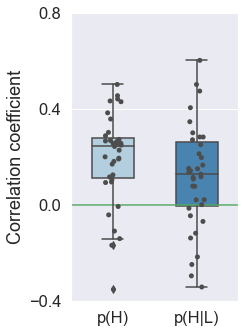

In [83]:
plt.subplots(figsize=(3,5.3))
plt.axhline(0, color='g')
g = sns.boxplot(data=dfm_sj, width=0.5,palette="Blues")
g = sns.stripplot(data=dfm_sj, color='.3')
g.set(ylim=(-0.4, 0.8))
g.set(yticks=[-0.4, 0, 0.4, 0.8])
plt.ylabel('Correlation coefficient')
plt.savefig('./figs/genobs_pcorr.pdf', bbox_inches='tight')

In [22]:
dfm_sj.agg(['median', 'std'])

NameError: name 'dfm_sj' is not defined

In [23]:
stats.ttest_1samp(dfm_sj, 0)

NameError: name 'dfm_sj' is not defined

In [24]:
(dfm_sj>0).sum()/35

NameError: name 'dfm_sj' is not defined

In [25]:
(dfm_sj<0).sum()/35

NameError: name 'dfm_sj' is not defined

##### plot sample trials

In [26]:
df_gm = pd.read_csv('../data/fmri_behavioural_new.csv')
df_gm['gen_p1g1'] = 1 - df_gm['gen_p2g1']
df_gm['gen_p2g2'] = 1 - df_gm['gen_p1g2']
df_gm['gen_p1'] = (df_gm['gen_p1g1'] + df_gm['gen_p1g2'])/(df_gm['gen_p1g1'] + df_gm['gen_p1g2']+df_gm['gen_p2g1'] + df_gm['gen_p2g2'])
df_gm['gen_p2'] = (df_gm['gen_p2g1'] + df_gm['gen_p2g2'])/(df_gm['gen_p1g1'] + df_gm['gen_p1g2']+df_gm['gen_p2g1'] + df_gm['gen_p2g2'])

In [27]:
def plot_data(df, order=0):
    """plot trials"""
    fig, ax1 = plt.subplots(figsize=(12,2.5))
    lw, s = 3, 50
    seq = df['seq']-1
    x = np.arange(len(seq))

    plt.plot(x, df['gen_p2g1'], c='C1', lw=lw, alpha=.5, label='Generative p(H)')
    plt.plot(x, df['gen_p1g2'], c='C0', lw=lw, alpha=.5)

    plt.scatter(x[seq==1], seq[seq==1], s=s, c='C1', lw=lw)
    plt.scatter(x[seq==0], seq[seq==0], s=s, c='C0', lw=lw)

    plt.scatter(x, df['obs_p2g1'], s=s+60, lw=lw, marker='*',c='C1', alpha=0.8, label='Rated probability p(H|L)')
    plt.scatter(x, df['obs_p1g2'], s=s+60, lw=lw, marker='*',c='C0', alpha=0.8, label='Rated probability p(L|H)')

    plt.ylim([seq.min()-.5,seq.max()+.5])
    plt.xlim([x.min()-2, x.max()+2])
    plt.yticks([0,1], ['Low','High'])
    plt.xlabel('Trial')
    plt.ylabel('Stimulation')
    
    ax2 = ax1.twinx()
    ax2.set_yticks([0,0.5,1])
    ax2.set_ylabel('Generative probability')

    import matplotlib.lines as mlines
    yellow_star = mlines.Line2D([], [], color='C1', marker='*', alpha=0.7, markersize=15, label='Rated p(H|L)')
    yellow_line = mlines.Line2D([], [], color='C1', alpha=0.7, lw=lw, label='True p(H|L)')    
    yellow_dot = mlines.Line2D([], [], color='C1', marker='.', markersize=20, label='High pain trials')

    blue_star = mlines.Line2D([], [], color='C0', marker='*', alpha=0.7, markersize=15, label='Rated p(L|H)')
    blue_line = mlines.Line2D([], [], color='C0', alpha=0.7, lw=lw, label='True p(L|H)')    
    blue_dot = mlines.Line2D([], [], color='C0', marker='.', markersize=20, label='Low pain trials')


    plt.legend(handles=[yellow_star, blue_star, yellow_line, blue_line, yellow_dot, blue_dot],
               fontsize=12, loc=(1.1, .05))
    
    # draw change point arrow
    textstr = '\n'.join(('Change point', "'jump'"))
    plt.text(22, 1.15, textstr, fontsize=14, va='top', ha='center')
    plt.text(61, 1.15, textstr, fontsize=14, va='top', ha='center')
    
    import matplotlib.patches as mpatches
    x_tail = 21
    y_tail = 0.9
    x_head = x_tail
    y_head = 0.6
    arrow1 = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                 mutation_scale=20)
    arrow2 = mpatches.FancyArrowPatch((x_tail+39, y_tail), (x_head+39, y_head),
                                 mutation_scale=20)
    ax2.add_patch(arrow1)
    ax2.add_patch(arrow2)

    plt.tight_layout()
    plt.savefig('./figs/behav_example.png', bbox_inches='tight')

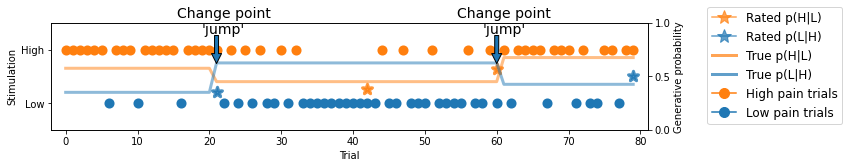

In [28]:
plot_data(df_gm.iloc[:80], order=0)

#### plotting jump awareness

In [29]:
df_gm = pd.read_csv('../data/fmri_behavioural_new.csv')
df_gm['gen_p1g1'] = 1 - df_gm['gen_p2g1']
df_gm['gen_p2g2'] = 1 - df_gm['gen_p1g2']
df_gm['gen_p1'] = (df_gm['gen_p1g1'] + df_gm['gen_p1g2'])/(df_gm['gen_p1g1'] + df_gm['gen_p1g2']+df_gm['gen_p2g1'] + df_gm['gen_p2g2'])
df_gm['gen_p2'] = (df_gm['gen_p2g1'] + df_gm['gen_p2g2'])/(df_gm['gen_p1g1'] + df_gm['gen_p1g2']+df_gm['gen_p2g1'] + df_gm['gen_p2g2'])

In [30]:
df_gm.shape

(44200, 21)

In [31]:
dff = df_gm[df_gm['subject']==6]

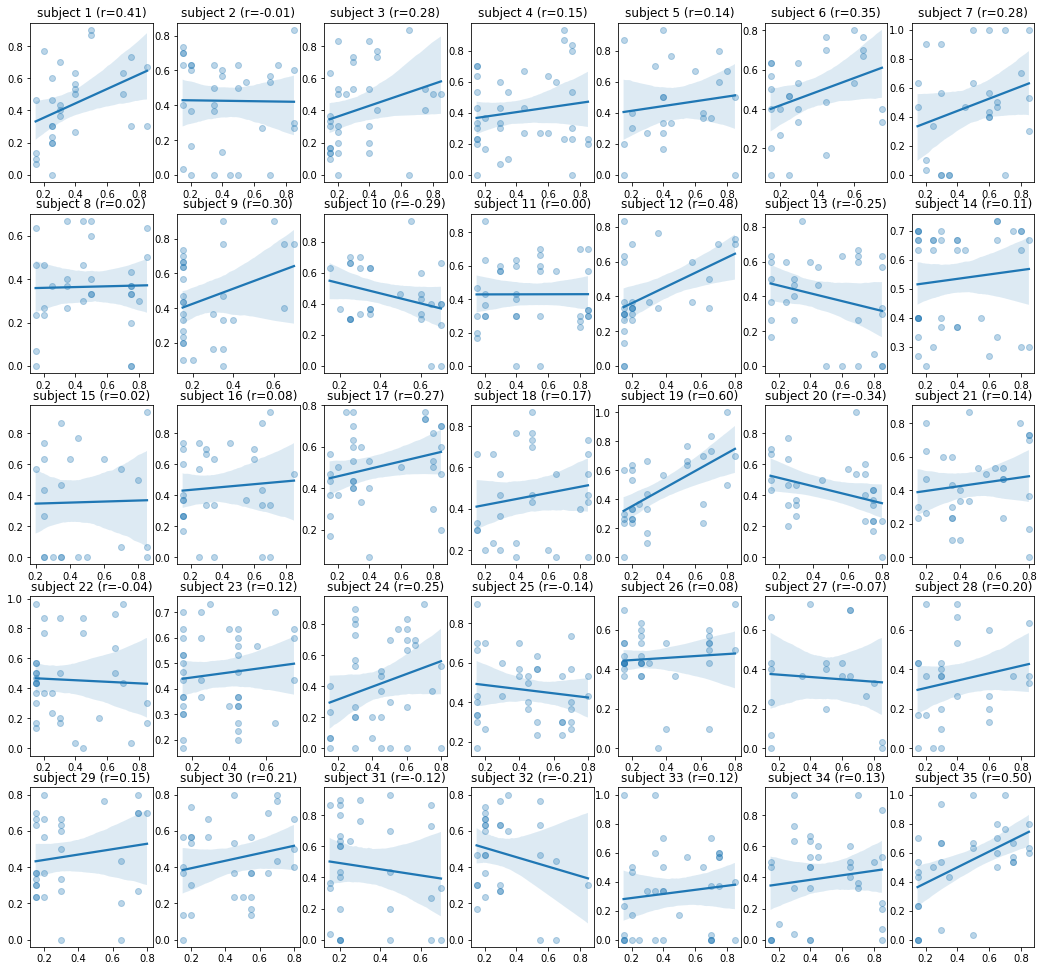

In [32]:
fig, axes = plt.subplots(5,7, figsize=(18,17))
sj_ls = np.unique(df_gm['subject'])
r_ls = []
for i, ax in zip(range(len(sj_ls)), axes.flat):
# for i, n in enumerate(np.unique(df_gm['subject'])):
    dff = df_gm[df_gm['subject']==sj_ls[i]].dropna(subset=['obs_p2g1'])
#     print(dff.shape)
    sns.regplot(ax=ax, data=dff, x='gen_p2g1', y='obs_p2g1',scatter_kws={'alpha':0.3})
    r,p = stats.pearsonr(dff['gen_p2g1'], dff['obs_p2g1'])
    r_ls.append(r)
    ax.set_title(f'subject {i+1} (r={r:.2f})')
    ax.set_xlabel('')
    ax.set_ylabel('')

In [33]:
r_phgl = r_ls
print(sum(np.array(r_phgl)>0)/len(r_phgl))

0.7428571428571429


In [34]:
np.mean(r_phgl)

0.11738825362721185

In [35]:
np.std(r_phgl)

0.217534432383563

In [36]:
fig.savefig('./figs/gen_obs_reg_individuals_phgl.png', bbox_inches='tight')

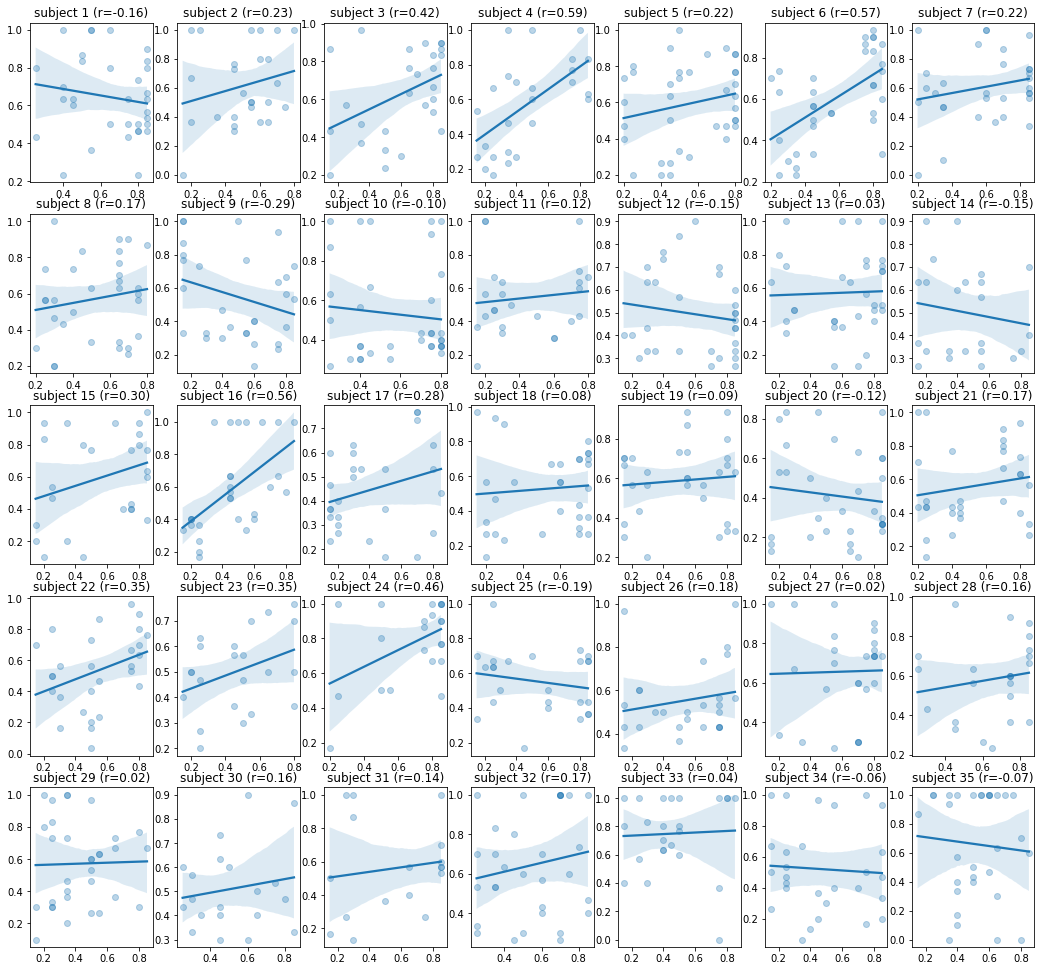

In [37]:
fig, axes = plt.subplots(5,7, figsize=(18,17))
sj_ls = np.unique(df_gm['subject'])
r_ls = []
for i, ax in zip(range(len(sj_ls)), axes.flat):
# for i, n in enumerate(np.unique(df_gm['subject'])):
    dff = df_gm[df_gm['subject']==sj_ls[i]].dropna(subset=['obs_p2g2'])
#     print(dff.shape)
    sns.regplot(ax=ax, data=dff, x='gen_p2g2', y='obs_p2g2',scatter_kws={'alpha':0.3})
    r,p = stats.pearsonr(dff['gen_p2g2'], dff['obs_p2g2'])
    r_ls.append(r)
    ax.set_title(f'subject {i+1} (r={r:.2f})')
    ax.set_xlabel('')
    ax.set_ylabel('')
#     sns.jointplot(ax=ax, data=dff, x='gen_p1', y='obs_p1', kind='reg', 
#                   scatter_kws={'alpha':0.3})#color="#4CB391", 
#     plt.clf()


In [38]:
r_plgh = r_ls
print(sum(np.array(r_plgh)>0)/len(r_plgh))

0.7428571428571429


In [39]:
np.mean(r_plgh)

0.1384405678679933

In [40]:
np.std(r_plgh)

0.2214605761588202

In [41]:
fig.savefig('./figs/gen_obs_reg_individuals_phgh.png', bbox_inches='tight')

#### plotting example subject

In [42]:
df_gm = pd.read_csv('../data/fmri_behavioural_new.csv')
df_gm['gen_p1g1'] = 1 - df_gm['gen_p2g1']
df_gm['gen_p2g2'] = 1 - df_gm['gen_p1g2']
df_gm['gen_p1'] = (df_gm['gen_p1g1'] + df_gm['gen_p1g2'])/(df_gm['gen_p1g1'] + df_gm['gen_p1g2']+df_gm['gen_p2g1'] + df_gm['gen_p2g2'])
df_gm['gen_p2'] = (df_gm['gen_p2g1'] + df_gm['gen_p2g2'])/(df_gm['gen_p1g1'] + df_gm['gen_p1g2']+df_gm['gen_p2g1'] + df_gm['gen_p2g2'])

0.5674805832543917 0.00046511817268218305
0.34802285180901205 0.07525693075081037


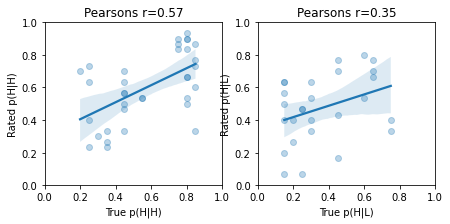

In [43]:
fig, ax = plt.subplots(1,2, figsize=(7,3.))
sj_ls = np.unique(df_gm['subject'])
dff = df_gm[df_gm['subject']==sj_ls[5]]#.dropna(subset=['obs_p1g2', 'obs_p2g1'])
sns.regplot(ax=ax[0], data=dff, x='gen_p2g2', y='obs_p2g2',scatter_kws={'alpha':0.3})
sns.regplot(ax=ax[1], data=dff, x='gen_p2g1', y='obs_p2g1',scatter_kws={'alpha':0.3})
dff_p1g2 = dff.dropna(subset=['obs_p1g2'])
dff_p2g1 = dff.dropna(subset=['obs_p2g1'])
r_p1g2,p = stats.pearsonr(dff_p1g2['gen_p1g2'], dff_p1g2['obs_p1g2'])
print(r_p1g2, p)
r_p2g1,p = stats.pearsonr(dff_p2g1['gen_p2g1'], dff_p2g1['obs_p2g1'])
print(r_p2g1, p)

ax[0].set(xlim=(0,1), ylim=(0,1), xlabel='True p(H|H)', ylabel='Rated p(H|H)', title=f'Pearsons r={r_p1g2:.2f}')
ax[1].set(xlim=(0,1), ylim=(0,1), xlabel='True p(H|L)', ylabel='Rated p(H|L)', title=f'Pearsons r={r_p2g1:.2f}')

fig.savefig('./figs/gen_obs_example_sj.png', bbox_inches='tight')

# plot frequencies

In [44]:
df_gm = pd.read_csv('../data/fmri_behavioural_new.csv')
df_gm['gen_p1g1'] = 1 - df_gm['gen_p2g1']
df_gm['gen_p2g2'] = 1 - df_gm['gen_p1g2']
df_gm['gen_p1'] = (df_gm['gen_p1g1'] + df_gm['gen_p1g2'])/(df_gm['gen_p1g1'] + df_gm['gen_p1g2']+df_gm['gen_p2g1'] + df_gm['gen_p2g2'])
df_gm['gen_p2'] = (df_gm['gen_p2g1'] + df_gm['gen_p2g2'])/(df_gm['gen_p1g1'] + df_gm['gen_p1g2']+df_gm['gen_p2g1'] + df_gm['gen_p2g2'])
df_gm['Generative p(H)']=df_gm['gen_p2']


In [45]:
df_gmf=df_gm[['gen_p1', 'gen_p2', 'obs_p1', 'obs_p2', 'subject']].dropna()


In [46]:
df_gmf

,gen_p1,gen_p2,obs_p1,obs_p2,subject
21,0.675,0.325,0.200000,0.800000,6
42,0.675,0.325,0.733333,0.266667,6
60,0.675,0.325,0.366667,0.633333,6
79,0.250,0.750,0.500000,0.500000,6
98,0.250,0.750,0.200000,0.800000,6
...,...,...,...,...,...
44117,0.250,0.750,0.700000,0.300000,44
44136,0.250,0.750,0.200000,0.800000,44
44157,0.250,0.750,0.400000,0.600000,44
44177,0.550,0.450,0.000000,1.000000,44


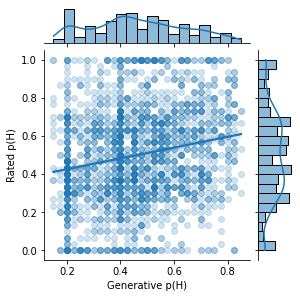

In [47]:
df_gmf['Generative p(H)']=df_gmf['gen_p2']
df_gmf['Rated p(H)']=df_gmf['obs_p2']
g = sns.jointplot(data=df_gmf, x='Generative p(H)', y='Rated p(H)', kind='reg'
                 , scatter_kws={'alpha':0.2})#color="#4CB391", 
g.fig.set_figwidth(4)
g.fig.set_figheight(4)
plt.savefig('./figs/p2_genrate.png', bbox_inches='tight')


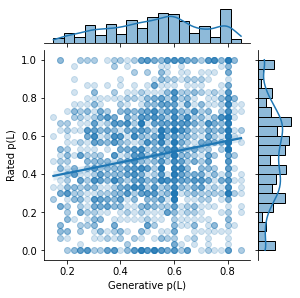

In [48]:
df_gmf['Generative p(L)']=df_gmf['gen_p1']
df_gmf['Rated p(L)']=df_gmf['obs_p1']
g = sns.jointplot(data=df_gmf, x='Generative p(L)', y='Rated p(L)', kind='reg'
                 , scatter_kws={'alpha':0.2})#color="#4CB391", 
g.fig.set_figwidth(4)
g.fig.set_figheight(4)
plt.savefig('./figs/p1_genrate.png', bbox_inches='tight')

# plot regression between generative and rated p(H), one line per subject

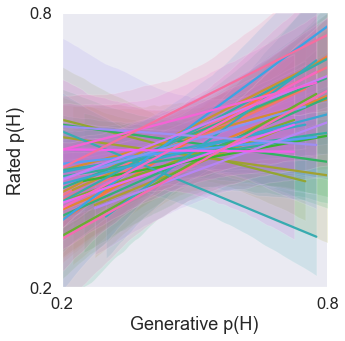

In [52]:
sns.set(font_scale = 1.5)
g = sns.lmplot(
    data=df_gmf,
    x="Generative p(H)", y="Rated p(H)", hue="subject", scatter=False)
g._legend.remove()
g.set(xlim=(0.2, 0.8))
g.set(ylim=(0.2, 0.8))
g.set(xticks=[0.2, 0.8])
g.set(yticks=[0.2, 0.8])
plt.savefig('./figs/p2genrated_subj.pdf', bbox_inches='tight')

In [88]:
df_gmf

,gen_p1,gen_p2,obs_p1,obs_p2,subject,Generative p(H),Rated p(H),Generative p(L),Rated p(L)
21,0.675,0.325,0.200000,0.800000,6,0.325,0.800000,0.675,0.200000
42,0.675,0.325,0.733333,0.266667,6,0.325,0.266667,0.675,0.733333
60,0.675,0.325,0.366667,0.633333,6,0.325,0.633333,0.675,0.366667
79,0.250,0.750,0.500000,0.500000,6,0.750,0.500000,0.250,0.500000
98,0.250,0.750,0.200000,0.800000,6,0.750,0.800000,0.250,0.200000
...,...,...,...,...,...,...,...,...,...
44117,0.250,0.750,0.700000,0.300000,44,0.750,0.300000,0.250,0.700000
44136,0.250,0.750,0.200000,0.800000,44,0.750,0.800000,0.250,0.200000
44157,0.250,0.750,0.400000,0.600000,44,0.750,0.600000,0.250,0.400000
44177,0.550,0.450,0.000000,1.000000,44,0.450,1.000000,0.550,0.000000


In [89]:
df_gmf.to_csv(r"sourcedata_fig2a.csv", index=False)


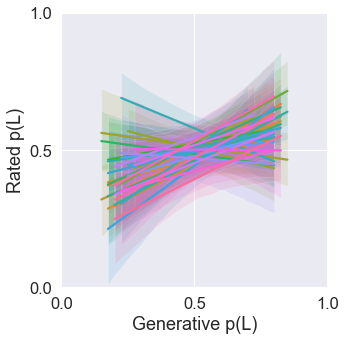

In [50]:
g = sns.lmplot(
    data=df_gmf,
    x="Generative p(L)", y="Rated p(L)", hue="subject", scatter=False)
g._legend.remove()
g.set(xlim=(0, 1))
g.set(ylim=(0, 1))
g.set(xticks=[0, 0.5, 1])
g.set(yticks=[0, 0.5, 1])
plt.savefig('./figs/p1genrated_subj.png', bbox_inches='tight')

# plot regression between generative and rated TPs, one line per subject

In [53]:
g = sns.lmplot(
    data=dfm11, x="Generative p(L|H)", y="Rated p(L|H)", hue="subject", scatter=False)
g._legend.remove()
g.set(xlim=(-1, 1))
g.set(ylim=(-1, 1))
g.set(xticks=[-1, 0, 1])
g.set(yticks=[-1, 0, 1])
plt.savefig('./figs/p1g2genrated_subj.png', bbox_inches='tight')

KeyError: "['Generative p(L|H)', 'Rated p(L|H)'] not in index"

In [54]:
dfm11


,gen_p2g2,obs_p2g2,subject,Generative p(H|H),Rated p(H|H)
21,-2.050121,0.723500,6,-2.050121,0.723500
79,-0.007736,-0.671821,6,-0.007736,-0.671821
98,-0.007736,0.723500,6,-0.007736,0.723500
116,-0.007736,1.653714,6,-0.007736,1.653714
301,-1.028929,-0.051679,6,-1.028929,-0.051679
...,...,...,...,...,...
44078,0.752865,-0.067862,44,0.752865,-0.067862
44098,0.752865,0.938263,44,0.752865,0.938263
44117,0.752865,-0.982521,44,0.752865,-0.982521
44177,-0.975936,0.938263,44,-0.975936,0.938263


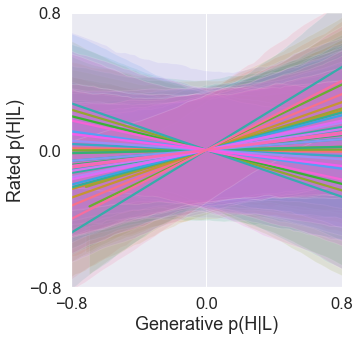

In [55]:
g = sns.lmplot(
    data=dfm22, x="Generative p(H|L)", y="Rated p(H|L)", hue="subject", scatter=False)
g._legend.remove()
g.set(xlim=(-0.8, 0.8))
g.set(ylim=(-0.8, 0.8))
g.set(xticks=[-0.8, 0, 0.8])
g.set(yticks=[-0.8, 0, 0.8])
plt.savefig('./figs/p2g1genrated_subj.pdf', bbox_inches='tight')

In [90]:
dfm22.to_csv(r"sourcedata_fig2b.csv", index=False)


# correlations

In [56]:
df_gmf_rp2 = df_gmf.groupby('subject').apply(lambda x: stats.pearsonr(x['Generative p(H)'], x['Rated p(H)'])[0])
df_gmf_rp1 = df_gmf.groupby('subject').apply(lambda x: stats.pearsonr(x['Generative p(L)'], x['Rated p(L)'])[0])
df_gmf_rsj = pd.DataFrame({'P(L)': df_gmf_rp1, 'P(H)': df_gmf_rp2})

In [57]:
df_gmf_rsj.agg(['median', 'std'])

,P(L),P(H)
median,0.244811,0.244811
std,0.189984,0.189984


In [58]:
stats.ttest_1samp(df_gmf_rsj, 0)

Ttest_1sampResult(statistic=array([6.10075143, 6.10075143]), pvalue=array([6.37512013e-07, 6.37512013e-07]))

In [59]:
(df_gmf_rsj>0).sum()/35

P(L)    0.828571
P(H)    0.828571
dtype: float64

# concatenate TPs

In [60]:
fr = [dfm11['gen_p1g2'], dfm22['gen_p2g1']]
genTP = pd.concat(fr)
fr = [dfm11['obs_p1g2'], dfm22['obs_p2g1']]
obsTP = pd.concat(fr)

KeyError: 'gen_p1g2'

In [61]:
obsTP

NameError: name 'obsTP' is not defined

# Quality of fit

In [62]:
def plot_bins(df,sj_idx=None,cut_num=10,model=None,
              obs='obs_p1g2',gen='gen_p1g2',
             obs_label='Generated probability p(L|H)', gen_label='Rated probability p(L|H)',
             diag_min=0.1, diag_max=0.9):
    """bin average then correlate"""
    fig, ax = plt.subplots(figsize=(4,4))
    all_sj = np.unique(df['subject'])
    if sj_idx is not None:
        sj_ls = sj_idx
    else:
        sj_ls = all_sj
    n_sj = len(sj_ls)
    r_sj = np.empty((n_sj,))
    model_sj = np.empty((n_sj, cut_num))
    rate_sj = np.empty((n_sj, cut_num))

#     for idx, sj in enumerate(np.unique(df['subject'])):
    for idx, sj in enumerate(sj_ls):
        df_sj = df[df['subject']==sj]
#         df_tmp = df_sj.dropna(subset=[obs])
        df_tmp = df_sj
        model_rank = df_tmp[gen].rank(method='max')
#         print(pd.qcut(model_rank, cut_num))
        model_cut = df_tmp.groupby(pd.qcut(model_rank, cut_num))[gen].mean().values
        rate_cut = df_tmp.groupby(pd.qcut(model_rank, cut_num))[obs].mean().values
        nas = np.logical_and(np.isnan(model_cut), np.isnan(rate_cut)) # get rid of nans
        # no demean
#         print(f'subject %d, pearsonr %.3f, pval %.3f' %(sj, pr, pv))
        pr, pv = scipy.stats.pearsonr(model_cut[~nas], rate_cut[~nas])
        sns.regplot(x=model_cut[~nas], y=rate_cut[~nas])      
        
        r_sj[idx] = pr
        model_sj[idx,:] = model_cut
        rate_sj[idx,:] = rate_cut


    ax.set_aspect('equal')#, adjustable='box')
    plt.plot([diag_min,diag_max],[diag_min,diag_max], 'k-')
    plt.xlabel(gen_label)
    plt.ylabel(obs_label)
    t0, p0 = scipy.stats.ttest_rel(r_sj,np.zeros((n_sj,)))
    plt.title(f'Pearson r={np.mean(r_sj):.3f} (t({len(r_sj)})={t0:.3f}, p={p0:.3e})')
    if model is not None:
        fig_name = f'bins_{model:s}.pdf'
        fig_path = os.path.join('figs',fig_name)
        plt.savefig(fig_path, bbox_inches='tight')

def demean(df):
    """demean"""
    df_dm = (df-np.mean(df))/np.std(df)
    return df_dm
df = pd.read_csv('../data/fmri_behavioural_new.csv')
dfna = df.dropna(subset=['obs_p1g2', 'obs_p2g1'], how='all')
dfna['gen_p1g1'] = 1 - dfna['gen_p2g1']
dfna['gen_p2g2'] = 1 - dfna['gen_p1g2']
dfna['gen_p1'] = (dfna['gen_p1g1'] + dfna['gen_p1g2'])/(dfna['gen_p1g1'] + dfna['gen_p1g2']+dfna['gen_p2g1'] + dfna['gen_p2g2'])
dfna['gen_p2'] = (dfna['gen_p2g1'] + dfna['gen_p2g2'])/(dfna['gen_p1g1'] + dfna['gen_p1g2']+dfna['gen_p2g1'] + dfna['gen_p2g2'])

/var/folders/k1/2d8rzzss1_ddg2hdtqqn58dc0000gn/T/ipykernel_78267/554955039.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfna['gen_p1g1'] = 1 - dfna['gen_p2g1']
/var/folders/k1/2d8rzzss1_ddg2hdtqqn58dc0000gn/T/ipykernel_78267/554955039.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfna['gen_p2g2'] = 1 - dfna['gen_p1g2']
/var/folders/k1/2d8rzzss1_ddg2hdtqqn58dc0000gn/T/ipykernel_78267/554955039.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [63]:
df_jf = pd.read_csv('../model_gen/local_output_mean/fmri_io_jump_freq.csv')
df_combined = pd.concat([df, df_jf], axis=1)
dfc = df_combined.loc[:,~df_combined.columns.duplicated()]
dfc.shape

(44200, 24)

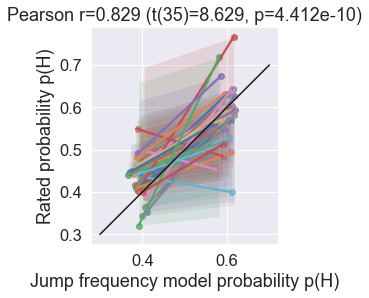

In [64]:
# all subjects
plot_bins(dfc, sj_idx=None,model=None, cut_num=2,
          obs='obs_p2',gen='pmod_mean_p2',
          obs_label='Rated probability p(H)', gen_label='Jump frequency model probability p(H)',
         diag_min=0.3, diag_max=0.7)
plt.savefig('./figs/model_sbj.png', bbox_inches='tight', dpi=300)

In [65]:
# comparison correlation coefficients


In [66]:
from __future__ import division

__author__ = 'psinger'

import numpy as np
from scipy.stats import t, norm
from math import atanh, pow
from numpy import tanh

def rz_ci(r, n, conf_level = 0.95):
    zr_se = pow(1/(n - 3), .5)
    moe = norm.ppf(1 - (1 - conf_level)/float(2)) * zr_se
    zu = atanh(r) + moe
    zl = atanh(r) - moe
    return tanh((zl, zu))

def rho_rxy_rxz(rxy, rxz, ryz):
    num = (ryz-1/2.*rxy*rxz)*(1-pow(rxy,2)-pow(rxz,2)-pow(ryz,2))+pow(ryz,3)
    den = (1 - pow(rxy,2)) * (1 - pow(rxz,2))
    return num/float(den)

def dependent_corr(xy, xz, yz, n, twotailed=True, conf_level=0.95, method='steiger'):
    """
    Calculates the statistic significance between two dependent correlation coefficients
    @param xy: correlation coefficient between x and y
    @param xz: correlation coefficient between x and z
    @param yz: correlation coefficient between y and z
    @param n: number of elements in x, y and z
    @param twotailed: whether to calculate a one or two tailed test, only works for 'steiger' method
    @param conf_level: confidence level, only works for 'zou' method
    @param method: defines the method uses, 'steiger' or 'zou'
    @return: t and p-val
    """
    if method == 'steiger':
        d = xy - xz
        determin = 1 - xy * xy - xz * xz - yz * yz + 2 * xy * xz * yz
        av = (xy + xz)/2
        cube = (1 - yz) * (1 - yz) * (1 - yz)

        t2 = d * np.sqrt((n - 1) * (1 + yz)/(((2 * (n - 1)/(n - 3)) * determin + av * av * cube)))
        p = 1 - t.cdf(abs(t2), n - 3)

        if twotailed:
            p *= 2

        return t2, p
    elif method == 'zou':
        L1 = rz_ci(xy, n, conf_level=conf_level)[0]
        U1 = rz_ci(xy, n, conf_level=conf_level)[1]
        L2 = rz_ci(xz, n, conf_level=conf_level)[0]
        U2 = rz_ci(xz, n, conf_level=conf_level)[1]
        rho_r12_r13 = rho_rxy_rxz(xy, xz, yz)
        lower = xy - xz - pow((pow((xy - L1), 2) + pow((U2 - xz), 2) - 2 * rho_r12_r13 * (xy - L1) * (U2 - xz)), 0.5)
        upper = xy - xz + pow((pow((U1 - xy), 2) + pow((xz - L2), 2) - 2 * rho_r12_r13 * (U1 - xy) * (xz - L2)), 0.5)
        return lower, upper
    else:
        raise Exception('Wrong method!')

def independent_corr(xy, ab, n, n2 = None, twotailed=True, conf_level=0.95, method='fisher'):
    """
    Calculates the statistic significance between two independent correlation coefficients
    @param xy: correlation coefficient between x and y
    @param xz: correlation coefficient between a and b
    @param n: number of elements in xy
    @param n2: number of elements in ab (if distinct from n)
    @param twotailed: whether to calculate a one or two tailed test, only works for 'fisher' method
    @param conf_level: confidence level, only works for 'zou' method
    @param method: defines the method uses, 'fisher' or 'zou'
    @return: z and p-val
    """

    if method == 'fisher':
        xy_z = 0.5 * np.log((1 + xy)/(1 - xy))
        ab_z = 0.5 * np.log((1 + ab)/(1 - ab))
        if n2 is None:
            n2 = n

        se_diff_r = np.sqrt(1/(n - 3) + 1/(n2 - 3))
        diff = xy_z - ab_z
        z = abs(diff / se_diff_r)
        p = (1 - norm.cdf(z))
        if twotailed:
            p *= 2

        return z, p
    elif method == 'zou':
        L1 = rz_ci(xy, n, conf_level=conf_level)[0]
        U1 = rz_ci(xy, n, conf_level=conf_level)[1]
        L2 = rz_ci(ab, n2, conf_level=conf_level)[0]
        U2 = rz_ci(ab, n2, conf_level=conf_level)[1]
        lower = xy - ab - pow((pow((xy - L1), 2) + pow((U2 - ab), 2)), 0.5)
        upper = xy - ab + pow((pow((U1 - xy), 2) + pow((ab - L2), 2)), 0.5)
        return lower, upper
    else:
        raise Exception('Wrong method!')

print(dependent_corr(.40, .50, .10, 103, method='steiger'))
print(independent_corr(0.5 , 0.6, 103, 103, method='fisher'))

(-0.8912799047605414, 0.3749185174912557)
(1.0171097212822693, 0.3091012362386931)


In [67]:
print(independent_corr(.25, .16, 35, 35, method='fisher'))

(0.3761044630058794, 0.7068392365097504)


In [68]:
dfm_sjj=dfm_sj.drop(labels=26,axis=0)

NameError: name 'dfm_sj' is not defined

In [69]:
dfm_sjj


NameError: name 'dfm_sjj' is not defined

In [70]:
print(independent_corr(0.21198126448056873, 0.13085307210969657, 34, 34, method='fisher'))

(0.3292801284612588, 0.7419439625935818)


In [71]:
np.mean(dfm_sjj["p(H|L)"])

NameError: name 'dfm_sjj' is not defined